In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

/home/raflicky/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [3]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [4]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [5]:
path = ("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/modified")
files = os.listdir(path)
BMV = pd.read_csv(path + "/" + files[0])

In [6]:
eur_usd, usd_mxn = import_some_files()

In [7]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [8]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [9]:
my_data_frame_sum = all_variables.iloc[:,1]
my_data_frame = all_variables.drop(['Date', 'Adj Close'], axis=1)

In [10]:
#my_data_frame.to_csv("theXs")      
#my_data_frame_sum.to_csv("theYs")

In [11]:
working_data = my_data_frame.iloc[0:1000]
working_data_sum = my_data_frame_sum.iloc[0:1000]
validate_data = my_data_frame.iloc[1000:]
validate_data_sum = my_data_frame_sum.iloc[1000:]

In [12]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [15]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [16]:
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)

In [17]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 36)

In [18]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [227]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 999 samples, validate on 999 samples
Epoch 1/10000
 - 3s - loss: 44.0964 - val_loss: 72.3683
Epoch 2/10000
 - 0s - loss: 43.0017 - val_loss: 73.1810
Epoch 3/10000
 - 0s - loss: 42.5084 - val_loss: 64.1145
Epoch 4/10000
 - 0s - loss: 42.7522 - val_loss: 67.0755
Epoch 5/10000
 - 0s - loss: 41.4765 - val_loss: 77.9708
Epoch 6/10000
 - 0s - loss: 42.2549 - val_loss: 67.8638
Epoch 7/10000
 - 0s - loss: 41.2994 - val_loss: 72.1397
Epoch 8/10000
 - 0s - loss: 41.1920 - val_loss: 60.9677
Epoch 9/10000
 - 0s - loss: 39.9312 - val_loss: 67.7854
Epoch 10/10000
 - 0s - loss: 41.5585 - val_loss: 54.5753
Epoch 11/10000
 - 0s - loss: 38.4401 - val_loss: 50.3230
Epoch 12/10000
 - 0s - loss: 38.5544 - val_loss: 55.4205
Epoch 13/10000
 - 1s - loss: 40.7186 - val_loss: 54.8937
Epoch 14/10000
 - 1s - loss: 38.6113 - val_loss: 61.4011
Epoch 15/10000
 - 1s - loss: 40.6498 - val_loss: 58.4040
Epoch 16/10000
 - 1s - loss: 37.8787 - val_loss: 56.2027
Epoch 17/10000
 - 0s - loss: 37.5241 - val_loss: 60

Epoch 144/10000
 - 0s - loss: 31.6643 - val_loss: 32.0854
Epoch 145/10000
 - 0s - loss: 30.9102 - val_loss: 34.9476
Epoch 146/10000
 - 0s - loss: 30.5908 - val_loss: 35.0354
Epoch 147/10000
 - 0s - loss: 30.8017 - val_loss: 34.9952
Epoch 148/10000
 - 0s - loss: 31.1939 - val_loss: 37.8229
Epoch 149/10000
 - 0s - loss: 31.4383 - val_loss: 36.0466
Epoch 150/10000
 - 0s - loss: 31.0522 - val_loss: 36.7430
Epoch 151/10000
 - 0s - loss: 31.1793 - val_loss: 36.7350
Epoch 152/10000
 - 0s - loss: 31.6794 - val_loss: 34.4304
Epoch 153/10000
 - 0s - loss: 31.2930 - val_loss: 38.0757
Epoch 154/10000
 - 0s - loss: 31.4869 - val_loss: 33.8338
Epoch 155/10000
 - 0s - loss: 30.9150 - val_loss: 37.1019
Epoch 156/10000
 - 0s - loss: 31.1161 - val_loss: 34.9755
Epoch 157/10000
 - 0s - loss: 30.2530 - val_loss: 35.4447
Epoch 158/10000
 - 0s - loss: 32.2953 - val_loss: 33.0970
Epoch 159/10000
 - 0s - loss: 32.3739 - val_loss: 34.5362
Epoch 160/10000
 - 0s - loss: 31.0756 - val_loss: 34.3924
Epoch 161/1000

 - 0s - loss: 23.6390 - val_loss: 22.2990
Epoch 286/10000
 - 0s - loss: 21.8676 - val_loss: 22.4258
Epoch 287/10000
 - 0s - loss: 23.1287 - val_loss: 19.6323
Epoch 288/10000
 - 0s - loss: 22.2312 - val_loss: 22.3452
Epoch 289/10000
 - 0s - loss: 21.9384 - val_loss: 20.8393
Epoch 290/10000
 - 0s - loss: 22.3878 - val_loss: 20.7277
Epoch 291/10000
 - 0s - loss: 23.3339 - val_loss: 21.5952
Epoch 292/10000
 - 0s - loss: 22.6030 - val_loss: 18.9909
Epoch 293/10000
 - 0s - loss: 22.3455 - val_loss: 19.6624
Epoch 294/10000
 - 0s - loss: 21.8505 - val_loss: 22.1318
Epoch 295/10000
 - 0s - loss: 22.2479 - val_loss: 21.1885
Epoch 296/10000
 - 0s - loss: 23.4731 - val_loss: 21.6659
Epoch 297/10000
 - 0s - loss: 21.8342 - val_loss: 19.9908
Epoch 298/10000
 - 0s - loss: 22.9868 - val_loss: 20.8672
Epoch 299/10000
 - 0s - loss: 24.8524 - val_loss: 21.1611
Epoch 300/10000
 - 0s - loss: 23.2577 - val_loss: 21.5578
Epoch 301/10000
 - 0s - loss: 21.9286 - val_loss: 22.4792
Epoch 302/10000
 - 0s - loss: 

Epoch 427/10000
 - 0s - loss: 22.1851 - val_loss: 17.3258
Epoch 428/10000
 - 0s - loss: 20.0135 - val_loss: 22.0397
Epoch 429/10000
 - 0s - loss: 20.1535 - val_loss: 17.8289
Epoch 430/10000
 - 0s - loss: 18.5490 - val_loss: 22.5493
Epoch 431/10000
 - 0s - loss: 19.6305 - val_loss: 16.6711
Epoch 432/10000
 - 0s - loss: 20.9477 - val_loss: 17.4615
Epoch 433/10000
 - 0s - loss: 20.8909 - val_loss: 23.9537
Epoch 434/10000
 - 0s - loss: 19.9023 - val_loss: 16.1060
Epoch 435/10000
 - 0s - loss: 19.9590 - val_loss: 17.7597
Epoch 436/10000
 - 0s - loss: 20.7713 - val_loss: 17.7567
Epoch 437/10000
 - 0s - loss: 19.2832 - val_loss: 17.5515
Epoch 438/10000
 - 0s - loss: 19.8664 - val_loss: 17.1342
Epoch 439/10000
 - 0s - loss: 23.1882 - val_loss: 25.1253
Epoch 440/10000
 - 0s - loss: 20.7002 - val_loss: 17.5060
Epoch 441/10000
 - 0s - loss: 20.3666 - val_loss: 17.3620
Epoch 442/10000
 - 0s - loss: 20.1677 - val_loss: 21.6820
Epoch 443/10000
 - 0s - loss: 20.3172 - val_loss: 17.4615
Epoch 444/1000

 - 0s - loss: 20.9988 - val_loss: 16.5561
Epoch 569/10000
 - 0s - loss: 19.5757 - val_loss: 17.4997
Epoch 570/10000
 - 0s - loss: 18.9487 - val_loss: 15.0461
Epoch 571/10000
 - 0s - loss: 17.6489 - val_loss: 16.3032
Epoch 572/10000
 - 0s - loss: 20.6377 - val_loss: 16.4630
Epoch 573/10000
 - 0s - loss: 20.9142 - val_loss: 17.7213
Epoch 574/10000
 - 0s - loss: 19.7115 - val_loss: 15.0747
Epoch 575/10000
 - 0s - loss: 18.0148 - val_loss: 16.8797
Epoch 576/10000
 - 0s - loss: 18.8901 - val_loss: 18.0249
Epoch 577/10000
 - 0s - loss: 21.7862 - val_loss: 15.4589
Epoch 578/10000
 - 0s - loss: 23.2227 - val_loss: 15.8009
Epoch 579/10000
 - 0s - loss: 19.6191 - val_loss: 17.0461
Epoch 580/10000
 - 0s - loss: 18.5936 - val_loss: 15.4753
Epoch 581/10000
 - 0s - loss: 18.6758 - val_loss: 17.9306
Epoch 582/10000
 - 0s - loss: 17.8593 - val_loss: 15.4749
Epoch 583/10000
 - 0s - loss: 17.9599 - val_loss: 15.5713
Epoch 584/10000
 - 0s - loss: 24.6410 - val_loss: 24.3242
Epoch 585/10000
 - 0s - loss: 

Epoch 710/10000
 - 0s - loss: 16.4181 - val_loss: 15.9804
Epoch 711/10000
 - 0s - loss: 19.8157 - val_loss: 14.9207
Epoch 712/10000
 - 0s - loss: 19.2777 - val_loss: 16.8904
Epoch 713/10000
 - 0s - loss: 18.2050 - val_loss: 16.4437
Epoch 714/10000
 - 0s - loss: 18.8875 - val_loss: 15.5379
Epoch 715/10000
 - 0s - loss: 17.2856 - val_loss: 15.0748
Epoch 716/10000
 - 0s - loss: 18.8486 - val_loss: 14.7618
Epoch 717/10000
 - 0s - loss: 18.3258 - val_loss: 16.8790
Epoch 718/10000
 - 0s - loss: 17.2980 - val_loss: 17.0658
Epoch 719/10000
 - 0s - loss: 19.4271 - val_loss: 15.7987
Epoch 720/10000
 - 0s - loss: 16.9796 - val_loss: 15.8246
Epoch 721/10000
 - 0s - loss: 17.7486 - val_loss: 15.6956
Epoch 722/10000
 - 0s - loss: 18.7585 - val_loss: 15.0154
Epoch 723/10000
 - 0s - loss: 18.1415 - val_loss: 14.7988
Epoch 724/10000
 - 0s - loss: 19.6170 - val_loss: 14.9305
Epoch 725/10000
 - 0s - loss: 17.1902 - val_loss: 15.0017
Epoch 726/10000
 - 0s - loss: 18.6853 - val_loss: 15.3326
Epoch 727/1000

 - 1s - loss: 17.3244 - val_loss: 18.3092
Epoch 852/10000
 - 1s - loss: 18.0430 - val_loss: 13.7966
Epoch 853/10000
 - 1s - loss: 17.9301 - val_loss: 15.2362
Epoch 854/10000
 - 1s - loss: 16.5879 - val_loss: 14.4962
Epoch 855/10000
 - 1s - loss: 16.7992 - val_loss: 16.3801
Epoch 856/10000
 - 1s - loss: 17.0643 - val_loss: 14.7424
Epoch 857/10000
 - 1s - loss: 16.6650 - val_loss: 13.8775
Epoch 858/10000
 - 1s - loss: 18.3489 - val_loss: 15.1691
Epoch 859/10000
 - 1s - loss: 19.0265 - val_loss: 14.8223
Epoch 860/10000
 - 1s - loss: 20.0353 - val_loss: 16.9066
Epoch 861/10000
 - 1s - loss: 18.3412 - val_loss: 16.8754
Epoch 862/10000
 - 1s - loss: 17.2791 - val_loss: 14.7446
Epoch 863/10000
 - 1s - loss: 18.7378 - val_loss: 15.1738
Epoch 864/10000
 - 1s - loss: 15.9620 - val_loss: 19.3349
Epoch 865/10000
 - 1s - loss: 19.3965 - val_loss: 15.7172
Epoch 866/10000
 - 1s - loss: 18.0582 - val_loss: 15.1694
Epoch 867/10000
 - 1s - loss: 18.3376 - val_loss: 15.6401
Epoch 868/10000
 - 1s - loss: 

Epoch 993/10000
 - 1s - loss: 16.9967 - val_loss: 13.5277
Epoch 994/10000
 - 1s - loss: 16.8967 - val_loss: 14.8026
Epoch 995/10000
 - 1s - loss: 16.8965 - val_loss: 15.5437
Epoch 996/10000
 - 1s - loss: 17.0455 - val_loss: 13.6653
Epoch 997/10000
 - 1s - loss: 17.1240 - val_loss: 14.1162
Epoch 998/10000
 - 2s - loss: 16.2739 - val_loss: 13.4536
Epoch 999/10000
 - 1s - loss: 16.4974 - val_loss: 14.2184
Epoch 1000/10000
 - 1s - loss: 16.6865 - val_loss: 14.9440
Epoch 1001/10000
 - 1s - loss: 16.5229 - val_loss: 15.3860
Epoch 1002/10000
 - 1s - loss: 18.1696 - val_loss: 14.1815
Epoch 1003/10000
 - 1s - loss: 20.2478 - val_loss: 17.2070
Epoch 1004/10000
 - 1s - loss: 18.4739 - val_loss: 13.8255
Epoch 1005/10000
 - 1s - loss: 19.1855 - val_loss: 13.7080
Epoch 1006/10000
 - 1s - loss: 17.2535 - val_loss: 13.4550
Epoch 1007/10000
 - 1s - loss: 17.0549 - val_loss: 13.3967
Epoch 1008/10000
 - 1s - loss: 18.5461 - val_loss: 13.9060
Epoch 1009/10000
 - 1s - loss: 16.6306 - val_loss: 13.4544
Epoc

Epoch 1132/10000
 - 1s - loss: 15.7296 - val_loss: 13.3248
Epoch 1133/10000
 - 1s - loss: 17.8573 - val_loss: 13.9254
Epoch 1134/10000
 - 1s - loss: 16.9023 - val_loss: 13.9656
Epoch 1135/10000
 - 1s - loss: 15.7363 - val_loss: 14.4528
Epoch 1136/10000
 - 1s - loss: 17.4336 - val_loss: 13.9012
Epoch 1137/10000
 - 1s - loss: 17.0760 - val_loss: 14.8225
Epoch 1138/10000
 - 1s - loss: 17.7056 - val_loss: 14.4444
Epoch 1139/10000
 - 1s - loss: 15.4508 - val_loss: 13.9134
Epoch 1140/10000
 - 1s - loss: 16.6100 - val_loss: 14.0939
Epoch 1141/10000
 - 1s - loss: 16.6663 - val_loss: 13.6702
Epoch 1142/10000
 - 1s - loss: 16.9644 - val_loss: 13.3243
Epoch 1143/10000
 - 1s - loss: 20.1267 - val_loss: 15.7000
Epoch 1144/10000
 - 1s - loss: 18.4139 - val_loss: 15.9562
Epoch 1145/10000
 - 1s - loss: 19.3486 - val_loss: 14.4616
Epoch 1146/10000
 - 1s - loss: 17.6879 - val_loss: 14.8043
Epoch 1147/10000
 - 1s - loss: 16.2453 - val_loss: 13.2734
Epoch 1148/10000
 - 1s - loss: 16.2043 - val_loss: 14.30

Epoch 1271/10000
 - 1s - loss: 16.2327 - val_loss: 14.5284
Epoch 1272/10000
 - 1s - loss: 17.7823 - val_loss: 16.0044
Epoch 1273/10000
 - 1s - loss: 16.4229 - val_loss: 13.0424
Epoch 1274/10000
 - 1s - loss: 16.9683 - val_loss: 14.1129
Epoch 1275/10000
 - 1s - loss: 15.6075 - val_loss: 13.9504
Epoch 1276/10000
 - 1s - loss: 17.5955 - val_loss: 13.7873
Epoch 1277/10000
 - 1s - loss: 15.9136 - val_loss: 13.3082
Epoch 1278/10000
 - 1s - loss: 16.0664 - val_loss: 13.7191
Epoch 1279/10000
 - 1s - loss: 19.4315 - val_loss: 13.6100
Epoch 1280/10000
 - 1s - loss: 18.3197 - val_loss: 13.4080
Epoch 1281/10000
 - 1s - loss: 18.0925 - val_loss: 14.6514
Epoch 1282/10000
 - 1s - loss: 16.5588 - val_loss: 13.6074
Epoch 1283/10000
 - 1s - loss: 15.9028 - val_loss: 13.3020
Epoch 1284/10000
 - 1s - loss: 16.9414 - val_loss: 13.5539
Epoch 1285/10000
 - 1s - loss: 15.9915 - val_loss: 13.6323
Epoch 1286/10000
 - 1s - loss: 15.9009 - val_loss: 14.0406
Epoch 1287/10000
 - 1s - loss: 16.2549 - val_loss: 13.89

Epoch 1410/10000
 - 1s - loss: 16.5590 - val_loss: 14.1683
Epoch 1411/10000
 - 1s - loss: 17.2582 - val_loss: 13.5109
Epoch 1412/10000
 - 1s - loss: 15.7451 - val_loss: 14.3647
Epoch 1413/10000
 - 1s - loss: 16.8529 - val_loss: 14.1492
Epoch 1414/10000
 - 1s - loss: 16.6367 - val_loss: 13.2955
Epoch 1415/10000
 - 1s - loss: 16.2282 - val_loss: 12.8949
Epoch 1416/10000
 - 1s - loss: 16.2348 - val_loss: 13.3806
Epoch 1417/10000
 - 1s - loss: 17.7429 - val_loss: 13.1853
Epoch 1418/10000
 - 1s - loss: 16.1918 - val_loss: 13.8618
Epoch 1419/10000
 - 1s - loss: 16.8698 - val_loss: 14.1104
Epoch 1420/10000
 - 1s - loss: 16.8602 - val_loss: 14.5412
Epoch 1421/10000
 - 1s - loss: 16.5850 - val_loss: 13.0898
Epoch 1422/10000
 - 1s - loss: 15.8783 - val_loss: 13.3246
Epoch 1423/10000
 - 1s - loss: 16.5606 - val_loss: 13.0171
Epoch 1424/10000
 - 1s - loss: 15.9611 - val_loss: 13.9163
Epoch 1425/10000
 - 1s - loss: 17.5486 - val_loss: 13.5054
Epoch 1426/10000
 - 1s - loss: 16.6798 - val_loss: 13.22

Epoch 1549/10000
 - 1s - loss: 17.0261 - val_loss: 13.2788
Epoch 1550/10000
 - 1s - loss: 15.2225 - val_loss: 12.7683
Epoch 1551/10000
 - 1s - loss: 16.6348 - val_loss: 13.3852
Epoch 1552/10000
 - 1s - loss: 15.2995 - val_loss: 13.1778
Epoch 1553/10000
 - 1s - loss: 17.6486 - val_loss: 13.1314
Epoch 1554/10000
 - 1s - loss: 17.4952 - val_loss: 13.3655
Epoch 1555/10000
 - 1s - loss: 17.0221 - val_loss: 13.2548
Epoch 1556/10000
 - 1s - loss: 19.5533 - val_loss: 13.3242
Epoch 1557/10000
 - 1s - loss: 15.2776 - val_loss: 12.9743
Epoch 1558/10000
 - 1s - loss: 16.0755 - val_loss: 13.1807
Epoch 1559/10000
 - 1s - loss: 18.0268 - val_loss: 12.9756
Epoch 1560/10000
 - 1s - loss: 17.0863 - val_loss: 13.3534
Epoch 1561/10000
 - 1s - loss: 16.4067 - val_loss: 13.4633
Epoch 1562/10000
 - 1s - loss: 16.5804 - val_loss: 14.4279
Epoch 1563/10000
 - 1s - loss: 16.1523 - val_loss: 12.9094
Epoch 1564/10000
 - 1s - loss: 17.5967 - val_loss: 13.6030
Epoch 1565/10000
 - 1s - loss: 16.1693 - val_loss: 13.01

Epoch 1688/10000
 - 1s - loss: 17.0886 - val_loss: 13.1982
Epoch 1689/10000
 - 1s - loss: 15.5232 - val_loss: 13.7624
Epoch 1690/10000
 - 1s - loss: 15.1064 - val_loss: 13.2055
Epoch 1691/10000
 - 1s - loss: 17.2451 - val_loss: 14.4732
Epoch 1692/10000
 - 1s - loss: 16.8167 - val_loss: 13.5170
Epoch 1693/10000
 - 1s - loss: 15.9313 - val_loss: 13.7820
Epoch 1694/10000
 - 1s - loss: 16.5597 - val_loss: 13.2585
Epoch 1695/10000
 - 1s - loss: 17.0512 - val_loss: 13.5000
Epoch 1696/10000
 - 1s - loss: 19.0152 - val_loss: 14.7331
Epoch 1697/10000
 - 1s - loss: 16.8363 - val_loss: 12.6829
Epoch 1698/10000
 - 1s - loss: 16.4403 - val_loss: 14.0043
Epoch 1699/10000
 - 1s - loss: 16.3804 - val_loss: 13.2043
Epoch 1700/10000
 - 1s - loss: 16.0282 - val_loss: 12.8661
Epoch 1701/10000
 - 1s - loss: 17.8704 - val_loss: 12.8152
Epoch 1702/10000
 - 1s - loss: 16.4390 - val_loss: 12.9990
Epoch 1703/10000
 - 1s - loss: 17.9538 - val_loss: 12.8871
Epoch 1704/10000
 - 1s - loss: 18.2653 - val_loss: 12.72

Epoch 1827/10000
 - 1s - loss: 16.5251 - val_loss: 12.6888
Epoch 1828/10000
 - 1s - loss: 15.8383 - val_loss: 13.8046
Epoch 1829/10000
 - 1s - loss: 15.0346 - val_loss: 13.5431
Epoch 1830/10000
 - 1s - loss: 16.4931 - val_loss: 13.2645
Epoch 1831/10000
 - 1s - loss: 16.3694 - val_loss: 13.3972
Epoch 1832/10000
 - 1s - loss: 16.2278 - val_loss: 13.7943
Epoch 1833/10000
 - 1s - loss: 15.1232 - val_loss: 12.8429
Epoch 1834/10000
 - 1s - loss: 16.6490 - val_loss: 15.1031
Epoch 1835/10000
 - 1s - loss: 16.7276 - val_loss: 13.8249
Epoch 1836/10000
 - 1s - loss: 16.4356 - val_loss: 14.3917
Epoch 1837/10000
 - 1s - loss: 16.0629 - val_loss: 13.1122
Epoch 1838/10000
 - 1s - loss: 16.4175 - val_loss: 13.0080
Epoch 1839/10000
 - 1s - loss: 16.4720 - val_loss: 13.1544
Epoch 1840/10000
 - 1s - loss: 15.3106 - val_loss: 13.7044
Epoch 1841/10000
 - 1s - loss: 16.3170 - val_loss: 14.2032
Epoch 1842/10000
 - 1s - loss: 15.5128 - val_loss: 13.3815
Epoch 1843/10000
 - 1s - loss: 18.6783 - val_loss: 16.23

Epoch 1966/10000
 - 1s - loss: 16.5143 - val_loss: 12.6374
Epoch 1967/10000
 - 1s - loss: 14.8715 - val_loss: 13.9791
Epoch 1968/10000
 - 1s - loss: 16.8773 - val_loss: 13.9431
Epoch 1969/10000
 - 1s - loss: 16.5249 - val_loss: 13.3092
Epoch 1970/10000
 - 1s - loss: 16.1431 - val_loss: 13.2112
Epoch 1971/10000
 - 1s - loss: 17.0861 - val_loss: 16.0472
Epoch 1972/10000
 - 1s - loss: 16.1661 - val_loss: 15.6302
Epoch 1973/10000
 - 1s - loss: 16.3221 - val_loss: 14.1326
Epoch 1974/10000
 - 1s - loss: 16.3391 - val_loss: 12.6726
Epoch 1975/10000
 - 1s - loss: 17.3578 - val_loss: 15.7216
Epoch 1976/10000
 - 1s - loss: 15.8857 - val_loss: 13.2019
Epoch 1977/10000
 - 1s - loss: 15.5657 - val_loss: 12.9728
Epoch 1978/10000
 - 1s - loss: 15.9922 - val_loss: 13.4900
Epoch 1979/10000
 - 1s - loss: 16.7558 - val_loss: 13.9323
Epoch 1980/10000
 - 1s - loss: 17.5794 - val_loss: 13.4865
Epoch 1981/10000
 - 1s - loss: 16.2582 - val_loss: 12.5084
Epoch 1982/10000
 - 1s - loss: 16.2352 - val_loss: 12.85

Epoch 2105/10000
 - 1s - loss: 16.3910 - val_loss: 14.1425
Epoch 2106/10000
 - 1s - loss: 16.4278 - val_loss: 12.9831
Epoch 2107/10000
 - 1s - loss: 16.9466 - val_loss: 12.5224
Epoch 2108/10000
 - 1s - loss: 16.4444 - val_loss: 12.7474
Epoch 2109/10000
 - 1s - loss: 17.1802 - val_loss: 12.5832
Epoch 2110/10000
 - 1s - loss: 15.8250 - val_loss: 13.2914
Epoch 2111/10000
 - 1s - loss: 15.4794 - val_loss: 12.5995
Epoch 2112/10000
 - 1s - loss: 16.4132 - val_loss: 14.2875
Epoch 2113/10000
 - 1s - loss: 16.8284 - val_loss: 12.6217
Epoch 2114/10000
 - 1s - loss: 16.3578 - val_loss: 12.8249
Epoch 2115/10000
 - 1s - loss: 16.2036 - val_loss: 12.6271
Epoch 2116/10000
 - 1s - loss: 15.4354 - val_loss: 13.1148
Epoch 2117/10000
 - 1s - loss: 16.3010 - val_loss: 13.1259
Epoch 2118/10000
 - 1s - loss: 16.0161 - val_loss: 14.7431
Epoch 2119/10000
 - 1s - loss: 15.6714 - val_loss: 13.5283
Epoch 2120/10000
 - 1s - loss: 16.3034 - val_loss: 13.4657
Epoch 2121/10000
 - 1s - loss: 16.4002 - val_loss: 18.41

Epoch 2244/10000
 - 1s - loss: 16.3161 - val_loss: 12.2685
Epoch 2245/10000
 - 1s - loss: 15.3524 - val_loss: 12.2241
Epoch 2246/10000
 - 1s - loss: 15.6549 - val_loss: 13.0623
Epoch 2247/10000
 - 1s - loss: 16.4439 - val_loss: 13.1965
Epoch 2248/10000
 - 1s - loss: 14.7114 - val_loss: 12.8113
Epoch 2249/10000
 - 1s - loss: 16.4901 - val_loss: 12.3303
Epoch 2250/10000
 - 1s - loss: 18.5717 - val_loss: 13.2842
Epoch 2251/10000
 - 1s - loss: 16.7852 - val_loss: 12.8865
Epoch 2252/10000
 - 1s - loss: 17.0249 - val_loss: 17.9137
Epoch 2253/10000
 - 1s - loss: 18.5796 - val_loss: 12.9423
Epoch 2254/10000
 - 1s - loss: 16.1351 - val_loss: 13.2861
Epoch 2255/10000
 - 1s - loss: 15.0717 - val_loss: 13.0404
Epoch 2256/10000
 - 1s - loss: 15.9205 - val_loss: 12.8987
Epoch 2257/10000
 - 1s - loss: 15.3147 - val_loss: 12.9760
Epoch 2258/10000
 - 1s - loss: 16.2013 - val_loss: 13.8129
Epoch 2259/10000
 - 1s - loss: 16.4487 - val_loss: 12.6993
Epoch 2260/10000
 - 1s - loss: 15.6582 - val_loss: 13.17

Epoch 2383/10000
 - 1s - loss: 15.5871 - val_loss: 12.7258
Epoch 2384/10000
 - 1s - loss: 15.2236 - val_loss: 12.4998
Epoch 2385/10000
 - 1s - loss: 15.8109 - val_loss: 14.4938
Epoch 2386/10000
 - 1s - loss: 15.8902 - val_loss: 14.2853
Epoch 2387/10000
 - 1s - loss: 16.6220 - val_loss: 17.4307
Epoch 2388/10000
 - 1s - loss: 16.9611 - val_loss: 13.8701
Epoch 2389/10000
 - 1s - loss: 16.2753 - val_loss: 13.4079
Epoch 2390/10000
 - 1s - loss: 17.6578 - val_loss: 14.2940
Epoch 2391/10000
 - 1s - loss: 18.3518 - val_loss: 13.5801
Epoch 2392/10000
 - 1s - loss: 21.8007 - val_loss: 14.6476
Epoch 2393/10000
 - 1s - loss: 18.1171 - val_loss: 14.2523
Epoch 2394/10000
 - 1s - loss: 17.2136 - val_loss: 13.8647
Epoch 2395/10000
 - 1s - loss: 19.7003 - val_loss: 14.1699
Epoch 2396/10000
 - 1s - loss: 17.7655 - val_loss: 14.9862
Epoch 2397/10000
 - 1s - loss: 18.8093 - val_loss: 13.9900
Epoch 2398/10000
 - 1s - loss: 17.6197 - val_loss: 14.5837
Epoch 2399/10000
 - 1s - loss: 16.7139 - val_loss: 18.72

Epoch 2522/10000
 - 1s - loss: 15.5220 - val_loss: 12.9222
Epoch 2523/10000
 - 1s - loss: 15.1829 - val_loss: 13.0658
Epoch 2524/10000
 - 1s - loss: 15.3545 - val_loss: 12.8713
Epoch 2525/10000
 - 1s - loss: 15.2424 - val_loss: 12.7768
Epoch 2526/10000
 - 1s - loss: 16.7548 - val_loss: 13.9847
Epoch 2527/10000
 - 1s - loss: 16.8637 - val_loss: 13.7176
Epoch 2528/10000
 - 1s - loss: 18.5486 - val_loss: 13.7435
Epoch 2529/10000
 - 1s - loss: 17.1401 - val_loss: 13.0506
Epoch 2530/10000
 - 1s - loss: 15.9193 - val_loss: 13.4565
Epoch 2531/10000
 - 1s - loss: 16.8585 - val_loss: 13.0198
Epoch 2532/10000
 - 1s - loss: 16.8886 - val_loss: 13.3080
Epoch 2533/10000
 - 1s - loss: 16.3802 - val_loss: 12.8254
Epoch 2534/10000
 - 1s - loss: 15.9375 - val_loss: 13.6466
Epoch 2535/10000
 - 1s - loss: 15.6970 - val_loss: 13.5956
Epoch 2536/10000
 - 1s - loss: 16.0082 - val_loss: 12.9461
Epoch 2537/10000
 - 1s - loss: 17.2936 - val_loss: 12.8236
Epoch 2538/10000
 - 1s - loss: 17.7964 - val_loss: 12.88

Epoch 2661/10000
 - 1s - loss: 15.6854 - val_loss: 13.0683
Epoch 2662/10000
 - 1s - loss: 16.1833 - val_loss: 12.8915
Epoch 2663/10000
 - 1s - loss: 14.6596 - val_loss: 12.9427
Epoch 2664/10000
 - 1s - loss: 15.4976 - val_loss: 12.5508
Epoch 2665/10000
 - 1s - loss: 15.7301 - val_loss: 13.9591
Epoch 2666/10000
 - 1s - loss: 17.7058 - val_loss: 13.2730
Epoch 2667/10000
 - 1s - loss: 16.1329 - val_loss: 13.3175
Epoch 2668/10000
 - 1s - loss: 15.6084 - val_loss: 13.9878
Epoch 2669/10000
 - 1s - loss: 16.1877 - val_loss: 12.4872
Epoch 2670/10000
 - 1s - loss: 18.8046 - val_loss: 13.3719
Epoch 2671/10000
 - 1s - loss: 16.1628 - val_loss: 13.3674
Epoch 2672/10000
 - 1s - loss: 18.3185 - val_loss: 13.7691
Epoch 2673/10000
 - 1s - loss: 16.2741 - val_loss: 12.7794
Epoch 2674/10000
 - 1s - loss: 16.7443 - val_loss: 15.7985
Epoch 2675/10000
 - 1s - loss: 16.3078 - val_loss: 13.4934
Epoch 2676/10000
 - 1s - loss: 16.2968 - val_loss: 13.1377
Epoch 2677/10000
 - 1s - loss: 15.3029 - val_loss: 13.17

Epoch 2800/10000
 - 1s - loss: 15.6645 - val_loss: 12.0429
Epoch 2801/10000
 - 1s - loss: 15.1285 - val_loss: 12.9916
Epoch 2802/10000
 - 1s - loss: 16.7537 - val_loss: 12.8815
Epoch 2803/10000
 - 1s - loss: 16.2808 - val_loss: 12.7668
Epoch 2804/10000
 - 1s - loss: 16.4325 - val_loss: 13.6522
Epoch 2805/10000
 - 1s - loss: 17.8762 - val_loss: 12.7886
Epoch 2806/10000
 - 1s - loss: 15.9530 - val_loss: 12.2832
Epoch 2807/10000
 - 1s - loss: 15.4689 - val_loss: 12.2785
Epoch 2808/10000
 - 1s - loss: 17.3899 - val_loss: 13.8409
Epoch 2809/10000
 - 1s - loss: 18.0387 - val_loss: 12.9305
Epoch 2810/10000
 - 1s - loss: 15.1098 - val_loss: 12.9472
Epoch 2811/10000
 - 1s - loss: 15.9197 - val_loss: 14.2545
Epoch 2812/10000
 - 1s - loss: 15.8178 - val_loss: 12.4512
Epoch 2813/10000
 - 1s - loss: 15.6736 - val_loss: 12.4881
Epoch 2814/10000
 - 1s - loss: 15.1102 - val_loss: 12.3006
Epoch 2815/10000
 - 1s - loss: 15.9215 - val_loss: 12.2710
Epoch 2816/10000
 - 1s - loss: 16.1250 - val_loss: 13.01

Epoch 2939/10000
 - 2s - loss: 16.1726 - val_loss: 12.1828
Epoch 2940/10000
 - 1s - loss: 16.3272 - val_loss: 12.3898
Epoch 2941/10000
 - 1s - loss: 15.3102 - val_loss: 13.0347
Epoch 2942/10000
 - 1s - loss: 17.1590 - val_loss: 13.4417
Epoch 2943/10000
 - 1s - loss: 17.9982 - val_loss: 12.9565
Epoch 2944/10000
 - 1s - loss: 16.1018 - val_loss: 13.2044
Epoch 2945/10000
 - 1s - loss: 17.4896 - val_loss: 12.6178
Epoch 2946/10000
 - 1s - loss: 15.6425 - val_loss: 12.3463
Epoch 2947/10000
 - 1s - loss: 14.8980 - val_loss: 12.0589
Epoch 2948/10000
 - 1s - loss: 15.7651 - val_loss: 12.7608
Epoch 2949/10000
 - 1s - loss: 16.6477 - val_loss: 12.1711
Epoch 2950/10000
 - 1s - loss: 15.6722 - val_loss: 12.1938
Epoch 2951/10000
 - 1s - loss: 16.9858 - val_loss: 12.7118
Epoch 2952/10000
 - 1s - loss: 16.0402 - val_loss: 16.3011
Epoch 2953/10000
 - 1s - loss: 16.0837 - val_loss: 12.7140
Epoch 2954/10000
 - 1s - loss: 16.6846 - val_loss: 12.6408
Epoch 2955/10000
 - 1s - loss: 17.1447 - val_loss: 12.35

Epoch 3078/10000
 - 1s - loss: 17.5880 - val_loss: 13.1682
Epoch 3079/10000
 - 1s - loss: 17.8082 - val_loss: 12.3156
Epoch 3080/10000
 - 1s - loss: 15.5957 - val_loss: 12.5923
Epoch 3081/10000
 - 1s - loss: 17.0103 - val_loss: 12.3960
Epoch 3082/10000
 - 1s - loss: 14.9365 - val_loss: 12.4112
Epoch 3083/10000
 - 1s - loss: 15.8261 - val_loss: 12.3031
Epoch 3084/10000
 - 1s - loss: 16.1368 - val_loss: 12.3310
Epoch 3085/10000
 - 1s - loss: 15.4749 - val_loss: 12.5316
Epoch 3086/10000
 - 1s - loss: 15.4519 - val_loss: 12.6509
Epoch 3087/10000
 - 1s - loss: 16.9192 - val_loss: 14.9383
Epoch 3088/10000
 - 1s - loss: 16.9524 - val_loss: 12.6500
Epoch 3089/10000
 - 1s - loss: 15.4196 - val_loss: 13.0239
Epoch 3090/10000
 - 1s - loss: 16.3751 - val_loss: 13.6836
Epoch 3091/10000
 - 1s - loss: 15.4710 - val_loss: 13.0782
Epoch 3092/10000
 - 1s - loss: 16.4581 - val_loss: 12.5163
Epoch 3093/10000
 - 1s - loss: 16.0484 - val_loss: 13.6310
Epoch 3094/10000
 - 1s - loss: 15.8304 - val_loss: 15.02

Epoch 3217/10000
 - 1s - loss: 16.2814 - val_loss: 12.2938
Epoch 3218/10000
 - 1s - loss: 15.8404 - val_loss: 12.3618
Epoch 3219/10000
 - 1s - loss: 15.7029 - val_loss: 11.9902
Epoch 3220/10000
 - 1s - loss: 14.9470 - val_loss: 12.4196
Epoch 3221/10000
 - 1s - loss: 17.7478 - val_loss: 14.7014
Epoch 3222/10000
 - 1s - loss: 15.8058 - val_loss: 12.5349
Epoch 3223/10000
 - 1s - loss: 15.8152 - val_loss: 12.1511
Epoch 3224/10000
 - 1s - loss: 15.5088 - val_loss: 12.3449
Epoch 3225/10000
 - 1s - loss: 16.0079 - val_loss: 12.6140
Epoch 3226/10000
 - 1s - loss: 16.1497 - val_loss: 12.4909
Epoch 3227/10000
 - 1s - loss: 16.0873 - val_loss: 12.2851
Epoch 3228/10000
 - 1s - loss: 15.9753 - val_loss: 13.2622
Epoch 3229/10000
 - 1s - loss: 15.4484 - val_loss: 12.8475
Epoch 3230/10000
 - 1s - loss: 16.3002 - val_loss: 12.4644
Epoch 3231/10000
 - 1s - loss: 15.7458 - val_loss: 13.4289
Epoch 3232/10000
 - 1s - loss: 15.1653 - val_loss: 12.4128
Epoch 3233/10000
 - 1s - loss: 16.8383 - val_loss: 11.94

Epoch 3356/10000
 - 1s - loss: 17.0594 - val_loss: 13.5366
Epoch 3357/10000
 - 1s - loss: 16.0632 - val_loss: 13.4684
Epoch 3358/10000
 - 1s - loss: 17.2628 - val_loss: 13.3366
Epoch 3359/10000
 - 1s - loss: 16.7432 - val_loss: 12.5509
Epoch 3360/10000
 - 1s - loss: 15.4835 - val_loss: 13.9205
Epoch 3361/10000
 - 1s - loss: 17.2163 - val_loss: 12.5950
Epoch 3362/10000
 - 1s - loss: 15.4338 - val_loss: 12.2822
Epoch 3363/10000
 - 1s - loss: 18.0122 - val_loss: 12.2917
Epoch 3364/10000
 - 1s - loss: 17.6297 - val_loss: 13.3242
Epoch 3365/10000
 - 1s - loss: 15.5209 - val_loss: 12.5709
Epoch 3366/10000
 - 1s - loss: 15.6895 - val_loss: 13.6735
Epoch 3367/10000
 - 1s - loss: 15.8014 - val_loss: 13.0112
Epoch 3368/10000
 - 1s - loss: 14.9638 - val_loss: 12.2066
Epoch 3369/10000
 - 1s - loss: 16.4255 - val_loss: 12.0121
Epoch 3370/10000
 - 1s - loss: 14.8901 - val_loss: 12.1869
Epoch 3371/10000
 - 1s - loss: 16.4719 - val_loss: 13.3664
Epoch 3372/10000
 - 1s - loss: 16.4526 - val_loss: 12.83

Epoch 3495/10000
 - 1s - loss: 16.5018 - val_loss: 12.1479
Epoch 3496/10000
 - 1s - loss: 15.5490 - val_loss: 13.0732
Epoch 3497/10000
 - 1s - loss: 15.3638 - val_loss: 12.2123
Epoch 3498/10000
 - 1s - loss: 14.4685 - val_loss: 12.5040
Epoch 3499/10000
 - 1s - loss: 16.6266 - val_loss: 11.8180
Epoch 3500/10000
 - 1s - loss: 14.8889 - val_loss: 12.3291
Epoch 3501/10000
 - 1s - loss: 14.6840 - val_loss: 12.3261
Epoch 3502/10000
 - 1s - loss: 16.5881 - val_loss: 11.9221
Epoch 3503/10000
 - 1s - loss: 17.1104 - val_loss: 11.8960
Epoch 3504/10000
 - 1s - loss: 14.7508 - val_loss: 12.0391
Epoch 3505/10000
 - 1s - loss: 14.8041 - val_loss: 12.0624
Epoch 3506/10000
 - 1s - loss: 16.1313 - val_loss: 13.4823
Epoch 3507/10000
 - 1s - loss: 15.0256 - val_loss: 13.0381
Epoch 3508/10000
 - 1s - loss: 15.5389 - val_loss: 12.4681
Epoch 3509/10000
 - 1s - loss: 15.8106 - val_loss: 12.4003
Epoch 3510/10000
 - 1s - loss: 16.4971 - val_loss: 13.9913
Epoch 3511/10000
 - 1s - loss: 16.4195 - val_loss: 12.17

Epoch 3634/10000
 - 1s - loss: 15.9196 - val_loss: 12.9081
Epoch 3635/10000
 - 1s - loss: 15.2120 - val_loss: 12.1138
Epoch 3636/10000
 - 1s - loss: 15.2499 - val_loss: 14.1788
Epoch 3637/10000
 - 1s - loss: 16.1830 - val_loss: 12.8502
Epoch 3638/10000
 - 1s - loss: 15.8558 - val_loss: 13.9949
Epoch 3639/10000
 - 1s - loss: 15.2734 - val_loss: 13.7300
Epoch 3640/10000
 - 1s - loss: 15.3403 - val_loss: 12.8856
Epoch 3641/10000
 - 1s - loss: 15.7717 - val_loss: 12.0953
Epoch 3642/10000
 - 1s - loss: 14.6877 - val_loss: 12.6452
Epoch 3643/10000
 - 1s - loss: 16.1940 - val_loss: 12.0612
Epoch 3644/10000
 - 1s - loss: 14.5207 - val_loss: 15.3802
Epoch 3645/10000
 - 1s - loss: 15.1572 - val_loss: 13.4597
Epoch 3646/10000
 - 1s - loss: 17.7581 - val_loss: 12.2695
Epoch 3647/10000
 - 1s - loss: 15.4634 - val_loss: 14.3839
Epoch 3648/10000
 - 1s - loss: 15.0166 - val_loss: 12.1208
Epoch 3649/10000
 - 1s - loss: 15.2796 - val_loss: 13.0759
Epoch 3650/10000
 - 1s - loss: 15.7716 - val_loss: 11.99

Epoch 3773/10000
 - 1s - loss: 14.5201 - val_loss: 12.3796
Epoch 3774/10000
 - 1s - loss: 17.3544 - val_loss: 12.0732
Epoch 3775/10000
 - 1s - loss: 16.1146 - val_loss: 14.5741
Epoch 3776/10000
 - 1s - loss: 16.3882 - val_loss: 13.5569
Epoch 3777/10000
 - 1s - loss: 15.9720 - val_loss: 12.4619
Epoch 3778/10000
 - 1s - loss: 15.7352 - val_loss: 12.5763
Epoch 3779/10000
 - 1s - loss: 15.0637 - val_loss: 12.8042
Epoch 3780/10000
 - 1s - loss: 15.2858 - val_loss: 13.5561
Epoch 3781/10000
 - 1s - loss: 15.7519 - val_loss: 13.2280
Epoch 3782/10000
 - 1s - loss: 14.8350 - val_loss: 14.4592
Epoch 3783/10000
 - 1s - loss: 15.4609 - val_loss: 12.8848
Epoch 3784/10000
 - 1s - loss: 15.0953 - val_loss: 12.1255
Epoch 3785/10000
 - 1s - loss: 15.4037 - val_loss: 13.4122
Epoch 3786/10000
 - 1s - loss: 16.3964 - val_loss: 12.5909
Epoch 3787/10000
 - 1s - loss: 14.6969 - val_loss: 11.9745
Epoch 3788/10000
 - 1s - loss: 14.8290 - val_loss: 12.7539
Epoch 3789/10000
 - 1s - loss: 14.7680 - val_loss: 12.29

Epoch 3912/10000
 - 1s - loss: 15.8377 - val_loss: 14.7967
Epoch 3913/10000
 - 1s - loss: 15.7509 - val_loss: 13.9178
Epoch 3914/10000
 - 1s - loss: 14.9100 - val_loss: 12.1953
Epoch 3915/10000
 - 1s - loss: 14.8181 - val_loss: 12.4764
Epoch 3916/10000
 - 1s - loss: 14.9221 - val_loss: 12.3024
Epoch 3917/10000
 - 1s - loss: 15.2983 - val_loss: 12.9144
Epoch 3918/10000
 - 1s - loss: 14.6734 - val_loss: 12.7361
Epoch 3919/10000
 - 1s - loss: 15.8727 - val_loss: 12.3008
Epoch 3920/10000
 - 1s - loss: 14.8973 - val_loss: 12.8915
Epoch 3921/10000
 - 1s - loss: 14.3490 - val_loss: 12.1300
Epoch 3922/10000
 - 1s - loss: 16.4641 - val_loss: 12.4178
Epoch 3923/10000
 - 1s - loss: 18.3760 - val_loss: 13.8530
Epoch 3924/10000
 - 1s - loss: 16.0761 - val_loss: 12.4702
Epoch 3925/10000
 - 1s - loss: 15.3143 - val_loss: 12.4205
Epoch 3926/10000
 - 1s - loss: 15.0871 - val_loss: 14.2642
Epoch 3927/10000
 - 1s - loss: 15.4506 - val_loss: 12.6437
Epoch 3928/10000
 - 1s - loss: 15.8087 - val_loss: 12.76

Epoch 4051/10000
 - 1s - loss: 15.6350 - val_loss: 12.2357
Epoch 4052/10000
 - 1s - loss: 15.7324 - val_loss: 12.3845
Epoch 4053/10000
 - 1s - loss: 15.4993 - val_loss: 12.2268
Epoch 4054/10000
 - 1s - loss: 15.2962 - val_loss: 13.0214
Epoch 4055/10000
 - 1s - loss: 16.9016 - val_loss: 13.2123
Epoch 4056/10000
 - 1s - loss: 15.8701 - val_loss: 12.7164
Epoch 4057/10000
 - 1s - loss: 14.8418 - val_loss: 12.6686
Epoch 4058/10000
 - 1s - loss: 16.7265 - val_loss: 13.4769
Epoch 4059/10000
 - 1s - loss: 14.3415 - val_loss: 12.9735
Epoch 4060/10000
 - 1s - loss: 17.2206 - val_loss: 12.5701
Epoch 4061/10000
 - 1s - loss: 16.3257 - val_loss: 13.6557
Epoch 4062/10000
 - 1s - loss: 15.0121 - val_loss: 12.7478
Epoch 4063/10000
 - 1s - loss: 15.6111 - val_loss: 13.1540
Epoch 4064/10000
 - 1s - loss: 14.8856 - val_loss: 13.0268
Epoch 4065/10000
 - 1s - loss: 15.0051 - val_loss: 12.5653
Epoch 4066/10000
 - 1s - loss: 14.3485 - val_loss: 12.9029
Epoch 4067/10000
 - 1s - loss: 15.5136 - val_loss: 13.44

Epoch 4190/10000
 - 1s - loss: 15.4935 - val_loss: 12.9024
Epoch 4191/10000
 - 1s - loss: 14.8875 - val_loss: 12.7245
Epoch 4192/10000
 - 1s - loss: 15.3288 - val_loss: 12.0625
Epoch 4193/10000
 - 1s - loss: 15.2084 - val_loss: 12.1752
Epoch 4194/10000
 - 1s - loss: 15.0578 - val_loss: 11.9881
Epoch 4195/10000
 - 1s - loss: 14.1522 - val_loss: 12.0769
Epoch 4196/10000
 - 1s - loss: 15.3516 - val_loss: 13.0832
Epoch 4197/10000
 - 1s - loss: 15.2416 - val_loss: 12.1463
Epoch 4198/10000
 - 1s - loss: 15.2348 - val_loss: 12.8667
Epoch 4199/10000
 - 1s - loss: 15.2428 - val_loss: 13.6141
Epoch 4200/10000
 - 1s - loss: 15.8985 - val_loss: 12.6439
Epoch 4201/10000
 - 1s - loss: 14.7994 - val_loss: 12.7476
Epoch 4202/10000
 - 1s - loss: 16.2869 - val_loss: 12.0860
Epoch 4203/10000
 - 1s - loss: 14.2612 - val_loss: 12.0942
Epoch 4204/10000
 - 1s - loss: 15.6029 - val_loss: 13.5033
Epoch 4205/10000
 - 1s - loss: 14.5693 - val_loss: 13.4252
Epoch 4206/10000
 - 1s - loss: 16.5408 - val_loss: 12.69

Epoch 4329/10000
 - 1s - loss: 15.2612 - val_loss: 12.5998
Epoch 4330/10000
 - 1s - loss: 16.4738 - val_loss: 13.1725
Epoch 4331/10000
 - 1s - loss: 15.7326 - val_loss: 12.6475
Epoch 4332/10000
 - 1s - loss: 14.7699 - val_loss: 12.3061
Epoch 4333/10000
 - 1s - loss: 15.2515 - val_loss: 12.5713
Epoch 4334/10000
 - 1s - loss: 15.8348 - val_loss: 12.1272
Epoch 4335/10000
 - 1s - loss: 15.5898 - val_loss: 12.6426
Epoch 4336/10000
 - 1s - loss: 14.9503 - val_loss: 12.8898
Epoch 4337/10000
 - 1s - loss: 15.1241 - val_loss: 12.1600
Epoch 4338/10000
 - 1s - loss: 14.9286 - val_loss: 12.9490
Epoch 4339/10000
 - 1s - loss: 15.5311 - val_loss: 12.8524
Epoch 4340/10000
 - 1s - loss: 16.1368 - val_loss: 12.9476
Epoch 4341/10000
 - 1s - loss: 16.0303 - val_loss: 12.0636
Epoch 4342/10000
 - 1s - loss: 15.0476 - val_loss: 12.1793
Epoch 4343/10000
 - 1s - loss: 14.7773 - val_loss: 12.2650
Epoch 4344/10000
 - 1s - loss: 15.6359 - val_loss: 13.2056
Epoch 4345/10000
 - 1s - loss: 16.0960 - val_loss: 12.75

Epoch 4468/10000
 - 1s - loss: 14.3748 - val_loss: 12.4445
Epoch 4469/10000
 - 1s - loss: 14.9800 - val_loss: 11.9599
Epoch 4470/10000
 - 1s - loss: 14.7097 - val_loss: 12.8115
Epoch 4471/10000
 - 1s - loss: 15.3104 - val_loss: 12.3703
Epoch 4472/10000
 - 1s - loss: 15.0265 - val_loss: 13.4053
Epoch 4473/10000
 - 1s - loss: 15.9982 - val_loss: 12.2434
Epoch 4474/10000
 - 1s - loss: 15.1496 - val_loss: 12.3107
Epoch 4475/10000
 - 1s - loss: 14.3381 - val_loss: 12.5364
Epoch 4476/10000
 - 1s - loss: 14.8162 - val_loss: 12.2908
Epoch 4477/10000
 - 1s - loss: 14.3270 - val_loss: 12.5670
Epoch 4478/10000
 - 1s - loss: 14.5815 - val_loss: 12.1856
Epoch 4479/10000
 - 1s - loss: 14.6501 - val_loss: 11.9488
Epoch 4480/10000
 - 1s - loss: 14.6531 - val_loss: 14.1816
Epoch 4481/10000
 - 1s - loss: 16.1645 - val_loss: 12.2624
Epoch 4482/10000
 - 1s - loss: 15.2774 - val_loss: 13.1406
Epoch 4483/10000
 - 1s - loss: 15.5626 - val_loss: 12.3209
Epoch 4484/10000
 - 1s - loss: 15.1680 - val_loss: 11.92

Epoch 4607/10000
 - 1s - loss: 14.0311 - val_loss: 12.6080
Epoch 4608/10000
 - 1s - loss: 16.0382 - val_loss: 12.9764
Epoch 4609/10000
 - 1s - loss: 15.5300 - val_loss: 12.1107
Epoch 4610/10000
 - 1s - loss: 17.2303 - val_loss: 13.2673
Epoch 4611/10000
 - 1s - loss: 17.0048 - val_loss: 12.6509
Epoch 4612/10000
 - 1s - loss: 15.7620 - val_loss: 12.8057
Epoch 4613/10000
 - 1s - loss: 15.5838 - val_loss: 12.3784
Epoch 4614/10000
 - 1s - loss: 14.1194 - val_loss: 12.3162
Epoch 4615/10000
 - 1s - loss: 15.0648 - val_loss: 12.3685
Epoch 4616/10000
 - 1s - loss: 14.5497 - val_loss: 12.2557
Epoch 4617/10000
 - 1s - loss: 15.0455 - val_loss: 11.9533
Epoch 4618/10000
 - 1s - loss: 14.8490 - val_loss: 13.0832
Epoch 4619/10000
 - 1s - loss: 15.5712 - val_loss: 12.7540
Epoch 4620/10000
 - 1s - loss: 14.9095 - val_loss: 12.1727
Epoch 4621/10000
 - 1s - loss: 16.6704 - val_loss: 12.1699
Epoch 4622/10000
 - 1s - loss: 15.1002 - val_loss: 14.4856
Epoch 4623/10000
 - 1s - loss: 15.0720 - val_loss: 13.22

Epoch 4746/10000
 - 1s - loss: 17.0367 - val_loss: 14.6075
Epoch 4747/10000
 - 1s - loss: 15.8221 - val_loss: 12.0955
Epoch 4748/10000
 - 1s - loss: 15.5575 - val_loss: 12.6106
Epoch 4749/10000
 - 1s - loss: 14.9914 - val_loss: 17.7266
Epoch 4750/10000
 - 1s - loss: 15.0213 - val_loss: 12.8005
Epoch 4751/10000
 - 1s - loss: 14.8193 - val_loss: 14.0454
Epoch 4752/10000
 - 1s - loss: 14.2558 - val_loss: 12.6043
Epoch 4753/10000
 - 1s - loss: 16.3884 - val_loss: 12.9260
Epoch 4754/10000
 - 1s - loss: 14.9905 - val_loss: 12.2513
Epoch 4755/10000
 - 1s - loss: 14.8454 - val_loss: 13.3263
Epoch 4756/10000
 - 1s - loss: 15.4124 - val_loss: 12.2226
Epoch 4757/10000
 - 1s - loss: 14.9796 - val_loss: 12.7157
Epoch 4758/10000
 - 1s - loss: 15.6077 - val_loss: 14.9827
Epoch 4759/10000
 - 1s - loss: 17.6765 - val_loss: 14.4920
Epoch 4760/10000
 - 1s - loss: 15.5757 - val_loss: 12.1650
Epoch 4761/10000
 - 1s - loss: 16.2985 - val_loss: 12.4825
Epoch 4762/10000
 - 1s - loss: 15.0851 - val_loss: 12.19

Epoch 4885/10000
 - 1s - loss: 15.6370 - val_loss: 12.0078
Epoch 4886/10000
 - 1s - loss: 14.3072 - val_loss: 12.5864
Epoch 4887/10000
 - 1s - loss: 15.1743 - val_loss: 12.5926
Epoch 4888/10000
 - 1s - loss: 16.5648 - val_loss: 12.9963
Epoch 4889/10000
 - 1s - loss: 15.3882 - val_loss: 12.3049
Epoch 4890/10000
 - 1s - loss: 14.9576 - val_loss: 11.9385
Epoch 4891/10000
 - 1s - loss: 14.7341 - val_loss: 12.3878
Epoch 4892/10000
 - 1s - loss: 15.9613 - val_loss: 12.8272
Epoch 4893/10000
 - 1s - loss: 15.4865 - val_loss: 13.1946
Epoch 4894/10000
 - 1s - loss: 16.3126 - val_loss: 12.5402
Epoch 4895/10000
 - 1s - loss: 14.4411 - val_loss: 13.4254
Epoch 4896/10000
 - 1s - loss: 16.6805 - val_loss: 13.1612
Epoch 4897/10000
 - 1s - loss: 15.6045 - val_loss: 13.6944
Epoch 4898/10000
 - 1s - loss: 14.3310 - val_loss: 12.9957
Epoch 4899/10000
 - 1s - loss: 15.0649 - val_loss: 13.3633
Epoch 4900/10000
 - 1s - loss: 14.6383 - val_loss: 12.9362
Epoch 4901/10000
 - 1s - loss: 15.2396 - val_loss: 13.63

Epoch 5024/10000
 - 1s - loss: 14.6498 - val_loss: 12.9260
Epoch 5025/10000
 - 1s - loss: 14.0992 - val_loss: 12.3162
Epoch 5026/10000
 - 1s - loss: 16.9180 - val_loss: 12.3558
Epoch 5027/10000
 - 1s - loss: 14.6308 - val_loss: 12.3795
Epoch 5028/10000
 - 1s - loss: 14.6821 - val_loss: 13.7577
Epoch 5029/10000
 - 1s - loss: 15.0185 - val_loss: 13.6607
Epoch 5030/10000
 - 1s - loss: 15.5659 - val_loss: 13.9365
Epoch 5031/10000
 - 1s - loss: 15.7345 - val_loss: 12.9832
Epoch 5032/10000
 - 1s - loss: 15.3718 - val_loss: 12.4622
Epoch 5033/10000
 - 1s - loss: 16.9293 - val_loss: 14.7949
Epoch 5034/10000
 - 1s - loss: 14.7000 - val_loss: 12.4373
Epoch 5035/10000
 - 1s - loss: 15.2300 - val_loss: 12.4537
Epoch 5036/10000
 - 1s - loss: 15.1863 - val_loss: 13.0445
Epoch 5037/10000
 - 1s - loss: 15.4924 - val_loss: 14.5473
Epoch 5038/10000
 - 1s - loss: 13.9537 - val_loss: 12.4933
Epoch 5039/10000
 - 1s - loss: 14.3143 - val_loss: 12.2265
Epoch 5040/10000
 - 1s - loss: 15.1140 - val_loss: 12.72

Epoch 5163/10000
 - 1s - loss: 16.5704 - val_loss: 13.3132
Epoch 5164/10000
 - 1s - loss: 15.1774 - val_loss: 12.2070
Epoch 5165/10000
 - 1s - loss: 14.6806 - val_loss: 13.2845
Epoch 5166/10000
 - 1s - loss: 15.4961 - val_loss: 12.8253
Epoch 5167/10000
 - 1s - loss: 15.5107 - val_loss: 14.4880
Epoch 5168/10000
 - 1s - loss: 14.4227 - val_loss: 12.7373
Epoch 5169/10000
 - 1s - loss: 15.1178 - val_loss: 12.5908
Epoch 5170/10000
 - 1s - loss: 15.1991 - val_loss: 12.7889
Epoch 5171/10000
 - 1s - loss: 15.1778 - val_loss: 12.5113
Epoch 5172/10000
 - 1s - loss: 15.0825 - val_loss: 12.9069
Epoch 5173/10000
 - 1s - loss: 14.3268 - val_loss: 12.4883
Epoch 5174/10000
 - 1s - loss: 13.8575 - val_loss: 13.3413
Epoch 5175/10000
 - 1s - loss: 14.0067 - val_loss: 12.9012
Epoch 5176/10000
 - 1s - loss: 15.5503 - val_loss: 12.4264
Epoch 5177/10000
 - 1s - loss: 14.5059 - val_loss: 13.0650
Epoch 5178/10000
 - 1s - loss: 15.4995 - val_loss: 12.8121
Epoch 5179/10000
 - 1s - loss: 14.7591 - val_loss: 12.99

Epoch 5302/10000
 - 1s - loss: 16.1624 - val_loss: 12.4401
Epoch 5303/10000
 - 1s - loss: 15.6966 - val_loss: 14.5982
Epoch 5304/10000
 - 1s - loss: 16.6181 - val_loss: 13.6512
Epoch 5305/10000
 - 1s - loss: 17.1462 - val_loss: 14.1891
Epoch 5306/10000
 - 1s - loss: 15.6172 - val_loss: 12.8889
Epoch 5307/10000
 - 1s - loss: 14.2047 - val_loss: 13.4899
Epoch 5308/10000
 - 1s - loss: 14.7854 - val_loss: 12.3526
Epoch 5309/10000
 - 1s - loss: 15.0885 - val_loss: 12.0533
Epoch 5310/10000
 - 1s - loss: 15.2066 - val_loss: 12.3201
Epoch 5311/10000
 - 1s - loss: 14.6308 - val_loss: 14.2141
Epoch 5312/10000
 - 1s - loss: 15.8434 - val_loss: 12.3763
Epoch 5313/10000
 - 1s - loss: 15.5992 - val_loss: 13.3422
Epoch 5314/10000
 - 1s - loss: 14.7604 - val_loss: 12.8849
Epoch 5315/10000
 - 1s - loss: 15.8381 - val_loss: 13.0271
Epoch 5316/10000
 - 1s - loss: 14.6192 - val_loss: 13.2160
Epoch 5317/10000
 - 1s - loss: 14.4278 - val_loss: 11.9407
Epoch 5318/10000
 - 1s - loss: 15.0168 - val_loss: 15.50

Epoch 5441/10000
 - 1s - loss: 14.7237 - val_loss: 12.2679
Epoch 5442/10000
 - 1s - loss: 16.3916 - val_loss: 13.1677
Epoch 5443/10000
 - 1s - loss: 16.3414 - val_loss: 12.5393
Epoch 5444/10000
 - 1s - loss: 14.9506 - val_loss: 12.0243
Epoch 5445/10000
 - 1s - loss: 16.6342 - val_loss: 13.0589
Epoch 5446/10000
 - 1s - loss: 15.2548 - val_loss: 12.2025
Epoch 5447/10000
 - 1s - loss: 15.1835 - val_loss: 12.0076
Epoch 5448/10000
 - 1s - loss: 14.2884 - val_loss: 11.8248
Epoch 5449/10000
 - 1s - loss: 14.5748 - val_loss: 12.4562
Epoch 5450/10000
 - 1s - loss: 15.0102 - val_loss: 12.6027
Epoch 5451/10000
 - 1s - loss: 14.9069 - val_loss: 12.7653
Epoch 5452/10000
 - 1s - loss: 16.1556 - val_loss: 12.5179
Epoch 5453/10000
 - 1s - loss: 14.7118 - val_loss: 12.6160
Epoch 5454/10000
 - 1s - loss: 14.7255 - val_loss: 12.7475
Epoch 5455/10000
 - 1s - loss: 14.0572 - val_loss: 12.3284
Epoch 5456/10000
 - 1s - loss: 15.0222 - val_loss: 12.1806
Epoch 5457/10000
 - 1s - loss: 14.5824 - val_loss: 12.84

Epoch 5580/10000
 - 1s - loss: 14.0523 - val_loss: 13.9382
Epoch 5581/10000
 - 1s - loss: 14.6131 - val_loss: 12.6458
Epoch 5582/10000
 - 1s - loss: 15.9068 - val_loss: 12.6054
Epoch 5583/10000
 - 1s - loss: 16.0783 - val_loss: 12.4195
Epoch 5584/10000
 - 1s - loss: 14.5856 - val_loss: 12.4918
Epoch 5585/10000
 - 1s - loss: 14.6605 - val_loss: 13.5303
Epoch 5586/10000
 - 1s - loss: 17.6103 - val_loss: 12.9101
Epoch 5587/10000
 - 1s - loss: 14.3580 - val_loss: 13.7340
Epoch 5588/10000
 - 1s - loss: 14.9181 - val_loss: 12.9967
Epoch 5589/10000
 - 1s - loss: 15.3811 - val_loss: 12.1168
Epoch 5590/10000
 - 1s - loss: 14.0564 - val_loss: 12.6118
Epoch 5591/10000
 - 1s - loss: 14.7232 - val_loss: 12.7103
Epoch 5592/10000
 - 1s - loss: 15.5023 - val_loss: 12.0012
Epoch 5593/10000
 - 1s - loss: 16.4296 - val_loss: 14.6388
Epoch 5594/10000
 - 1s - loss: 17.0453 - val_loss: 15.4698
Epoch 5595/10000
 - 1s - loss: 15.1772 - val_loss: 12.2259
Epoch 5596/10000
 - 1s - loss: 15.5599 - val_loss: 13.84

Epoch 5719/10000
 - 1s - loss: 16.0013 - val_loss: 13.8992
Epoch 5720/10000
 - 1s - loss: 15.7178 - val_loss: 13.6110
Epoch 5721/10000
 - 1s - loss: 17.3612 - val_loss: 13.1768
Epoch 5722/10000
 - 1s - loss: 16.0313 - val_loss: 12.8471
Epoch 5723/10000
 - 1s - loss: 15.2997 - val_loss: 12.4808
Epoch 5724/10000
 - 1s - loss: 16.4629 - val_loss: 13.6776
Epoch 5725/10000
 - 1s - loss: 16.4349 - val_loss: 13.8973
Epoch 5726/10000
 - 1s - loss: 15.3878 - val_loss: 16.5799
Epoch 5727/10000
 - 1s - loss: 16.4565 - val_loss: 12.3987
Epoch 5728/10000
 - 1s - loss: 15.4097 - val_loss: 12.5772
Epoch 5729/10000
 - 1s - loss: 15.6175 - val_loss: 14.1125
Epoch 5730/10000
 - 1s - loss: 16.5879 - val_loss: 14.8556
Epoch 5731/10000
 - 1s - loss: 15.6909 - val_loss: 13.0131
Epoch 5732/10000
 - 1s - loss: 14.5819 - val_loss: 14.2110
Epoch 5733/10000
 - 1s - loss: 15.7674 - val_loss: 14.2942
Epoch 5734/10000
 - 1s - loss: 15.4321 - val_loss: 12.8546
Epoch 5735/10000
 - 1s - loss: 15.4160 - val_loss: 13.91

Epoch 5858/10000
 - 1s - loss: 15.6750 - val_loss: 13.0648
Epoch 5859/10000
 - 1s - loss: 16.3745 - val_loss: 15.4282
Epoch 5860/10000
 - 1s - loss: 16.7528 - val_loss: 14.8356
Epoch 5861/10000
 - 1s - loss: 15.9938 - val_loss: 12.7133
Epoch 5862/10000
 - 1s - loss: 14.6859 - val_loss: 12.4388
Epoch 5863/10000
 - 1s - loss: 14.9378 - val_loss: 15.6165
Epoch 5864/10000
 - 1s - loss: 16.4390 - val_loss: 15.3818
Epoch 5865/10000
 - 1s - loss: 15.9415 - val_loss: 13.0559
Epoch 5866/10000
 - 1s - loss: 15.0942 - val_loss: 12.6485
Epoch 5867/10000
 - 1s - loss: 15.0138 - val_loss: 13.6960
Epoch 5868/10000
 - 1s - loss: 15.1733 - val_loss: 12.3394
Epoch 5869/10000
 - 1s - loss: 14.2444 - val_loss: 12.8986
Epoch 5870/10000
 - 1s - loss: 16.9419 - val_loss: 15.0531
Epoch 5871/10000
 - 1s - loss: 18.3513 - val_loss: 13.0295
Epoch 5872/10000
 - 1s - loss: 14.2540 - val_loss: 12.7639
Epoch 5873/10000
 - 1s - loss: 15.4506 - val_loss: 12.5540
Epoch 5874/10000
 - 1s - loss: 16.3829 - val_loss: 11.81

Epoch 5997/10000
 - 1s - loss: 16.7599 - val_loss: 14.2258
Epoch 5998/10000
 - 1s - loss: 17.1812 - val_loss: 13.9995
Epoch 5999/10000
 - 1s - loss: 15.7259 - val_loss: 12.8431
Epoch 6000/10000
 - 1s - loss: 16.0287 - val_loss: 12.9942
Epoch 6001/10000
 - 1s - loss: 15.2425 - val_loss: 13.6195
Epoch 6002/10000
 - 1s - loss: 14.7451 - val_loss: 14.2405
Epoch 6003/10000
 - 1s - loss: 15.0360 - val_loss: 11.9619
Epoch 6004/10000
 - 1s - loss: 14.0674 - val_loss: 12.2999
Epoch 6005/10000
 - 1s - loss: 14.1758 - val_loss: 12.1946
Epoch 6006/10000
 - 1s - loss: 14.5844 - val_loss: 12.5210
Epoch 6007/10000
 - 1s - loss: 15.3772 - val_loss: 13.4791
Epoch 6008/10000
 - 1s - loss: 17.5121 - val_loss: 12.9014
Epoch 6009/10000
 - 1s - loss: 15.7482 - val_loss: 13.5866
Epoch 6010/10000
 - 1s - loss: 16.8273 - val_loss: 13.2330
Epoch 6011/10000
 - 1s - loss: 17.1158 - val_loss: 13.2478
Epoch 6012/10000
 - 1s - loss: 16.2945 - val_loss: 12.5302
Epoch 6013/10000
 - 1s - loss: 15.2339 - val_loss: 13.87

Epoch 6136/10000
 - 1s - loss: 18.0142 - val_loss: 13.9180
Epoch 6137/10000
 - 1s - loss: 16.5809 - val_loss: 14.2432
Epoch 6138/10000
 - 1s - loss: 19.5583 - val_loss: 15.1321
Epoch 6139/10000
 - 1s - loss: 17.2312 - val_loss: 13.1764
Epoch 6140/10000
 - 1s - loss: 16.8573 - val_loss: 13.9798
Epoch 6141/10000
 - 1s - loss: 16.9217 - val_loss: 13.4705
Epoch 6142/10000
 - 1s - loss: 15.9058 - val_loss: 13.0043
Epoch 6143/10000
 - 1s - loss: 15.6518 - val_loss: 13.6318
Epoch 6144/10000
 - 1s - loss: 17.1038 - val_loss: 12.8422
Epoch 6145/10000
 - 1s - loss: 16.3163 - val_loss: 12.9580
Epoch 6146/10000
 - 1s - loss: 15.9578 - val_loss: 13.7866
Epoch 6147/10000
 - 2s - loss: 17.9180 - val_loss: 12.8177
Epoch 6148/10000
 - 2s - loss: 16.2993 - val_loss: 12.5332
Epoch 6149/10000
 - 1s - loss: 17.2872 - val_loss: 13.0929
Epoch 6150/10000
 - 2s - loss: 16.1595 - val_loss: 12.8624
Epoch 6151/10000
 - 1s - loss: 15.8926 - val_loss: 12.8999
Epoch 6152/10000
 - 1s - loss: 16.0571 - val_loss: 13.99

Epoch 6275/10000
 - 1s - loss: 17.0932 - val_loss: 12.7186
Epoch 6276/10000
 - 1s - loss: 15.9340 - val_loss: 13.0909
Epoch 6277/10000
 - 1s - loss: 15.8509 - val_loss: 13.8944
Epoch 6278/10000
 - 1s - loss: 17.5156 - val_loss: 13.0869
Epoch 6279/10000
 - 1s - loss: 15.5756 - val_loss: 12.4757
Epoch 6280/10000
 - 1s - loss: 15.6605 - val_loss: 12.9089
Epoch 6281/10000
 - 1s - loss: 15.6960 - val_loss: 15.6009
Epoch 6282/10000
 - 1s - loss: 15.8087 - val_loss: 13.8315
Epoch 6283/10000
 - 1s - loss: 16.2664 - val_loss: 13.4657
Epoch 6284/10000
 - 1s - loss: 15.3541 - val_loss: 13.2734
Epoch 6285/10000
 - 1s - loss: 16.6716 - val_loss: 13.0303
Epoch 6286/10000
 - 1s - loss: 15.1583 - val_loss: 13.0675
Epoch 6287/10000
 - 1s - loss: 15.7392 - val_loss: 12.5882
Epoch 6288/10000
 - 1s - loss: 16.7287 - val_loss: 14.7181
Epoch 6289/10000
 - 1s - loss: 15.3753 - val_loss: 13.1537
Epoch 6290/10000
 - 1s - loss: 16.4001 - val_loss: 12.9594
Epoch 6291/10000
 - 1s - loss: 17.4064 - val_loss: 15.01

Epoch 6414/10000
 - 1s - loss: 16.0446 - val_loss: 13.7237
Epoch 6415/10000
 - 1s - loss: 17.0910 - val_loss: 15.0823
Epoch 6416/10000
 - 1s - loss: 16.0495 - val_loss: 13.2765
Epoch 6417/10000
 - 1s - loss: 16.0484 - val_loss: 13.9398
Epoch 6418/10000
 - 1s - loss: 16.4533 - val_loss: 13.9540
Epoch 6419/10000
 - 1s - loss: 17.3126 - val_loss: 15.2524
Epoch 6420/10000
 - 1s - loss: 17.6126 - val_loss: 15.6942
Epoch 6421/10000
 - 1s - loss: 18.3988 - val_loss: 12.8745
Epoch 6422/10000
 - 1s - loss: 16.3622 - val_loss: 13.4721
Epoch 6423/10000
 - 1s - loss: 16.5003 - val_loss: 12.3294
Epoch 6424/10000
 - 1s - loss: 16.1687 - val_loss: 14.7397
Epoch 6425/10000
 - 1s - loss: 16.0205 - val_loss: 12.9014
Epoch 6426/10000
 - 1s - loss: 17.2050 - val_loss: 14.6479
Epoch 6427/10000
 - 1s - loss: 17.5382 - val_loss: 13.3432
Epoch 6428/10000
 - 1s - loss: 16.2072 - val_loss: 12.8434
Epoch 6429/10000
 - 1s - loss: 15.2747 - val_loss: 14.1255
Epoch 6430/10000
 - 2s - loss: 15.7883 - val_loss: 13.80

Epoch 6553/10000
 - 1s - loss: 16.0361 - val_loss: 13.5336
Epoch 6554/10000
 - 1s - loss: 15.2699 - val_loss: 13.9772
Epoch 6555/10000
 - 1s - loss: 17.4483 - val_loss: 13.4963
Epoch 6556/10000
 - 1s - loss: 16.0179 - val_loss: 12.8810
Epoch 6557/10000
 - 1s - loss: 15.1908 - val_loss: 14.6544
Epoch 6558/10000
 - 1s - loss: 15.9141 - val_loss: 14.0000
Epoch 6559/10000
 - 1s - loss: 17.4773 - val_loss: 12.9546
Epoch 6560/10000
 - 1s - loss: 18.2334 - val_loss: 12.9972
Epoch 6561/10000
 - 1s - loss: 16.5770 - val_loss: 12.7908
Epoch 6562/10000
 - 1s - loss: 16.3875 - val_loss: 12.6228
Epoch 6563/10000
 - 1s - loss: 16.6483 - val_loss: 13.8276
Epoch 6564/10000
 - 1s - loss: 15.9966 - val_loss: 13.5300
Epoch 6565/10000
 - 1s - loss: 15.4135 - val_loss: 12.6373
Epoch 6566/10000
 - 1s - loss: 17.1868 - val_loss: 12.6572
Epoch 6567/10000
 - 1s - loss: 15.7675 - val_loss: 12.3992
Epoch 6568/10000
 - 1s - loss: 14.7125 - val_loss: 12.4819
Epoch 6569/10000
 - 1s - loss: 16.4281 - val_loss: 15.81

Epoch 6692/10000
 - 1s - loss: 17.1859 - val_loss: 13.9461
Epoch 6693/10000
 - 1s - loss: 16.4325 - val_loss: 14.3582
Epoch 6694/10000
 - 1s - loss: 15.9562 - val_loss: 13.3478
Epoch 6695/10000
 - 1s - loss: 16.1786 - val_loss: 15.9940
Epoch 6696/10000
 - 1s - loss: 18.6490 - val_loss: 16.1975
Epoch 6697/10000
 - 1s - loss: 17.9933 - val_loss: 16.5595
Epoch 6698/10000
 - 1s - loss: 19.3032 - val_loss: 15.7882
Epoch 6699/10000
 - 1s - loss: 17.4114 - val_loss: 13.4545
Epoch 6700/10000
 - 1s - loss: 17.6398 - val_loss: 13.7961
Epoch 6701/10000
 - 1s - loss: 18.4231 - val_loss: 15.5101
Epoch 6702/10000
 - 1s - loss: 19.3608 - val_loss: 13.7371
Epoch 6703/10000
 - 1s - loss: 18.2498 - val_loss: 13.3429
Epoch 6704/10000
 - 1s - loss: 16.5780 - val_loss: 14.8279
Epoch 6705/10000
 - 1s - loss: 18.3348 - val_loss: 13.0139
Epoch 6706/10000
 - 1s - loss: 17.2937 - val_loss: 13.4375
Epoch 6707/10000
 - 1s - loss: 16.0754 - val_loss: 12.7389
Epoch 6708/10000
 - 1s - loss: 16.6465 - val_loss: 13.60

Epoch 6831/10000
 - 1s - loss: 17.9335 - val_loss: 13.1780
Epoch 6832/10000
 - 1s - loss: 15.7507 - val_loss: 12.8542
Epoch 6833/10000
 - 1s - loss: 15.7611 - val_loss: 13.0068
Epoch 6834/10000
 - 1s - loss: 17.4902 - val_loss: 13.2031
Epoch 6835/10000
 - 1s - loss: 16.1544 - val_loss: 12.8288
Epoch 6836/10000
 - 1s - loss: 16.6455 - val_loss: 13.9104
Epoch 6837/10000
 - 1s - loss: 16.9705 - val_loss: 12.8375
Epoch 6838/10000
 - 1s - loss: 15.0783 - val_loss: 13.9220
Epoch 6839/10000
 - 1s - loss: 16.8612 - val_loss: 14.1282
Epoch 6840/10000
 - 1s - loss: 17.6369 - val_loss: 12.7952
Epoch 6841/10000
 - 1s - loss: 16.8232 - val_loss: 14.0524
Epoch 6842/10000
 - 1s - loss: 17.2784 - val_loss: 12.6235
Epoch 6843/10000
 - 1s - loss: 17.3349 - val_loss: 14.2397
Epoch 6844/10000
 - 1s - loss: 16.6906 - val_loss: 12.5530
Epoch 6845/10000
 - 1s - loss: 17.4088 - val_loss: 15.1153
Epoch 6846/10000
 - 1s - loss: 17.7576 - val_loss: 13.2374
Epoch 6847/10000
 - 1s - loss: 19.2437 - val_loss: 14.12

Epoch 6970/10000
 - 1s - loss: 16.9772 - val_loss: 13.2611
Epoch 6971/10000
 - 1s - loss: 17.4322 - val_loss: 12.8242
Epoch 6972/10000
 - 1s - loss: 17.1098 - val_loss: 12.7699
Epoch 6973/10000
 - 1s - loss: 16.3234 - val_loss: 12.8577
Epoch 6974/10000
 - 1s - loss: 18.4671 - val_loss: 13.1468
Epoch 6975/10000
 - 1s - loss: 20.2340 - val_loss: 13.4650
Epoch 6976/10000
 - 1s - loss: 18.7754 - val_loss: 13.7306
Epoch 6977/10000
 - 1s - loss: 17.2348 - val_loss: 12.9599
Epoch 6978/10000
 - 1s - loss: 17.1555 - val_loss: 13.1219
Epoch 6979/10000
 - 1s - loss: 16.7141 - val_loss: 12.8734
Epoch 6980/10000
 - 1s - loss: 18.3176 - val_loss: 14.6666
Epoch 6981/10000
 - 1s - loss: 19.7035 - val_loss: 14.5567
Epoch 6982/10000
 - 1s - loss: 20.8470 - val_loss: 14.2797
Epoch 6983/10000
 - 1s - loss: 19.6659 - val_loss: 14.7568
Epoch 6984/10000
 - 1s - loss: 17.7920 - val_loss: 13.5528
Epoch 6985/10000
 - 1s - loss: 17.0299 - val_loss: 13.1742
Epoch 6986/10000
 - 1s - loss: 16.2519 - val_loss: 14.16

Epoch 7109/10000
 - 1s - loss: 17.7742 - val_loss: 13.2691
Epoch 7110/10000
 - 1s - loss: 16.4775 - val_loss: 13.5880
Epoch 7111/10000
 - 1s - loss: 15.3994 - val_loss: 13.5612
Epoch 7112/10000
 - 1s - loss: 17.1303 - val_loss: 13.1715
Epoch 7113/10000
 - 1s - loss: 16.1842 - val_loss: 13.3026
Epoch 7114/10000
 - 1s - loss: 17.3793 - val_loss: 15.0386
Epoch 7115/10000
 - 1s - loss: 17.3901 - val_loss: 12.9539
Epoch 7116/10000
 - 1s - loss: 17.7004 - val_loss: 13.2992
Epoch 7117/10000
 - 1s - loss: 15.5309 - val_loss: 13.1797
Epoch 7118/10000
 - 1s - loss: 16.6473 - val_loss: 13.7876
Epoch 7119/10000
 - 1s - loss: 15.8901 - val_loss: 13.2047
Epoch 7120/10000
 - 1s - loss: 18.9412 - val_loss: 14.5401
Epoch 7121/10000
 - 1s - loss: 18.5266 - val_loss: 13.7808
Epoch 7122/10000
 - 1s - loss: 17.3509 - val_loss: 13.0404
Epoch 7123/10000
 - 1s - loss: 17.2392 - val_loss: 13.2258
Epoch 7124/10000
 - 1s - loss: 18.4923 - val_loss: 14.2353
Epoch 7125/10000
 - 1s - loss: 16.5257 - val_loss: 14.08

Epoch 7248/10000
 - 1s - loss: 16.4498 - val_loss: 13.4379
Epoch 7249/10000
 - 1s - loss: 18.0213 - val_loss: 12.9948
Epoch 7250/10000
 - 1s - loss: 16.8821 - val_loss: 14.5943
Epoch 7251/10000
 - 1s - loss: 16.4057 - val_loss: 13.7648
Epoch 7252/10000
 - 1s - loss: 18.0910 - val_loss: 12.5714
Epoch 7253/10000
 - 1s - loss: 16.9772 - val_loss: 15.0873
Epoch 7254/10000
 - 1s - loss: 19.5645 - val_loss: 13.8157
Epoch 7255/10000
 - 1s - loss: 18.1756 - val_loss: 14.0700
Epoch 7256/10000
 - 1s - loss: 20.9089 - val_loss: 13.6043
Epoch 7257/10000
 - 1s - loss: 17.0182 - val_loss: 13.2918
Epoch 7258/10000
 - 1s - loss: 17.3385 - val_loss: 15.0289
Epoch 7259/10000
 - 1s - loss: 18.5241 - val_loss: 15.2155
Epoch 7260/10000
 - 2s - loss: 18.0988 - val_loss: 13.3440
Epoch 7261/10000
 - 1s - loss: 16.1043 - val_loss: 12.9227
Epoch 7262/10000
 - 1s - loss: 16.3233 - val_loss: 12.7722
Epoch 7263/10000
 - 1s - loss: 16.0764 - val_loss: 14.3625
Epoch 7264/10000
 - 1s - loss: 18.0801 - val_loss: 15.33

Epoch 7387/10000
 - 1s - loss: 16.5846 - val_loss: 13.5770
Epoch 7388/10000
 - 1s - loss: 15.9541 - val_loss: 13.7812
Epoch 7389/10000
 - 1s - loss: 17.1034 - val_loss: 12.9310
Epoch 7390/10000
 - 1s - loss: 15.9770 - val_loss: 13.0126
Epoch 7391/10000
 - 1s - loss: 16.1887 - val_loss: 13.6408
Epoch 7392/10000
 - 1s - loss: 17.2453 - val_loss: 13.9358
Epoch 7393/10000
 - 1s - loss: 17.2558 - val_loss: 12.9401
Epoch 7394/10000
 - 1s - loss: 15.3702 - val_loss: 13.8434
Epoch 7395/10000
 - 1s - loss: 15.4534 - val_loss: 13.4319
Epoch 7396/10000
 - 1s - loss: 16.1526 - val_loss: 14.3105
Epoch 7397/10000
 - 1s - loss: 16.3791 - val_loss: 13.1205
Epoch 7398/10000
 - 1s - loss: 15.7138 - val_loss: 13.9783
Epoch 7399/10000
 - 1s - loss: 15.7970 - val_loss: 14.3970
Epoch 7400/10000
 - 1s - loss: 16.0442 - val_loss: 14.1527
Epoch 7401/10000
 - 1s - loss: 16.2864 - val_loss: 13.4795
Epoch 7402/10000
 - 1s - loss: 20.1813 - val_loss: 14.3295
Epoch 7403/10000
 - 1s - loss: 20.6435 - val_loss: 16.64

Epoch 7526/10000
 - 1s - loss: 16.4170 - val_loss: 13.1666
Epoch 7527/10000
 - 1s - loss: 15.7955 - val_loss: 14.5293
Epoch 7528/10000
 - 1s - loss: 16.5031 - val_loss: 15.1984
Epoch 7529/10000
 - 1s - loss: 16.5166 - val_loss: 13.6042
Epoch 7530/10000
 - 1s - loss: 16.4115 - val_loss: 14.7546
Epoch 7531/10000
 - 1s - loss: 17.8274 - val_loss: 13.3491
Epoch 7532/10000
 - 1s - loss: 15.9043 - val_loss: 13.0195
Epoch 7533/10000
 - 1s - loss: 15.8378 - val_loss: 13.4945
Epoch 7534/10000
 - 1s - loss: 18.0091 - val_loss: 13.7135
Epoch 7535/10000
 - 1s - loss: 16.7257 - val_loss: 13.2003
Epoch 7536/10000
 - 1s - loss: 17.1602 - val_loss: 15.2555
Epoch 7537/10000
 - 1s - loss: 16.9676 - val_loss: 13.5049
Epoch 7538/10000
 - 1s - loss: 15.8926 - val_loss: 12.8417
Epoch 7539/10000
 - 1s - loss: 15.5052 - val_loss: 16.0872
Epoch 7540/10000
 - 1s - loss: 15.5028 - val_loss: 13.6493
Epoch 7541/10000
 - 1s - loss: 15.8766 - val_loss: 13.2963
Epoch 7542/10000
 - 1s - loss: 16.5456 - val_loss: 12.98

Epoch 7665/10000
 - 1s - loss: 15.6663 - val_loss: 13.1702
Epoch 7666/10000
 - 1s - loss: 15.6441 - val_loss: 13.7131
Epoch 7667/10000
 - 1s - loss: 16.1056 - val_loss: 13.9037
Epoch 7668/10000
 - 1s - loss: 18.9289 - val_loss: 14.0033
Epoch 7669/10000
 - 1s - loss: 18.2834 - val_loss: 13.8398
Epoch 7670/10000
 - 1s - loss: 16.5118 - val_loss: 13.6250
Epoch 7671/10000
 - 1s - loss: 16.2168 - val_loss: 13.3137
Epoch 7672/10000
 - 1s - loss: 15.9611 - val_loss: 12.7283
Epoch 7673/10000
 - 1s - loss: 15.2457 - val_loss: 13.7843
Epoch 7674/10000
 - 1s - loss: 17.3566 - val_loss: 13.4315
Epoch 7675/10000
 - 1s - loss: 15.5046 - val_loss: 12.9745
Epoch 7676/10000
 - 1s - loss: 15.8226 - val_loss: 13.2577
Epoch 7677/10000
 - 1s - loss: 16.8260 - val_loss: 15.7868
Epoch 7678/10000
 - 1s - loss: 20.2513 - val_loss: 13.3361
Epoch 7679/10000
 - 1s - loss: 17.4959 - val_loss: 15.8862
Epoch 7680/10000
 - 1s - loss: 18.1163 - val_loss: 13.3623
Epoch 7681/10000
 - 1s - loss: 18.5894 - val_loss: 16.71

Epoch 7804/10000
 - 1s - loss: 21.6463 - val_loss: 16.4105
Epoch 7805/10000
 - 1s - loss: 18.9352 - val_loss: 15.6081
Epoch 7806/10000
 - 1s - loss: 18.0732 - val_loss: 12.9937
Epoch 7807/10000
 - 1s - loss: 16.3897 - val_loss: 13.5231
Epoch 7808/10000
 - 1s - loss: 17.6733 - val_loss: 14.1417
Epoch 7809/10000
 - 1s - loss: 18.3554 - val_loss: 15.5349
Epoch 7810/10000
 - 1s - loss: 21.6973 - val_loss: 17.1151
Epoch 7811/10000
 - 1s - loss: 17.9526 - val_loss: 14.2133
Epoch 7812/10000
 - 1s - loss: 17.7944 - val_loss: 14.7110
Epoch 7813/10000
 - 1s - loss: 17.1990 - val_loss: 14.1414
Epoch 7814/10000
 - 1s - loss: 17.3245 - val_loss: 14.0356
Epoch 7815/10000
 - 1s - loss: 17.2787 - val_loss: 16.6872
Epoch 7816/10000
 - 1s - loss: 17.2387 - val_loss: 14.2595
Epoch 7817/10000
 - 1s - loss: 16.6452 - val_loss: 14.3892
Epoch 7818/10000
 - 1s - loss: 18.1699 - val_loss: 14.4767
Epoch 7819/10000
 - 1s - loss: 16.2721 - val_loss: 13.9537
Epoch 7820/10000
 - 1s - loss: 15.9194 - val_loss: 14.07

Epoch 7943/10000
 - 1s - loss: 16.0124 - val_loss: 13.2834
Epoch 7944/10000
 - 1s - loss: 16.4581 - val_loss: 14.3961
Epoch 7945/10000
 - 1s - loss: 15.8908 - val_loss: 13.2407
Epoch 7946/10000
 - 1s - loss: 16.7324 - val_loss: 13.5092
Epoch 7947/10000
 - 1s - loss: 16.5207 - val_loss: 13.7570
Epoch 7948/10000
 - 1s - loss: 16.3798 - val_loss: 13.8371
Epoch 7949/10000
 - 1s - loss: 17.1181 - val_loss: 13.9909
Epoch 7950/10000
 - 1s - loss: 16.2105 - val_loss: 14.0835
Epoch 7951/10000
 - 1s - loss: 16.0738 - val_loss: 14.3103
Epoch 7952/10000
 - 1s - loss: 16.3324 - val_loss: 14.4171
Epoch 7953/10000
 - 1s - loss: 17.0020 - val_loss: 16.7520
Epoch 7954/10000
 - 1s - loss: 19.5018 - val_loss: 14.0536
Epoch 7955/10000
 - 1s - loss: 19.1956 - val_loss: 13.1000
Epoch 7956/10000
 - 1s - loss: 15.4990 - val_loss: 13.6968
Epoch 7957/10000
 - 1s - loss: 15.2773 - val_loss: 13.5892
Epoch 7958/10000
 - 1s - loss: 15.3213 - val_loss: 13.8643
Epoch 7959/10000
 - 1s - loss: 16.3843 - val_loss: 14.95

Epoch 8082/10000
 - 1s - loss: 16.6231 - val_loss: 13.7647
Epoch 8083/10000
 - 1s - loss: 17.3973 - val_loss: 13.7140
Epoch 8084/10000
 - 1s - loss: 16.5265 - val_loss: 13.8183
Epoch 8085/10000
 - 1s - loss: 17.9178 - val_loss: 13.6469
Epoch 8086/10000
 - 1s - loss: 16.7660 - val_loss: 13.8292
Epoch 8087/10000
 - 1s - loss: 16.5484 - val_loss: 13.2648
Epoch 8088/10000
 - 1s - loss: 16.9419 - val_loss: 14.2729
Epoch 8089/10000
 - 1s - loss: 15.3622 - val_loss: 13.1703
Epoch 8090/10000
 - 1s - loss: 16.8554 - val_loss: 13.4664
Epoch 8091/10000
 - 1s - loss: 16.2685 - val_loss: 13.2464
Epoch 8092/10000
 - 1s - loss: 15.8729 - val_loss: 15.3952
Epoch 8093/10000
 - 1s - loss: 15.8683 - val_loss: 13.9778
Epoch 8094/10000
 - 1s - loss: 16.4328 - val_loss: 13.3546
Epoch 8095/10000
 - 1s - loss: 16.0942 - val_loss: 14.2857
Epoch 8096/10000
 - 1s - loss: 17.2797 - val_loss: 13.3316
Epoch 8097/10000
 - 1s - loss: 16.1797 - val_loss: 13.5566
Epoch 8098/10000
 - 1s - loss: 17.5359 - val_loss: 15.55

Epoch 8221/10000
 - 1s - loss: 14.9962 - val_loss: 13.5642
Epoch 8222/10000
 - 1s - loss: 14.8491 - val_loss: 13.1480
Epoch 8223/10000
 - 1s - loss: 15.4075 - val_loss: 13.1448
Epoch 8224/10000
 - 1s - loss: 16.7062 - val_loss: 13.7054
Epoch 8225/10000
 - 1s - loss: 16.2818 - val_loss: 13.0998
Epoch 8226/10000
 - 1s - loss: 17.2035 - val_loss: 13.2068
Epoch 8227/10000
 - 1s - loss: 15.6174 - val_loss: 13.2290
Epoch 8228/10000
 - 1s - loss: 15.8889 - val_loss: 13.9996
Epoch 8229/10000
 - 1s - loss: 16.8221 - val_loss: 13.6296
Epoch 8230/10000
 - 1s - loss: 16.6147 - val_loss: 13.0878
Epoch 8231/10000
 - 1s - loss: 15.7856 - val_loss: 12.9326
Epoch 8232/10000
 - 1s - loss: 16.4503 - val_loss: 12.7993
Epoch 8233/10000
 - 1s - loss: 15.3561 - val_loss: 12.4862
Epoch 8234/10000
 - 1s - loss: 16.9273 - val_loss: 14.2667
Epoch 8235/10000
 - 1s - loss: 17.7455 - val_loss: 13.9903
Epoch 8236/10000
 - 1s - loss: 16.0525 - val_loss: 13.6822
Epoch 8237/10000
 - 1s - loss: 16.3937 - val_loss: 14.16

Epoch 8360/10000
 - 1s - loss: 15.8326 - val_loss: 14.0706
Epoch 8361/10000
 - 1s - loss: 17.4559 - val_loss: 13.5480
Epoch 8362/10000
 - 1s - loss: 16.2131 - val_loss: 14.1304
Epoch 8363/10000
 - 1s - loss: 17.4994 - val_loss: 13.8535
Epoch 8364/10000
 - 1s - loss: 16.5901 - val_loss: 13.0829
Epoch 8365/10000
 - 1s - loss: 15.5213 - val_loss: 12.7701
Epoch 8366/10000
 - 1s - loss: 17.4944 - val_loss: 12.9670
Epoch 8367/10000
 - 1s - loss: 15.6345 - val_loss: 12.9610
Epoch 8368/10000
 - 1s - loss: 15.7121 - val_loss: 12.7703
Epoch 8369/10000
 - 1s - loss: 15.3661 - val_loss: 13.2799
Epoch 8370/10000
 - 1s - loss: 16.4705 - val_loss: 13.2728
Epoch 8371/10000
 - 1s - loss: 16.4524 - val_loss: 12.9977
Epoch 8372/10000
 - 1s - loss: 17.1650 - val_loss: 13.5429
Epoch 8373/10000
 - 1s - loss: 16.6286 - val_loss: 13.8457
Epoch 8374/10000
 - 1s - loss: 16.7014 - val_loss: 13.0812
Epoch 8375/10000
 - 1s - loss: 15.6009 - val_loss: 13.1824
Epoch 8376/10000
 - 1s - loss: 15.9609 - val_loss: 13.17

Epoch 8499/10000
 - 1s - loss: 15.3931 - val_loss: 13.5784
Epoch 8500/10000
 - 1s - loss: 15.0211 - val_loss: 12.6815
Epoch 8501/10000
 - 1s - loss: 16.7026 - val_loss: 13.2072
Epoch 8502/10000
 - 1s - loss: 17.8812 - val_loss: 14.0413
Epoch 8503/10000
 - 1s - loss: 16.5301 - val_loss: 12.7909
Epoch 8504/10000
 - 1s - loss: 16.3675 - val_loss: 12.8263
Epoch 8505/10000
 - 1s - loss: 16.1363 - val_loss: 13.6169
Epoch 8506/10000
 - 1s - loss: 17.7516 - val_loss: 13.3337
Epoch 8507/10000
 - 1s - loss: 16.4902 - val_loss: 14.5048
Epoch 8508/10000
 - 1s - loss: 17.5602 - val_loss: 14.3611
Epoch 8509/10000
 - 1s - loss: 17.7520 - val_loss: 13.4031
Epoch 8510/10000
 - 1s - loss: 18.0070 - val_loss: 14.1426
Epoch 8511/10000
 - 1s - loss: 17.5904 - val_loss: 12.8618
Epoch 8512/10000
 - 1s - loss: 17.3346 - val_loss: 13.4793
Epoch 8513/10000
 - 1s - loss: 17.3211 - val_loss: 14.3756
Epoch 8514/10000
 - 1s - loss: 16.6100 - val_loss: 13.5876
Epoch 8515/10000
 - 1s - loss: 18.0263 - val_loss: 13.70

Epoch 8638/10000
 - 1s - loss: 16.5599 - val_loss: 12.8204
Epoch 8639/10000
 - 1s - loss: 15.6881 - val_loss: 13.6407
Epoch 8640/10000
 - 1s - loss: 16.1414 - val_loss: 13.7555
Epoch 8641/10000
 - 1s - loss: 17.9815 - val_loss: 13.3186
Epoch 8642/10000
 - 1s - loss: 19.6186 - val_loss: 15.9104
Epoch 8643/10000
 - 1s - loss: 19.9561 - val_loss: 16.2960
Epoch 8644/10000
 - 1s - loss: 19.7308 - val_loss: 14.6872
Epoch 8645/10000
 - 1s - loss: 17.5946 - val_loss: 13.6728
Epoch 8646/10000
 - 1s - loss: 18.5177 - val_loss: 14.9616
Epoch 8647/10000
 - 1s - loss: 19.2215 - val_loss: 16.0182
Epoch 8648/10000
 - 1s - loss: 20.0434 - val_loss: 15.4426
Epoch 8649/10000
 - 1s - loss: 18.4222 - val_loss: 13.9821
Epoch 8650/10000
 - 1s - loss: 18.3809 - val_loss: 13.8388
Epoch 8651/10000
 - 1s - loss: 16.9919 - val_loss: 12.7800
Epoch 8652/10000
 - 1s - loss: 16.6747 - val_loss: 12.7856
Epoch 8653/10000
 - 1s - loss: 15.6387 - val_loss: 12.8610
Epoch 8654/10000
 - 1s - loss: 15.4334 - val_loss: 13.27

Epoch 8777/10000
 - 1s - loss: 16.1505 - val_loss: 13.2132
Epoch 8778/10000
 - 1s - loss: 16.4585 - val_loss: 15.0350
Epoch 8779/10000
 - 1s - loss: 16.9688 - val_loss: 18.4636
Epoch 8780/10000
 - 1s - loss: 19.1320 - val_loss: 13.2030
Epoch 8781/10000
 - 1s - loss: 15.7888 - val_loss: 14.2976
Epoch 8782/10000
 - 1s - loss: 17.2590 - val_loss: 13.6911
Epoch 8783/10000
 - 1s - loss: 15.7770 - val_loss: 13.8458
Epoch 8784/10000
 - 1s - loss: 16.9436 - val_loss: 13.1329
Epoch 8785/10000
 - 1s - loss: 16.9164 - val_loss: 13.3057
Epoch 8786/10000
 - 1s - loss: 15.8313 - val_loss: 13.1400
Epoch 8787/10000
 - 1s - loss: 16.6103 - val_loss: 12.9180
Epoch 8788/10000
 - 1s - loss: 17.6356 - val_loss: 12.0914
Epoch 8789/10000
 - 1s - loss: 15.9235 - val_loss: 13.0807
Epoch 8790/10000
 - 1s - loss: 16.5686 - val_loss: 13.8239
Epoch 8791/10000
 - 1s - loss: 17.0113 - val_loss: 13.0105
Epoch 8792/10000
 - 1s - loss: 16.0420 - val_loss: 12.9307
Epoch 8793/10000
 - 1s - loss: 14.7569 - val_loss: 13.62

Epoch 8916/10000
 - 1s - loss: 16.0288 - val_loss: 13.6934
Epoch 8917/10000
 - 1s - loss: 18.4619 - val_loss: 13.9586
Epoch 8918/10000
 - 1s - loss: 17.6336 - val_loss: 13.7258
Epoch 8919/10000
 - 1s - loss: 15.7103 - val_loss: 13.1625
Epoch 8920/10000
 - 1s - loss: 17.2471 - val_loss: 12.8374
Epoch 8921/10000
 - 1s - loss: 15.5017 - val_loss: 12.7382
Epoch 8922/10000
 - 1s - loss: 17.3403 - val_loss: 14.8967
Epoch 8923/10000
 - 1s - loss: 15.3926 - val_loss: 14.8810
Epoch 8924/10000
 - 1s - loss: 19.6308 - val_loss: 13.7157
Epoch 8925/10000
 - 1s - loss: 18.3092 - val_loss: 15.4775
Epoch 8926/10000
 - 1s - loss: 17.7263 - val_loss: 13.9922
Epoch 8927/10000
 - 1s - loss: 15.8257 - val_loss: 13.2978
Epoch 8928/10000
 - 1s - loss: 15.7857 - val_loss: 12.9294
Epoch 8929/10000
 - 1s - loss: 18.1328 - val_loss: 12.7017
Epoch 8930/10000
 - 1s - loss: 15.5642 - val_loss: 13.8813
Epoch 8931/10000
 - 1s - loss: 16.7532 - val_loss: 13.1876
Epoch 8932/10000
 - 1s - loss: 16.3821 - val_loss: 14.40

Epoch 9055/10000
 - 1s - loss: 18.3381 - val_loss: 13.0062
Epoch 9056/10000
 - 1s - loss: 15.7945 - val_loss: 13.9155
Epoch 9057/10000
 - 1s - loss: 17.2114 - val_loss: 13.6737
Epoch 9058/10000
 - 1s - loss: 16.6443 - val_loss: 12.9293
Epoch 9059/10000
 - 1s - loss: 16.4255 - val_loss: 13.0354
Epoch 9060/10000
 - 1s - loss: 16.1037 - val_loss: 13.2755
Epoch 9061/10000
 - 1s - loss: 16.9520 - val_loss: 13.2445
Epoch 9062/10000
 - 1s - loss: 18.1282 - val_loss: 14.1320
Epoch 9063/10000
 - 1s - loss: 18.1092 - val_loss: 12.9620
Epoch 9064/10000
 - 1s - loss: 17.7999 - val_loss: 14.2866
Epoch 9065/10000
 - 1s - loss: 16.4090 - val_loss: 12.8119
Epoch 9066/10000
 - 1s - loss: 15.5119 - val_loss: 12.9201
Epoch 9067/10000
 - 1s - loss: 15.5697 - val_loss: 13.8109
Epoch 9068/10000
 - 1s - loss: 15.6612 - val_loss: 13.0039
Epoch 9069/10000
 - 1s - loss: 15.7837 - val_loss: 14.0145
Epoch 9070/10000
 - 1s - loss: 15.8312 - val_loss: 12.5666
Epoch 9071/10000
 - 1s - loss: 16.1595 - val_loss: 12.84

Epoch 9194/10000
 - 1s - loss: 17.1135 - val_loss: 14.6286
Epoch 9195/10000
 - 1s - loss: 17.5266 - val_loss: 14.5865
Epoch 9196/10000
 - 1s - loss: 17.3173 - val_loss: 14.9404
Epoch 9197/10000
 - 1s - loss: 18.4376 - val_loss: 15.7150
Epoch 9198/10000
 - 1s - loss: 17.1174 - val_loss: 14.8457
Epoch 9199/10000
 - 1s - loss: 15.8709 - val_loss: 13.2136
Epoch 9200/10000
 - 1s - loss: 15.9181 - val_loss: 14.2406
Epoch 9201/10000
 - 1s - loss: 20.8364 - val_loss: 13.6878
Epoch 9202/10000
 - 1s - loss: 17.5583 - val_loss: 13.0821
Epoch 9203/10000
 - 1s - loss: 16.1934 - val_loss: 13.9629
Epoch 9204/10000
 - 1s - loss: 17.6247 - val_loss: 15.3003
Epoch 9205/10000
 - 1s - loss: 17.7093 - val_loss: 13.3519
Epoch 9206/10000
 - 1s - loss: 16.1722 - val_loss: 14.0847
Epoch 9207/10000
 - 1s - loss: 18.0248 - val_loss: 14.4464
Epoch 9208/10000
 - 1s - loss: 17.7193 - val_loss: 14.7345
Epoch 9209/10000
 - 1s - loss: 17.5491 - val_loss: 15.5965
Epoch 9210/10000
 - 1s - loss: 16.8605 - val_loss: 13.78

Epoch 9333/10000
 - 1s - loss: 18.7655 - val_loss: 14.0478
Epoch 9334/10000
 - 1s - loss: 16.0644 - val_loss: 12.7626
Epoch 9335/10000
 - 1s - loss: 15.9609 - val_loss: 14.3515
Epoch 9336/10000
 - 1s - loss: 16.8986 - val_loss: 14.0300
Epoch 9337/10000
 - 1s - loss: 15.5879 - val_loss: 13.3795
Epoch 9338/10000
 - 1s - loss: 15.6428 - val_loss: 13.7183
Epoch 9339/10000
 - 1s - loss: 17.0574 - val_loss: 14.5168
Epoch 9340/10000
 - 1s - loss: 16.4968 - val_loss: 13.5539
Epoch 9341/10000
 - 1s - loss: 16.9902 - val_loss: 13.7630
Epoch 9342/10000
 - 1s - loss: 15.9159 - val_loss: 13.0285
Epoch 9343/10000
 - 1s - loss: 15.5162 - val_loss: 13.1760
Epoch 9344/10000
 - 1s - loss: 17.0078 - val_loss: 13.5070
Epoch 9345/10000
 - 1s - loss: 17.2033 - val_loss: 13.7193
Epoch 9346/10000
 - 1s - loss: 15.8475 - val_loss: 13.9228
Epoch 9347/10000
 - 1s - loss: 15.6111 - val_loss: 13.4430
Epoch 9348/10000
 - 1s - loss: 18.1962 - val_loss: 13.1871
Epoch 9349/10000
 - 1s - loss: 17.5992 - val_loss: 13.72

Epoch 9472/10000
 - 1s - loss: 17.9679 - val_loss: 13.4976
Epoch 9473/10000
 - 1s - loss: 17.5477 - val_loss: 13.8103
Epoch 9474/10000
 - 1s - loss: 16.7822 - val_loss: 14.2538
Epoch 9475/10000
 - 1s - loss: 16.9939 - val_loss: 13.3917
Epoch 9476/10000
 - 1s - loss: 16.4774 - val_loss: 12.7782
Epoch 9477/10000
 - 1s - loss: 16.6908 - val_loss: 12.9207
Epoch 9478/10000
 - 1s - loss: 20.3584 - val_loss: 15.8047
Epoch 9479/10000
 - 1s - loss: 17.8066 - val_loss: 15.1288
Epoch 9480/10000
 - 1s - loss: 19.2319 - val_loss: 13.9757
Epoch 9481/10000
 - 1s - loss: 16.4043 - val_loss: 12.7532
Epoch 9482/10000
 - 1s - loss: 15.3044 - val_loss: 12.7533
Epoch 9483/10000
 - 1s - loss: 14.7856 - val_loss: 13.1196
Epoch 9484/10000
 - 1s - loss: 15.7579 - val_loss: 12.6342
Epoch 9485/10000
 - 1s - loss: 15.3281 - val_loss: 12.9128
Epoch 9486/10000
 - 1s - loss: 16.3717 - val_loss: 12.9788
Epoch 9487/10000
 - 1s - loss: 16.1752 - val_loss: 13.1569
Epoch 9488/10000
 - 1s - loss: 16.6199 - val_loss: 13.02

Epoch 9611/10000
 - 1s - loss: 15.3369 - val_loss: 14.5930
Epoch 9612/10000
 - 1s - loss: 16.7221 - val_loss: 13.8135
Epoch 9613/10000
 - 1s - loss: 15.5537 - val_loss: 13.4112
Epoch 9614/10000
 - 1s - loss: 17.1514 - val_loss: 15.1212
Epoch 9615/10000
 - 1s - loss: 16.0086 - val_loss: 13.6077
Epoch 9616/10000
 - 1s - loss: 16.2499 - val_loss: 14.1646
Epoch 9617/10000
 - 1s - loss: 16.0212 - val_loss: 13.9946
Epoch 9618/10000
 - 1s - loss: 19.1844 - val_loss: 14.8389
Epoch 9619/10000
 - 1s - loss: 17.5893 - val_loss: 14.6247
Epoch 9620/10000
 - 1s - loss: 17.0971 - val_loss: 14.5101
Epoch 9621/10000
 - 1s - loss: 18.3150 - val_loss: 14.0290
Epoch 9622/10000
 - 1s - loss: 19.6412 - val_loss: 14.5589
Epoch 9623/10000
 - 1s - loss: 21.0523 - val_loss: 15.9285
Epoch 9624/10000
 - 1s - loss: 19.2485 - val_loss: 16.7299
Epoch 9625/10000
 - 1s - loss: 18.6552 - val_loss: 16.4078
Epoch 9626/10000
 - 1s - loss: 18.0590 - val_loss: 14.2855
Epoch 9627/10000
 - 1s - loss: 17.8406 - val_loss: 14.26

Epoch 9750/10000
 - 1s - loss: 17.1164 - val_loss: 13.0450
Epoch 9751/10000
 - 1s - loss: 17.8941 - val_loss: 12.9486
Epoch 9752/10000
 - 1s - loss: 20.5092 - val_loss: 14.2901
Epoch 9753/10000
 - 1s - loss: 18.1749 - val_loss: 13.1429
Epoch 9754/10000
 - 1s - loss: 17.8842 - val_loss: 13.5486
Epoch 9755/10000
 - 1s - loss: 17.8965 - val_loss: 13.4222
Epoch 9756/10000
 - 1s - loss: 17.0549 - val_loss: 13.2640
Epoch 9757/10000
 - 1s - loss: 17.2426 - val_loss: 13.2284
Epoch 9758/10000
 - 1s - loss: 16.2388 - val_loss: 12.8295
Epoch 9759/10000
 - 1s - loss: 17.8536 - val_loss: 13.0192
Epoch 9760/10000
 - 1s - loss: 16.3479 - val_loss: 12.5373
Epoch 9761/10000
 - 1s - loss: 17.2064 - val_loss: 12.2327
Epoch 9762/10000
 - 1s - loss: 15.8445 - val_loss: 13.3026
Epoch 9763/10000
 - 1s - loss: 16.7029 - val_loss: 13.0836
Epoch 9764/10000
 - 1s - loss: 15.9347 - val_loss: 13.2680
Epoch 9765/10000
 - 1s - loss: 15.3945 - val_loss: 12.6474
Epoch 9766/10000
 - 1s - loss: 16.7151 - val_loss: 14.86

Epoch 9889/10000
 - 1s - loss: 16.6765 - val_loss: 15.5146
Epoch 9890/10000
 - 1s - loss: 16.0356 - val_loss: 12.7748
Epoch 9891/10000
 - 1s - loss: 14.8771 - val_loss: 13.3868
Epoch 9892/10000
 - 1s - loss: 15.3409 - val_loss: 13.0427
Epoch 9893/10000
 - 1s - loss: 15.7594 - val_loss: 13.0017
Epoch 9894/10000
 - 1s - loss: 15.9509 - val_loss: 14.1367
Epoch 9895/10000
 - 1s - loss: 17.1979 - val_loss: 12.9598
Epoch 9896/10000
 - 1s - loss: 15.6288 - val_loss: 14.8347
Epoch 9897/10000
 - 1s - loss: 15.6513 - val_loss: 12.7734
Epoch 9898/10000
 - 1s - loss: 14.8978 - val_loss: 13.3844
Epoch 9899/10000
 - 1s - loss: 14.8484 - val_loss: 12.9941
Epoch 9900/10000
 - 1s - loss: 15.1711 - val_loss: 13.2792
Epoch 9901/10000
 - 1s - loss: 15.8883 - val_loss: 13.2600
Epoch 9902/10000
 - 1s - loss: 16.2805 - val_loss: 13.3869
Epoch 9903/10000
 - 1s - loss: 15.5528 - val_loss: 13.3626
Epoch 9904/10000
 - 1s - loss: 15.8629 - val_loss: 13.2442
Epoch 9905/10000
 - 1s - loss: 16.2063 - val_loss: 13.64

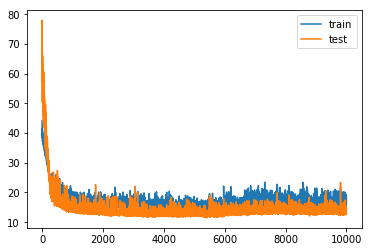

In [231]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=10000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [232]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [233]:
yhat = model.predict(validateX)

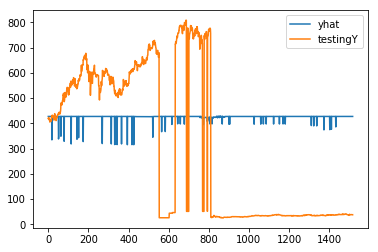

In [234]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()
#plt.axis([0,500,0,55000])

In [235]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000.0
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
9914.51764948161
10311.124554762666
10568.941452630817
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
10414.286912834676
11166.406989553981
11290.435274880407
11290.435274880407
11290.435274880407
11290.435274880407
11290.43527488040

IndexError: index 999 is out of bounds for axis 0 with size 999

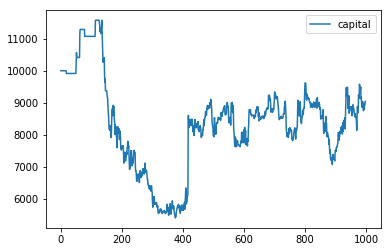

In [237]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [238]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

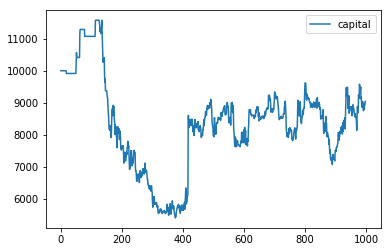

In [239]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [13]:
from keras.models import load_model
model.save("AC.h5")
del model  
#model = load_model('AC.h5')

Using TensorFlow backend.


NameError: name 'model' is not defined

In [19]:
my_data_frame_sum = all_variables.iloc[:,4]
my_data_frame = all_variables.drop(['Date', 'Adj Close.3'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("ALSEA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 248.5041 - val_loss: 241.4621
Epoch 2/2000
 - 0s - loss: 239.4018 - val_loss: 237.3280
Epoch 3/2000
 - 0s - loss: 235.4406 - val_loss: 233.4517
Epoch 4/2000
 - 0s - loss: 231.5663 - val_loss: 229.6022
Epoch 5/2000
 - 0s - loss: 227.7202 - val_loss: 225.7780
Epoch 6/2000
 - 0s - loss: 223.9015 - val_loss: 221.9746
Epoch 7/2000
 - 0s - loss: 220.1094 - val_loss: 218.1978
Epoch 8/2000
 - 0s - loss: 216.3376 - val_loss: 214.4405
Epoch 9/2000
 - 0s - loss: 212.5841 - val_loss: 210.6868
Epoch 10/2000
 - 0s - loss: 208.8303 - val_loss: 206.9330
Epoch 11/2000
 - 0s - loss: 205.0765 - val_loss: 203.1792
Epoch 12/2000
 - 0s - loss: 201.3227 - val_loss: 199.4254
Epoch 13/2000
 - 0s - loss: 197.5689 - val_loss: 195.6716
Epoch 14/2000
 - 0s - loss: 193.8151 - val_loss: 191.9178
Epoch 15/2000
 - 0s - loss: 190.0613 - val_loss: 188.1640
Epoch 16/2000
 - 0s - loss: 186.3075 - val_loss: 184.4102
Epoch 17/2000
 - 0s - loss: 182.553

 - 0s - loss: 87.7559 - val_loss: 87.6682
Epoch 145/2000
 - 0s - loss: 87.6510 - val_loss: 87.5632
Epoch 146/2000
 - 0s - loss: 87.5461 - val_loss: 87.4583
Epoch 147/2000
 - 0s - loss: 87.4411 - val_loss: 87.3533
Epoch 148/2000
 - 0s - loss: 87.3362 - val_loss: 87.2484
Epoch 149/2000
 - 0s - loss: 87.2312 - val_loss: 87.1434
Epoch 150/2000
 - 0s - loss: 87.1263 - val_loss: 87.0385
Epoch 151/2000
 - 0s - loss: 87.0213 - val_loss: 86.9336
Epoch 152/2000
 - 0s - loss: 86.9164 - val_loss: 86.8286
Epoch 153/2000
 - 0s - loss: 86.8115 - val_loss: 86.7237
Epoch 154/2000
 - 0s - loss: 86.7065 - val_loss: 86.6187
Epoch 155/2000
 - 0s - loss: 86.6016 - val_loss: 86.5138
Epoch 156/2000
 - 0s - loss: 86.4966 - val_loss: 86.4089
Epoch 157/2000
 - 0s - loss: 86.3917 - val_loss: 86.3039
Epoch 158/2000
 - 0s - loss: 86.2868 - val_loss: 86.1990
Epoch 159/2000
 - 0s - loss: 86.1818 - val_loss: 86.0940
Epoch 160/2000
 - 0s - loss: 86.0769 - val_loss: 85.9891
Epoch 161/2000
 - 0s - loss: 85.9719 - val_los

Epoch 288/2000
 - 0s - loss: 84.3176 - val_loss: 84.3187
Epoch 289/2000
 - 0s - loss: 84.3210 - val_loss: 84.3190
Epoch 290/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 291/2000
 - 0s - loss: 84.3215 - val_loss: 84.3197
Epoch 292/2000
 - 1s - loss: 84.3217 - val_loss: 84.3200
Epoch 293/2000
 - 0s - loss: 84.3220 - val_loss: 84.3203
Epoch 294/2000
 - 0s - loss: 84.3222 - val_loss: 84.3206
Epoch 295/2000
 - 0s - loss: 84.3224 - val_loss: 84.3210
Epoch 296/2000
 - 0s - loss: 84.3227 - val_loss: 84.3213
Epoch 297/2000
 - 0s - loss: 84.3229 - val_loss: 84.3216
Epoch 298/2000
 - 0s - loss: 84.3232 - val_loss: 84.3219
Epoch 299/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 300/2000
 - 0s - loss: 84.3237 - val_loss: 84.3226
Epoch 301/2000
 - 1s - loss: 84.3239 - val_loss: 84.3229
Epoch 302/2000
 - 0s - loss: 84.3242 - val_loss: 84.3232
Epoch 303/2000
 - 0s - loss: 84.3244 - val_loss: 84.3235
Epoch 304/2000
 - 0s - loss: 84.3246 - val_loss: 84.3239
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 433/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 434/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 435/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 436/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 437/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 438/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 439/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 441/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 442/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 443/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 444/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 445/2000
 - 0s - loss: 84.3303 - val_loss: 84.3268
Epoch 446/2000
 - 0s - loss: 84.3304 - val_loss: 84.3268
Epoch 447/2000
 - 0s - loss: 84.3304 - val_loss: 84.3268
Epoch 448/2000
 - 0s - loss: 84.3304 - val_loss: 84.3268
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 42.0878 - val_loss: 65.0645
Epoch 577/2000
 - 0s - loss: 40.5246 - val_loss: 55.4551
Epoch 578/2000
 - 0s - loss: 40.1321 - val_loss: 68.3566
Epoch 579/2000
 - 0s - loss: 42.0168 - val_loss: 66.6369
Epoch 580/2000
 - 0s - loss: 41.0308 - val_loss: 55.2104
Epoch 581/2000
 - 0s - loss: 40.8008 - val_loss: 61.7606
Epoch 582/2000
 - 0s - loss: 42.3691 - val_loss: 61.8006
Epoch 583/2000
 - 0s - loss: 39.9198 - val_loss: 56.3645
Epoch 584/2000
 - 0s - loss: 38.4376 - val_loss: 53.1645
Epoch 585/2000
 - 0s - loss: 38.3879 - val_loss: 48.3688
Epoch 586/2000
 - 0s - loss: 37.3796 - val_loss: 50.7231
Epoch 587/2000
 - 0s - loss: 38.2011 - val_loss: 51.3934
Epoch 588/2000
 - 0s - loss: 37.9907 - val_loss: 61.6786
Epoch 589/2000
 - 0s - loss: 39.6266 - val_loss: 61.6706
Epoch 590/2000
 - 0s - loss: 41.0120 - val_loss: 70.3024
Epoch 591/2000
 - 0s - loss: 40.0442 - val_loss: 56.3391
Epoch 592/2000
 - 0s - loss: 38.3390 - val_loss: 54.9768
Epoch 593/2000
 - 0s - loss: 38

Epoch 720/2000
 - 0s - loss: 36.3147 - val_loss: 44.8674
Epoch 721/2000
 - 0s - loss: 36.4951 - val_loss: 45.6824
Epoch 722/2000
 - 0s - loss: 34.2396 - val_loss: 46.9943
Epoch 723/2000
 - 0s - loss: 34.7447 - val_loss: 45.6470
Epoch 724/2000
 - 0s - loss: 35.1088 - val_loss: 44.7533
Epoch 725/2000
 - 0s - loss: 37.8379 - val_loss: 41.3034
Epoch 726/2000
 - 0s - loss: 37.2080 - val_loss: 43.2615
Epoch 727/2000
 - 0s - loss: 36.1069 - val_loss: 43.7808
Epoch 728/2000
 - 0s - loss: 36.2003 - val_loss: 45.8539
Epoch 729/2000
 - 0s - loss: 36.4697 - val_loss: 45.3838
Epoch 730/2000
 - 0s - loss: 37.5856 - val_loss: 42.0778
Epoch 731/2000
 - 0s - loss: 34.6746 - val_loss: 40.5484
Epoch 732/2000
 - 0s - loss: 35.5763 - val_loss: 53.0986
Epoch 733/2000
 - 0s - loss: 35.9410 - val_loss: 49.9929
Epoch 734/2000
 - 0s - loss: 35.7265 - val_loss: 41.6666
Epoch 735/2000
 - 0s - loss: 35.1288 - val_loss: 41.5804
Epoch 736/2000
 - 0s - loss: 35.7870 - val_loss: 44.8124
Epoch 737/2000
 - 0s - loss: 34

Epoch 864/2000
 - 0s - loss: 32.7509 - val_loss: 39.9039
Epoch 865/2000
 - 0s - loss: 33.8262 - val_loss: 38.8815
Epoch 866/2000
 - 0s - loss: 32.9558 - val_loss: 40.9157
Epoch 867/2000
 - 0s - loss: 34.2355 - val_loss: 40.5013
Epoch 868/2000
 - 0s - loss: 36.5611 - val_loss: 39.7162
Epoch 869/2000
 - 0s - loss: 35.5482 - val_loss: 37.1853
Epoch 870/2000
 - 0s - loss: 33.6131 - val_loss: 37.5510
Epoch 871/2000
 - 0s - loss: 33.8830 - val_loss: 36.5993
Epoch 872/2000
 - 0s - loss: 35.1727 - val_loss: 38.9129
Epoch 873/2000
 - 0s - loss: 33.5958 - val_loss: 41.1137
Epoch 874/2000
 - 0s - loss: 37.2205 - val_loss: 37.3852
Epoch 875/2000
 - 0s - loss: 34.1369 - val_loss: 38.6159
Epoch 876/2000
 - 0s - loss: 34.6863 - val_loss: 36.4903
Epoch 877/2000
 - 0s - loss: 33.7267 - val_loss: 41.6939
Epoch 878/2000
 - 0s - loss: 32.3975 - val_loss: 38.5107
Epoch 879/2000
 - 0s - loss: 34.4701 - val_loss: 38.9603
Epoch 880/2000
 - 0s - loss: 32.4688 - val_loss: 39.8432
Epoch 881/2000
 - 0s - loss: 34

Epoch 1008/2000
 - 0s - loss: 34.9774 - val_loss: 34.5863
Epoch 1009/2000
 - 0s - loss: 33.4117 - val_loss: 38.4011
Epoch 1010/2000
 - 0s - loss: 35.6997 - val_loss: 38.2986
Epoch 1011/2000
 - 0s - loss: 34.1642 - val_loss: 37.5323
Epoch 1012/2000
 - 0s - loss: 33.0911 - val_loss: 37.5790
Epoch 1013/2000
 - 0s - loss: 32.7275 - val_loss: 37.2194
Epoch 1014/2000
 - 0s - loss: 34.5969 - val_loss: 38.7997
Epoch 1015/2000
 - 0s - loss: 34.0773 - val_loss: 36.3176
Epoch 1016/2000
 - 0s - loss: 33.0845 - val_loss: 36.2517
Epoch 1017/2000
 - 0s - loss: 33.7418 - val_loss: 37.6180
Epoch 1018/2000
 - 0s - loss: 33.3515 - val_loss: 35.1745
Epoch 1019/2000
 - 0s - loss: 37.4614 - val_loss: 34.0764
Epoch 1020/2000
 - 0s - loss: 34.9023 - val_loss: 34.1372
Epoch 1021/2000
 - 0s - loss: 34.4268 - val_loss: 36.1407
Epoch 1022/2000
 - 0s - loss: 31.9433 - val_loss: 37.1221
Epoch 1023/2000
 - 0s - loss: 33.7617 - val_loss: 35.0835
Epoch 1024/2000
 - 0s - loss: 33.6695 - val_loss: 35.1410
Epoch 1025/200

 - 0s - loss: 31.9211 - val_loss: 37.9431
Epoch 1150/2000
 - 0s - loss: 34.2891 - val_loss: 37.0007
Epoch 1151/2000
 - 0s - loss: 33.6510 - val_loss: 37.4132
Epoch 1152/2000
 - 0s - loss: 32.7395 - val_loss: 33.8877
Epoch 1153/2000
 - 0s - loss: 32.1644 - val_loss: 37.7989
Epoch 1154/2000
 - 0s - loss: 34.9154 - val_loss: 35.6143
Epoch 1155/2000
 - 0s - loss: 31.5577 - val_loss: 34.0777
Epoch 1156/2000
 - 0s - loss: 31.8801 - val_loss: 37.3553
Epoch 1157/2000
 - 0s - loss: 33.1202 - val_loss: 36.6765
Epoch 1158/2000
 - 0s - loss: 34.1994 - val_loss: 36.3634
Epoch 1159/2000
 - 0s - loss: 33.5811 - val_loss: 35.7144
Epoch 1160/2000
 - 0s - loss: 31.8769 - val_loss: 35.5539
Epoch 1161/2000
 - 0s - loss: 34.7581 - val_loss: 35.9765
Epoch 1162/2000
 - 0s - loss: 34.4752 - val_loss: 36.9075
Epoch 1163/2000
 - 0s - loss: 31.9830 - val_loss: 35.2070
Epoch 1164/2000
 - 0s - loss: 32.6975 - val_loss: 35.0163
Epoch 1165/2000
 - 0s - loss: 33.1190 - val_loss: 37.3357
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 31.2521 - val_loss: 34.7306
Epoch 1292/2000
 - 0s - loss: 36.5174 - val_loss: 36.1552
Epoch 1293/2000
 - 0s - loss: 34.5108 - val_loss: 33.3060
Epoch 1294/2000
 - 0s - loss: 32.7195 - val_loss: 33.9602
Epoch 1295/2000
 - 0s - loss: 33.3257 - val_loss: 34.1847
Epoch 1296/2000
 - 0s - loss: 33.2630 - val_loss: 35.0943
Epoch 1297/2000
 - 0s - loss: 33.1348 - val_loss: 36.8965
Epoch 1298/2000
 - 0s - loss: 32.6155 - val_loss: 35.1491
Epoch 1299/2000
 - 0s - loss: 31.6306 - val_loss: 37.2200
Epoch 1300/2000
 - 0s - loss: 32.4603 - val_loss: 34.6157
Epoch 1301/2000
 - 0s - loss: 34.0616 - val_loss: 33.1503
Epoch 1302/2000
 - 0s - loss: 31.5869 - val_loss: 32.3354
Epoch 1303/2000
 - 0s - loss: 33.0089 - val_loss: 33.1154
Epoch 1304/2000
 - 0s - loss: 34.7267 - val_loss: 32.4241
Epoch 1305/2000
 - 0s - loss: 33.2369 - val_loss: 35.3851
Epoch 1306/2000
 - 0s - loss: 33.9647 - val_loss: 39.2023
Epoch 1307/2000
 - 0s - loss: 33.2288 - val_loss: 34.0461
Epoch 1308/200

 - 0s - loss: 32.0371 - val_loss: 25.3547
Epoch 1433/2000
 - 0s - loss: 27.4765 - val_loss: 31.3467
Epoch 1434/2000
 - 0s - loss: 27.3938 - val_loss: 30.7401
Epoch 1435/2000
 - 0s - loss: 28.4289 - val_loss: 30.9257
Epoch 1436/2000
 - 0s - loss: 33.4723 - val_loss: 24.0979
Epoch 1437/2000
 - 0s - loss: 31.9396 - val_loss: 25.9755
Epoch 1438/2000
 - 0s - loss: 31.7936 - val_loss: 27.1997
Epoch 1439/2000
 - 0s - loss: 30.8349 - val_loss: 25.5605
Epoch 1440/2000
 - 0s - loss: 31.4015 - val_loss: 25.8268
Epoch 1441/2000
 - 0s - loss: 31.4579 - val_loss: 24.2912
Epoch 1442/2000
 - 0s - loss: 26.2926 - val_loss: 25.8638
Epoch 1443/2000
 - 0s - loss: 29.8002 - val_loss: 25.6490
Epoch 1444/2000
 - 0s - loss: 31.3197 - val_loss: 30.6417
Epoch 1445/2000
 - 0s - loss: 30.2725 - val_loss: 29.5325
Epoch 1446/2000
 - 0s - loss: 26.9496 - val_loss: 26.2771
Epoch 1447/2000
 - 0s - loss: 27.9931 - val_loss: 29.5076
Epoch 1448/2000
 - 0s - loss: 30.7989 - val_loss: 29.3612
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 30.2383 - val_loss: 22.1160
Epoch 1575/2000
 - 0s - loss: 30.8288 - val_loss: 21.1604
Epoch 1576/2000
 - 0s - loss: 25.0894 - val_loss: 24.5773
Epoch 1577/2000
 - 0s - loss: 25.7977 - val_loss: 22.6098
Epoch 1578/2000
 - 0s - loss: 29.5694 - val_loss: 22.1132
Epoch 1579/2000
 - 0s - loss: 27.5708 - val_loss: 23.2683
Epoch 1580/2000
 - 0s - loss: 25.3901 - val_loss: 24.5030
Epoch 1581/2000
 - 0s - loss: 28.1190 - val_loss: 26.9633
Epoch 1582/2000
 - 0s - loss: 30.8650 - val_loss: 24.9989
Epoch 1583/2000
 - 0s - loss: 29.2430 - val_loss: 26.5191
Epoch 1584/2000
 - 0s - loss: 29.2220 - val_loss: 22.4448
Epoch 1585/2000
 - 0s - loss: 25.3971 - val_loss: 21.5530
Epoch 1586/2000
 - 0s - loss: 30.1698 - val_loss: 22.9909
Epoch 1587/2000
 - 0s - loss: 30.4592 - val_loss: 22.4358
Epoch 1588/2000
 - 0s - loss: 27.3213 - val_loss: 23.5448
Epoch 1589/2000
 - 0s - loss: 29.4812 - val_loss: 27.0695
Epoch 1590/2000
 - 0s - loss: 29.1130 - val_loss: 21.7651
Epoch 1591/200

 - 0s - loss: 28.0143 - val_loss: 22.4964
Epoch 1716/2000
 - 0s - loss: 27.6612 - val_loss: 21.9088
Epoch 1717/2000
 - 0s - loss: 25.1598 - val_loss: 20.9712
Epoch 1718/2000
 - 0s - loss: 25.5222 - val_loss: 25.4750
Epoch 1719/2000
 - 0s - loss: 27.5329 - val_loss: 20.7452
Epoch 1720/2000
 - 0s - loss: 27.9300 - val_loss: 20.7240
Epoch 1721/2000
 - 0s - loss: 27.5370 - val_loss: 23.1057
Epoch 1722/2000
 - 0s - loss: 28.2020 - val_loss: 22.6166
Epoch 1723/2000
 - 0s - loss: 27.0775 - val_loss: 24.2054
Epoch 1724/2000
 - 0s - loss: 30.0797 - val_loss: 24.8752
Epoch 1725/2000
 - 0s - loss: 26.3981 - val_loss: 22.2000
Epoch 1726/2000
 - 0s - loss: 28.4246 - val_loss: 21.3498
Epoch 1727/2000
 - 0s - loss: 25.8028 - val_loss: 21.4511
Epoch 1728/2000
 - 0s - loss: 27.1272 - val_loss: 25.1083
Epoch 1729/2000
 - 0s - loss: 28.8733 - val_loss: 23.3713
Epoch 1730/2000
 - 0s - loss: 27.4321 - val_loss: 21.8188
Epoch 1731/2000
 - 0s - loss: 28.4545 - val_loss: 24.7408
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 28.6376 - val_loss: 24.0509
Epoch 1858/2000
 - 0s - loss: 26.0183 - val_loss: 21.8243
Epoch 1859/2000
 - 0s - loss: 27.7300 - val_loss: 26.9269
Epoch 1860/2000
 - 0s - loss: 27.0995 - val_loss: 23.4088
Epoch 1861/2000
 - 0s - loss: 25.1304 - val_loss: 23.1629
Epoch 1862/2000
 - 0s - loss: 26.1108 - val_loss: 24.4354
Epoch 1863/2000
 - 0s - loss: 26.0796 - val_loss: 23.6079
Epoch 1864/2000
 - 0s - loss: 32.6592 - val_loss: 23.6284
Epoch 1865/2000
 - 0s - loss: 27.4338 - val_loss: 21.8770
Epoch 1866/2000
 - 0s - loss: 28.2847 - val_loss: 21.4009
Epoch 1867/2000
 - 0s - loss: 25.9532 - val_loss: 22.0745
Epoch 1868/2000
 - 0s - loss: 26.2655 - val_loss: 21.2430
Epoch 1869/2000
 - 0s - loss: 29.3296 - val_loss: 26.7489
Epoch 1870/2000
 - 0s - loss: 26.4113 - val_loss: 20.8615
Epoch 1871/2000
 - 0s - loss: 26.0226 - val_loss: 20.6134
Epoch 1872/2000
 - 0s - loss: 26.2591 - val_loss: 22.1879
Epoch 1873/2000
 - 0s - loss: 27.1398 - val_loss: 24.4473
Epoch 1874/200

 - 0s - loss: 29.6534 - val_loss: 28.4928
Epoch 1999/2000
 - 0s - loss: 27.7851 - val_loss: 25.2845
Epoch 2000/2000
 - 0s - loss: 27.5609 - val_loss: 25.2887


In [20]:
my_data_frame_sum = all_variables.iloc[:,7]
my_data_frame = all_variables.drop(['Date', 'Adj Close.6'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("BACHOCO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 249.1068 - val_loss: 241.3498
Epoch 2/2000
 - 0s - loss: 239.3324 - val_loss: 237.2437
Epoch 3/2000
 - 0s - loss: 235.3595 - val_loss: 233.3580
Epoch 4/2000
 - 0s - loss: 231.4879 - val_loss: 229.4994
Epoch 5/2000
 - 0s - loss: 227.6174 - val_loss: 225.6749
Epoch 6/2000
 - 0s - loss: 223.7994 - val_loss: 221.8722
Epoch 7/2000
 - 0s - loss: 220.0069 - val_loss: 218.0956
Epoch 8/2000
 - 0s - loss: 216.2354 - val_loss: 214.3387
Epoch 9/2000
 - 0s - loss: 212.4823 - val_loss: 210.5849
Epoch 10/2000
 - 0s - loss: 208.7285 - val_loss: 206.8311
Epoch 11/2000
 - 0s - loss: 204.9747 - val_loss: 203.0773
Epoch 12/2000
 - 0s - loss: 201.2209 - val_loss: 199.3235
Epoch 13/2000
 - 0s - loss: 197.4670 - val_loss: 195.5697
Epoch 14/2000
 - 0s - loss: 193.7132 - val_loss: 191.8159
Epoch 15/2000
 - 0s - loss: 189.9594 - val_loss: 188.0621
Epoch 16/2000
 - 0s - loss: 186.2056 - val_loss: 184.3083
Epoch 17/2000
 - 0s - loss: 182.451

 - 0s - loss: 87.7536 - val_loss: 87.6659
Epoch 145/2000
 - 0s - loss: 87.6487 - val_loss: 87.5609
Epoch 146/2000
 - 0s - loss: 87.5438 - val_loss: 87.4560
Epoch 147/2000
 - 0s - loss: 87.4388 - val_loss: 87.3510
Epoch 148/2000
 - 0s - loss: 87.3339 - val_loss: 87.2461
Epoch 149/2000
 - 0s - loss: 87.2289 - val_loss: 87.1412
Epoch 150/2000
 - 0s - loss: 87.1240 - val_loss: 87.0362
Epoch 151/2000
 - 0s - loss: 87.0191 - val_loss: 86.9313
Epoch 152/2000
 - 0s - loss: 86.9141 - val_loss: 86.8263
Epoch 153/2000
 - 0s - loss: 86.8092 - val_loss: 86.7214
Epoch 154/2000
 - 0s - loss: 86.7042 - val_loss: 86.6165
Epoch 155/2000
 - 0s - loss: 86.5993 - val_loss: 86.5115
Epoch 156/2000
 - 0s - loss: 86.4943 - val_loss: 86.4066
Epoch 157/2000
 - 0s - loss: 86.3894 - val_loss: 86.3016
Epoch 158/2000
 - 0s - loss: 86.2845 - val_loss: 86.1967
Epoch 159/2000
 - 0s - loss: 86.1795 - val_loss: 86.0917
Epoch 160/2000
 - 0s - loss: 86.0746 - val_loss: 85.9868
Epoch 161/2000
 - 0s - loss: 85.9696 - val_los

Epoch 288/2000
 - 0s - loss: 84.3207 - val_loss: 84.3186
Epoch 289/2000
 - 0s - loss: 84.3209 - val_loss: 84.3189
Epoch 290/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 291/2000
 - 0s - loss: 84.3214 - val_loss: 84.3196
Epoch 292/2000
 - 0s - loss: 84.3216 - val_loss: 84.3199
Epoch 293/2000
 - 0s - loss: 84.3219 - val_loss: 84.3202
Epoch 294/2000
 - 0s - loss: 84.3221 - val_loss: 84.3205
Epoch 295/2000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 296/2000
 - 0s - loss: 84.3226 - val_loss: 84.3212
Epoch 297/2000
 - 0s - loss: 84.3229 - val_loss: 84.3215
Epoch 298/2000
 - 0s - loss: 84.3231 - val_loss: 84.3218
Epoch 299/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 300/2000
 - 0s - loss: 84.3236 - val_loss: 84.3225
Epoch 301/2000
 - 0s - loss: 84.3238 - val_loss: 84.3228
Epoch 302/2000
 - 0s - loss: 84.3241 - val_loss: 84.3231
Epoch 303/2000
 - 0s - loss: 84.3243 - val_loss: 84.3234
Epoch 304/2000
 - 0s - loss: 84.3246 - val_loss: 84.3238
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 433/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 434/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 435/2000
 - 1s - loss: 84.3301 - val_loss: 84.3265
Epoch 436/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 437/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 438/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 439/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 441/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 442/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 443/2000
 - 0s - loss: 84.3303 - val_loss: 84.3266
Epoch 444/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 445/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 446/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 447/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 448/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 577/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 578/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 579/2000
 - 0s - loss: 84.3325 - val_loss: 84.3295
Epoch 580/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 581/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 582/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 583/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 584/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 585/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 586/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 587/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 588/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 589/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 590/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 591/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 592/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 63.1379 - val_loss: 84.4443
Epoch 721/2000
 - 0s - loss: 57.9611 - val_loss: 84.5013
Epoch 722/2000
 - 0s - loss: 54.9990 - val_loss: 84.6436
Epoch 723/2000
 - 0s - loss: 52.1382 - val_loss: 84.6310
Epoch 724/2000
 - 0s - loss: 51.7064 - val_loss: 83.8336
Epoch 725/2000
 - 0s - loss: 48.6099 - val_loss: 83.0245
Epoch 726/2000
 - 0s - loss: 48.4918 - val_loss: 77.8500
Epoch 727/2000
 - 0s - loss: 47.4415 - val_loss: 74.3878
Epoch 728/2000
 - 0s - loss: 44.8777 - val_loss: 76.7329
Epoch 729/2000
 - 0s - loss: 43.8682 - val_loss: 77.1719
Epoch 730/2000
 - 0s - loss: 45.3774 - val_loss: 58.6947
Epoch 731/2000
 - 0s - loss: 42.6978 - val_loss: 66.5651
Epoch 732/2000
 - 0s - loss: 44.0362 - val_loss: 61.5517
Epoch 733/2000
 - 0s - loss: 43.0313 - val_loss: 76.3350
Epoch 734/2000
 - 0s - loss: 43.4733 - val_loss: 64.8708
Epoch 735/2000
 - 0s - loss: 44.4565 - val_loss: 74.4415
Epoch 736/2000
 - 0s - loss: 42.2053 - val_loss: 59.1647
Epoch 737/2000
 - 0s - loss: 41

Epoch 864/2000
 - 0s - loss: 38.8124 - val_loss: 50.0253
Epoch 865/2000
 - 0s - loss: 40.6801 - val_loss: 49.0069
Epoch 866/2000
 - 0s - loss: 39.0544 - val_loss: 53.1228
Epoch 867/2000
 - 0s - loss: 40.1810 - val_loss: 49.4865
Epoch 868/2000
 - 0s - loss: 40.1925 - val_loss: 45.1594
Epoch 869/2000
 - 0s - loss: 38.3632 - val_loss: 48.0890
Epoch 870/2000
 - 0s - loss: 40.1840 - val_loss: 51.6366
Epoch 871/2000
 - 0s - loss: 40.8388 - val_loss: 50.6786
Epoch 872/2000
 - 0s - loss: 39.7428 - val_loss: 44.8565
Epoch 873/2000
 - 0s - loss: 38.7443 - val_loss: 57.9153
Epoch 874/2000
 - 0s - loss: 38.6784 - val_loss: 48.6525
Epoch 875/2000
 - 0s - loss: 38.3559 - val_loss: 47.9060
Epoch 876/2000
 - 0s - loss: 37.7048 - val_loss: 55.4033
Epoch 877/2000
 - 0s - loss: 42.5093 - val_loss: 56.8105
Epoch 878/2000
 - 0s - loss: 38.6131 - val_loss: 48.7791
Epoch 879/2000
 - 0s - loss: 39.4995 - val_loss: 47.4350
Epoch 880/2000
 - 0s - loss: 40.0420 - val_loss: 51.5354
Epoch 881/2000
 - 0s - loss: 39

Epoch 1008/2000
 - 0s - loss: 36.1739 - val_loss: 43.8276
Epoch 1009/2000
 - 0s - loss: 38.7267 - val_loss: 41.3145
Epoch 1010/2000
 - 0s - loss: 35.6984 - val_loss: 42.2495
Epoch 1011/2000
 - 0s - loss: 37.9453 - val_loss: 45.7684
Epoch 1012/2000
 - 0s - loss: 36.8078 - val_loss: 41.4098
Epoch 1013/2000
 - 0s - loss: 33.0346 - val_loss: 44.5840
Epoch 1014/2000
 - 0s - loss: 37.8030 - val_loss: 43.5536
Epoch 1015/2000
 - 0s - loss: 35.1811 - val_loss: 40.4332
Epoch 1016/2000
 - 0s - loss: 37.3813 - val_loss: 43.6015
Epoch 1017/2000
 - 0s - loss: 34.7276 - val_loss: 44.3291
Epoch 1018/2000
 - 0s - loss: 35.5795 - val_loss: 42.0187
Epoch 1019/2000
 - 0s - loss: 35.3084 - val_loss: 44.4057
Epoch 1020/2000
 - 0s - loss: 34.8750 - val_loss: 41.5481
Epoch 1021/2000
 - 0s - loss: 34.2619 - val_loss: 42.7229
Epoch 1022/2000
 - 0s - loss: 34.4802 - val_loss: 42.6956
Epoch 1023/2000
 - 0s - loss: 36.8439 - val_loss: 38.9533
Epoch 1024/2000
 - 0s - loss: 33.8211 - val_loss: 45.8011
Epoch 1025/200

 - 0s - loss: 33.4539 - val_loss: 36.3560
Epoch 1150/2000
 - 0s - loss: 36.4602 - val_loss: 33.5346
Epoch 1151/2000
 - 0s - loss: 32.5345 - val_loss: 39.4387
Epoch 1152/2000
 - 0s - loss: 33.5561 - val_loss: 35.3375
Epoch 1153/2000
 - 0s - loss: 35.6910 - val_loss: 38.5960
Epoch 1154/2000
 - 0s - loss: 34.9894 - val_loss: 36.3287
Epoch 1155/2000
 - 0s - loss: 35.1043 - val_loss: 40.4585
Epoch 1156/2000
 - 0s - loss: 33.1151 - val_loss: 36.3883
Epoch 1157/2000
 - 0s - loss: 32.3731 - val_loss: 35.2881
Epoch 1158/2000
 - 0s - loss: 33.8911 - val_loss: 37.2379
Epoch 1159/2000
 - 0s - loss: 35.1827 - val_loss: 35.6988
Epoch 1160/2000
 - 0s - loss: 32.7556 - val_loss: 38.0788
Epoch 1161/2000
 - 0s - loss: 31.7626 - val_loss: 33.2536
Epoch 1162/2000
 - 0s - loss: 32.0679 - val_loss: 35.1505
Epoch 1163/2000
 - 0s - loss: 34.9907 - val_loss: 36.7673
Epoch 1164/2000
 - 0s - loss: 34.3655 - val_loss: 31.5869
Epoch 1165/2000
 - 0s - loss: 32.5409 - val_loss: 34.9205
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 28.1075 - val_loss: 28.3567
Epoch 1292/2000
 - 0s - loss: 29.0046 - val_loss: 24.9258
Epoch 1293/2000
 - 0s - loss: 28.9804 - val_loss: 26.6752
Epoch 1294/2000
 - 0s - loss: 27.4678 - val_loss: 29.2140
Epoch 1295/2000
 - 0s - loss: 30.1506 - val_loss: 24.9376
Epoch 1296/2000
 - 0s - loss: 29.0044 - val_loss: 26.5064
Epoch 1297/2000
 - 0s - loss: 29.1971 - val_loss: 27.2378
Epoch 1298/2000
 - 0s - loss: 29.6155 - val_loss: 26.2204
Epoch 1299/2000
 - 0s - loss: 28.5677 - val_loss: 25.7819
Epoch 1300/2000
 - 0s - loss: 29.5000 - val_loss: 28.9271
Epoch 1301/2000
 - 0s - loss: 26.8000 - val_loss: 25.9482
Epoch 1302/2000
 - 0s - loss: 30.1423 - val_loss: 28.5138
Epoch 1303/2000
 - 0s - loss: 27.3109 - val_loss: 27.7210
Epoch 1304/2000
 - 0s - loss: 28.3314 - val_loss: 24.9319
Epoch 1305/2000
 - 0s - loss: 30.2998 - val_loss: 26.0698
Epoch 1306/2000
 - 0s - loss: 27.8449 - val_loss: 24.6853
Epoch 1307/2000
 - 0s - loss: 31.9051 - val_loss: 26.1708
Epoch 1308/200

 - 0s - loss: 32.8057 - val_loss: 26.5537
Epoch 1433/2000
 - 0s - loss: 34.5101 - val_loss: 29.0113
Epoch 1434/2000
 - 0s - loss: 33.7622 - val_loss: 27.5265
Epoch 1435/2000
 - 0s - loss: 30.2778 - val_loss: 26.3240
Epoch 1436/2000
 - 0s - loss: 28.6775 - val_loss: 26.1817
Epoch 1437/2000
 - 0s - loss: 26.9413 - val_loss: 25.8724
Epoch 1438/2000
 - 0s - loss: 28.5708 - val_loss: 25.4611
Epoch 1439/2000
 - 0s - loss: 31.2530 - val_loss: 25.3530
Epoch 1440/2000
 - 0s - loss: 26.9715 - val_loss: 24.5608
Epoch 1441/2000
 - 0s - loss: 30.3640 - val_loss: 25.5836
Epoch 1442/2000
 - 0s - loss: 31.0219 - val_loss: 25.3249
Epoch 1443/2000
 - 0s - loss: 28.1308 - val_loss: 23.9775
Epoch 1444/2000
 - 0s - loss: 28.6945 - val_loss: 29.0353
Epoch 1445/2000
 - 0s - loss: 26.8950 - val_loss: 24.2147
Epoch 1446/2000
 - 0s - loss: 29.3784 - val_loss: 24.8002
Epoch 1447/2000
 - 0s - loss: 30.3038 - val_loss: 25.3175
Epoch 1448/2000
 - 0s - loss: 28.0536 - val_loss: 26.2239
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 29.2486 - val_loss: 22.5186
Epoch 1575/2000
 - 0s - loss: 26.0534 - val_loss: 23.4205
Epoch 1576/2000
 - 0s - loss: 27.6732 - val_loss: 24.0546
Epoch 1577/2000
 - 0s - loss: 25.9384 - val_loss: 22.7486
Epoch 1578/2000
 - 0s - loss: 26.7990 - val_loss: 22.8181
Epoch 1579/2000
 - 0s - loss: 27.5773 - val_loss: 24.9313
Epoch 1580/2000
 - 0s - loss: 29.9793 - val_loss: 24.2949
Epoch 1581/2000
 - 0s - loss: 29.9143 - val_loss: 23.7791
Epoch 1582/2000
 - 0s - loss: 25.7784 - val_loss: 21.0006
Epoch 1583/2000
 - 0s - loss: 32.7837 - val_loss: 29.6785
Epoch 1584/2000
 - 0s - loss: 26.7754 - val_loss: 23.5107
Epoch 1585/2000
 - 0s - loss: 28.5355 - val_loss: 22.6725
Epoch 1586/2000
 - 0s - loss: 26.8230 - val_loss: 24.2751
Epoch 1587/2000
 - 0s - loss: 26.0477 - val_loss: 22.3747
Epoch 1588/2000
 - 0s - loss: 33.1409 - val_loss: 31.4918
Epoch 1589/2000
 - 0s - loss: 28.6820 - val_loss: 22.8341
Epoch 1590/2000
 - 0s - loss: 31.4852 - val_loss: 27.1707
Epoch 1591/200

 - 0s - loss: 28.7700 - val_loss: 24.3498
Epoch 1716/2000
 - 0s - loss: 28.1631 - val_loss: 23.4755
Epoch 1717/2000
 - 0s - loss: 26.5218 - val_loss: 22.9147
Epoch 1718/2000
 - 0s - loss: 27.1877 - val_loss: 22.9734
Epoch 1719/2000
 - 0s - loss: 30.8473 - val_loss: 26.2932
Epoch 1720/2000
 - 1s - loss: 29.9710 - val_loss: 26.6096
Epoch 1721/2000
 - 0s - loss: 28.8275 - val_loss: 21.6579
Epoch 1722/2000
 - 0s - loss: 28.6374 - val_loss: 23.8250
Epoch 1723/2000
 - 0s - loss: 28.5164 - val_loss: 22.4234
Epoch 1724/2000
 - 0s - loss: 26.7518 - val_loss: 23.0889
Epoch 1725/2000
 - 0s - loss: 27.1153 - val_loss: 23.4329
Epoch 1726/2000
 - 0s - loss: 28.7249 - val_loss: 23.6230
Epoch 1727/2000
 - 0s - loss: 31.9228 - val_loss: 27.3591
Epoch 1728/2000
 - 0s - loss: 26.2586 - val_loss: 24.8313
Epoch 1729/2000
 - 0s - loss: 31.2513 - val_loss: 27.9803
Epoch 1730/2000
 - 0s - loss: 28.7358 - val_loss: 22.1759
Epoch 1731/2000
 - 0s - loss: 30.1302 - val_loss: 26.6172
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 26.4103 - val_loss: 24.9836
Epoch 1858/2000
 - 0s - loss: 27.0637 - val_loss: 24.5635
Epoch 1859/2000
 - 0s - loss: 27.5127 - val_loss: 21.7800
Epoch 1860/2000
 - 0s - loss: 25.4579 - val_loss: 28.9153
Epoch 1861/2000
 - 0s - loss: 34.1914 - val_loss: 31.8518
Epoch 1862/2000
 - 0s - loss: 33.7972 - val_loss: 28.6653
Epoch 1863/2000
 - 0s - loss: 27.0770 - val_loss: 28.2272
Epoch 1864/2000
 - 0s - loss: 28.3969 - val_loss: 31.6566
Epoch 1865/2000
 - 0s - loss: 31.8070 - val_loss: 26.3690
Epoch 1866/2000
 - 0s - loss: 29.9863 - val_loss: 26.5905
Epoch 1867/2000
 - 0s - loss: 29.2579 - val_loss: 24.1750
Epoch 1868/2000
 - 0s - loss: 28.7184 - val_loss: 23.8074
Epoch 1869/2000
 - 0s - loss: 28.5273 - val_loss: 24.7231
Epoch 1870/2000
 - 0s - loss: 29.0518 - val_loss: 23.2372
Epoch 1871/2000
 - 0s - loss: 27.5635 - val_loss: 22.3380
Epoch 1872/2000
 - 0s - loss: 29.8865 - val_loss: 23.6487
Epoch 1873/2000
 - 0s - loss: 30.1991 - val_loss: 23.2319
Epoch 1874/200

 - 0s - loss: 28.1694 - val_loss: 24.9791
Epoch 1999/2000
 - 0s - loss: 28.2379 - val_loss: 25.9054
Epoch 2000/2000
 - 0s - loss: 27.9233 - val_loss: 23.1462


In [21]:
my_data_frame_sum = all_variables.iloc[:,10]
my_data_frame = all_variables.drop(['Date', 'Adj Close.9'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("BOLSA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 249.0207 - val_loss: 242.0341
Epoch 2/2000
 - 0s - loss: 239.9735 - val_loss: 237.9020
Epoch 3/2000
 - 0s - loss: 236.0188 - val_loss: 234.0211
Epoch 4/2000
 - 0s - loss: 232.1356 - val_loss: 230.1546
Epoch 5/2000
 - 0s - loss: 228.2756 - val_loss: 226.3278
Epoch 6/2000
 - 0s - loss: 224.4513 - val_loss: 222.5210
Epoch 7/2000
 - 0s - loss: 220.6558 - val_loss: 218.7431
Epoch 8/2000
 - 0s - loss: 216.8829 - val_loss: 214.9836
Epoch 9/2000
 - 0s - loss: 213.1272 - val_loss: 211.2299
Epoch 10/2000
 - 0s - loss: 209.3734 - val_loss: 207.4760
Epoch 11/2000
 - 0s - loss: 205.6196 - val_loss: 203.7222
Epoch 12/2000
 - 0s - loss: 201.8658 - val_loss: 199.9684
Epoch 13/2000
 - 0s - loss: 198.1120 - val_loss: 196.2146
Epoch 14/2000
 - 0s - loss: 194.3582 - val_loss: 192.4608
Epoch 15/2000
 - 0s - loss: 190.6043 - val_loss: 188.7070
Epoch 16/2000
 - 0s - loss: 186.8505 - val_loss: 184.9532
Epoch 17/2000
 - 0s - loss: 183.096

 - 0s - loss: 87.7775 - val_loss: 87.6897
Epoch 145/2000
 - 0s - loss: 87.6725 - val_loss: 87.5847
Epoch 146/2000
 - 0s - loss: 87.5676 - val_loss: 87.4798
Epoch 147/2000
 - 0s - loss: 87.4626 - val_loss: 87.3749
Epoch 148/2000
 - 0s - loss: 87.3577 - val_loss: 87.2699
Epoch 149/2000
 - 0s - loss: 87.2528 - val_loss: 87.1650
Epoch 150/2000
 - 0s - loss: 87.1478 - val_loss: 87.0600
Epoch 151/2000
 - 0s - loss: 87.0429 - val_loss: 86.9551
Epoch 152/2000
 - 0s - loss: 86.9379 - val_loss: 86.8502
Epoch 153/2000
 - 0s - loss: 86.8330 - val_loss: 86.7452
Epoch 154/2000
 - 0s - loss: 86.7280 - val_loss: 86.6403
Epoch 155/2000
 - 0s - loss: 86.6231 - val_loss: 86.5353
Epoch 156/2000
 - 0s - loss: 86.5182 - val_loss: 86.4304
Epoch 157/2000
 - 0s - loss: 86.4132 - val_loss: 86.3254
Epoch 158/2000
 - 0s - loss: 86.3083 - val_loss: 86.2205
Epoch 159/2000
 - 0s - loss: 86.2033 - val_loss: 86.1156
Epoch 160/2000
 - 0s - loss: 86.0984 - val_loss: 86.0106
Epoch 161/2000
 - 0s - loss: 85.9935 - val_los

Epoch 288/2000
 - 1s - loss: 84.3173 - val_loss: 84.3183
Epoch 289/2000
 - 1s - loss: 84.3207 - val_loss: 84.3187
Epoch 290/2000
 - 0s - loss: 84.3209 - val_loss: 84.3190
Epoch 291/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 292/2000
 - 0s - loss: 84.3214 - val_loss: 84.3196
Epoch 293/2000
 - 0s - loss: 84.3217 - val_loss: 84.3199
Epoch 294/2000
 - 0s - loss: 84.3219 - val_loss: 84.3203
Epoch 295/2000
 - 0s - loss: 84.3222 - val_loss: 84.3206
Epoch 296/2000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 297/2000
 - 0s - loss: 84.3227 - val_loss: 84.3212
Epoch 298/2000
 - 0s - loss: 84.3229 - val_loss: 84.3216
Epoch 299/2000
 - 0s - loss: 84.3231 - val_loss: 84.3219
Epoch 300/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 301/2000
 - 0s - loss: 84.3236 - val_loss: 84.3225
Epoch 302/2000
 - 0s - loss: 84.3239 - val_loss: 84.3228
Epoch 303/2000
 - 0s - loss: 84.3241 - val_loss: 84.3232
Epoch 304/2000
 - 0s - loss: 84.3244 - val_loss: 84.3235
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 433/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 434/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 435/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 436/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 437/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 438/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 439/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 441/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 442/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 443/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 444/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 445/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 446/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 447/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 448/2000
 - 0s - loss: 84.3303 - val_loss: 84.3268
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 577/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 578/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 579/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 580/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 581/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 582/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 583/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 584/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 585/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 586/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 587/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 588/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 589/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 590/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 591/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 592/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 84.3349 - val_loss: 84.3324
Epoch 721/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 722/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 723/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 724/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 725/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 726/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 727/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 728/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 729/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 730/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 731/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 732/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 733/2000
 - 0s - loss: 84.3352 - val_loss: 84.3326
Epoch 734/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 735/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 736/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 737/2000
 - 0s - loss: 84

Epoch 864/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 865/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 866/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 867/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 868/2000
 - 0s - loss: 84.3375 - val_loss: 84.3354
Epoch 869/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 870/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 871/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 872/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 873/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 874/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 875/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 876/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 877/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 878/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 879/2000
 - 0s - loss: 84.3376 - val_loss: 84.3357
Epoch 880/2000
 - 0s - loss: 84.3377 - val_loss: 84.3357
Epoch 881/2000
 - 0s - loss: 84

Epoch 1008/2000
 - 0s - loss: 84.3398 - val_loss: 84.3383
Epoch 1009/2000
 - 0s - loss: 84.3398 - val_loss: 84.3384
Epoch 1010/2000
 - 0s - loss: 84.3398 - val_loss: 84.3384
Epoch 1011/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1012/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1013/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1014/2000
 - 0s - loss: 84.3399 - val_loss: 84.3385
Epoch 1015/2000
 - 0s - loss: 84.3399 - val_loss: 84.3385
Epoch 1016/2000
 - 0s - loss: 84.3399 - val_loss: 84.3385
Epoch 1017/2000
 - 0s - loss: 84.3400 - val_loss: 84.3385
Epoch 1018/2000
 - 0s - loss: 84.3400 - val_loss: 84.3385
Epoch 1019/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1020/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1021/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1022/2000
 - 0s - loss: 84.3401 - val_loss: 84.3386
Epoch 1023/2000
 - 0s - loss: 84.3401 - val_loss: 84.3386
Epoch 1024/2000
 - 0s - loss: 84.3401 - val_loss: 84.3387
Epoch 1025/200

 - 0s - loss: 84.3422 - val_loss: 84.3412
Epoch 1150/2000
 - 0s - loss: 84.3422 - val_loss: 84.3413
Epoch 1151/2000
 - 0s - loss: 84.3422 - val_loss: 84.3413
Epoch 1152/2000
 - 0s - loss: 84.3422 - val_loss: 84.3413
Epoch 1153/2000
 - 0s - loss: 84.3423 - val_loss: 84.3413
Epoch 1154/2000
 - 0s - loss: 84.3423 - val_loss: 84.3413
Epoch 1155/2000
 - 0s - loss: 84.3423 - val_loss: 84.3414
Epoch 1156/2000
 - 0s - loss: 84.3423 - val_loss: 84.3414
Epoch 1157/2000
 - 0s - loss: 84.3423 - val_loss: 84.3414
Epoch 1158/2000
 - 0s - loss: 84.3424 - val_loss: 84.3414
Epoch 1159/2000
 - 0s - loss: 84.3424 - val_loss: 84.3415
Epoch 1160/2000
 - 0s - loss: 84.3424 - val_loss: 84.3415
Epoch 1161/2000
 - 0s - loss: 84.3424 - val_loss: 84.3415
Epoch 1162/2000
 - 0s - loss: 84.3424 - val_loss: 84.3415
Epoch 1163/2000
 - 0s - loss: 84.3424 - val_loss: 84.3415
Epoch 1164/2000
 - 0s - loss: 84.3424 - val_loss: 84.3416
Epoch 1165/2000
 - 0s - loss: 84.3425 - val_loss: 84.3416
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1292/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1293/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1294/2000
 - 0s - loss: 84.3443 - val_loss: 84.3439
Epoch 1295/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1296/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1297/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1298/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1299/2000
 - 0s - loss: 84.3444 - val_loss: 84.3440
Epoch 1300/2000
 - 0s - loss: 84.3491 - val_loss: 84.3436
Epoch 1301/2000
 - 0s - loss: 84.3441 - val_loss: 84.3436
Epoch 1302/2000
 - 0s - loss: 84.3442 - val_loss: 84.3436
Epoch 1303/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1304/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1305/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1306/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1307/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1308/200

 - 0s - loss: 84.3441 - val_loss: 84.3436
Epoch 1433/2000
 - 0s - loss: 84.3442 - val_loss: 84.3436
Epoch 1434/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1435/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1436/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1437/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1438/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1439/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1440/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1441/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1442/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1443/2000
 - 0s - loss: 84.3443 - val_loss: 84.3439
Epoch 1444/2000
 - 0s - loss: 84.3443 - val_loss: 84.3439
Epoch 1445/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1446/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1447/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1448/2000
 - 0s - loss: 84.3444 - val_loss: 84.3440
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1575/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1576/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1577/2000
 - 0s - loss: 84.3442 - val_loss: 84.3437
Epoch 1578/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1579/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1580/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1581/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1582/2000
 - 0s - loss: 84.3443 - val_loss: 84.3438
Epoch 1583/2000
 - 0s - loss: 84.3443 - val_loss: 84.3439
Epoch 1584/2000
 - 0s - loss: 84.3443 - val_loss: 84.3439
Epoch 1585/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1586/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1587/2000
 - 0s - loss: 84.3444 - val_loss: 84.3439
Epoch 1588/2000
 - 0s - loss: 84.3444 - val_loss: 84.3440
Epoch 1589/2000
 - 0s - loss: 84.3491 - val_loss: 84.3436
Epoch 1590/2000
 - 0s - loss: 84.3441 - val_loss: 84.3436
Epoch 1591/200

 - 0s - loss: 42.5659 - val_loss: 72.7355
Epoch 1716/2000
 - 0s - loss: 46.1389 - val_loss: 61.8735
Epoch 1717/2000
 - 0s - loss: 40.2736 - val_loss: 61.0478
Epoch 1718/2000
 - 0s - loss: 43.5657 - val_loss: 71.3414
Epoch 1719/2000
 - 0s - loss: 45.6118 - val_loss: 64.8264
Epoch 1720/2000
 - 0s - loss: 40.1330 - val_loss: 83.9753
Epoch 1721/2000
 - 0s - loss: 41.9258 - val_loss: 70.3325
Epoch 1722/2000
 - 0s - loss: 41.0287 - val_loss: 59.0936
Epoch 1723/2000
 - 0s - loss: 40.3924 - val_loss: 60.7296
Epoch 1724/2000
 - 0s - loss: 39.1282 - val_loss: 82.1673
Epoch 1725/2000
 - 0s - loss: 41.2306 - val_loss: 84.2070
Epoch 1726/2000
 - 0s - loss: 42.0434 - val_loss: 77.8224
Epoch 1727/2000
 - 0s - loss: 44.2517 - val_loss: 67.4515
Epoch 1728/2000
 - 0s - loss: 41.8634 - val_loss: 74.9068
Epoch 1729/2000
 - 0s - loss: 41.1857 - val_loss: 56.8444
Epoch 1730/2000
 - 0s - loss: 40.3224 - val_loss: 75.9055
Epoch 1731/2000
 - 0s - loss: 43.1092 - val_loss: 66.6699
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 37.7474 - val_loss: 47.3850
Epoch 1858/2000
 - 0s - loss: 37.4567 - val_loss: 45.9290
Epoch 1859/2000
 - 0s - loss: 35.8569 - val_loss: 46.1728
Epoch 1860/2000
 - 0s - loss: 37.9208 - val_loss: 41.1026
Epoch 1861/2000
 - 0s - loss: 37.9099 - val_loss: 48.8049
Epoch 1862/2000
 - 0s - loss: 37.5105 - val_loss: 44.2508
Epoch 1863/2000
 - 0s - loss: 35.6730 - val_loss: 54.4733
Epoch 1864/2000
 - 0s - loss: 35.9237 - val_loss: 44.7012
Epoch 1865/2000
 - 0s - loss: 37.0266 - val_loss: 51.0045
Epoch 1866/2000
 - 0s - loss: 35.2109 - val_loss: 50.8708
Epoch 1867/2000
 - 0s - loss: 37.3281 - val_loss: 48.9010
Epoch 1868/2000
 - 0s - loss: 36.2938 - val_loss: 41.1990
Epoch 1869/2000
 - 0s - loss: 36.6558 - val_loss: 48.9695
Epoch 1870/2000
 - 0s - loss: 36.8230 - val_loss: 54.9314
Epoch 1871/2000
 - 0s - loss: 37.2290 - val_loss: 43.0040
Epoch 1872/2000
 - 0s - loss: 37.6576 - val_loss: 46.1975
Epoch 1873/2000
 - 0s - loss: 38.2263 - val_loss: 42.3728
Epoch 1874/200

 - 0s - loss: 33.1434 - val_loss: 36.6956
Epoch 1999/2000
 - 0s - loss: 33.2872 - val_loss: 36.9270
Epoch 2000/2000
 - 0s - loss: 32.0910 - val_loss: 32.1956


In [22]:
my_data_frame_sum = all_variables.iloc[:,13]
my_data_frame = all_variables.drop(['Date', 'Adj Close.12'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("CUERVO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 249.0991 - val_loss: 241.5900
Epoch 2/2000
 - 0s - loss: 239.5417 - val_loss: 237.4572
Epoch 3/2000
 - 0s - loss: 235.5799 - val_loss: 233.5711
Epoch 4/2000
 - 0s - loss: 231.6901 - val_loss: 229.7064
Epoch 5/2000
 - 0s - loss: 227.8362 - val_loss: 225.8814
Epoch 6/2000
 - 0s - loss: 224.0048 - val_loss: 222.0771
Epoch 7/2000
 - 0s - loss: 220.2119 - val_loss: 218.3001
Epoch 8/2000
 - 0s - loss: 216.4404 - val_loss: 214.5424
Epoch 9/2000
 - 0s - loss: 212.6860 - val_loss: 210.7887
Epoch 10/2000
 - 0s - loss: 208.9322 - val_loss: 207.0349
Epoch 11/2000
 - 0s - loss: 205.1784 - val_loss: 203.2811
Epoch 12/2000
 - 0s - loss: 201.4246 - val_loss: 199.5273
Epoch 13/2000
 - 0s - loss: 197.6708 - val_loss: 195.7734
Epoch 14/2000
 - 0s - loss: 193.9170 - val_loss: 192.0196
Epoch 15/2000
 - 0s - loss: 190.1632 - val_loss: 188.2658
Epoch 16/2000
 - 0s - loss: 186.4094 - val_loss: 184.5120
Epoch 17/2000
 - 0s - loss: 182.655

 - 0s - loss: 87.7631 - val_loss: 87.6753
Epoch 145/2000
 - 0s - loss: 87.6581 - val_loss: 87.5703
Epoch 146/2000
 - 0s - loss: 87.5532 - val_loss: 87.4654
Epoch 147/2000
 - 0s - loss: 87.4482 - val_loss: 87.3605
Epoch 148/2000
 - 0s - loss: 87.3433 - val_loss: 87.2555
Epoch 149/2000
 - 0s - loss: 87.2383 - val_loss: 87.1506
Epoch 150/2000
 - 0s - loss: 87.1334 - val_loss: 87.0456
Epoch 151/2000
 - 0s - loss: 87.0285 - val_loss: 86.9407
Epoch 152/2000
 - 0s - loss: 86.9235 - val_loss: 86.8358
Epoch 153/2000
 - 0s - loss: 86.8186 - val_loss: 86.7308
Epoch 154/2000
 - 0s - loss: 86.7136 - val_loss: 86.6259
Epoch 155/2000
 - 0s - loss: 86.6087 - val_loss: 86.5209
Epoch 156/2000
 - 0s - loss: 86.5038 - val_loss: 86.4160
Epoch 157/2000
 - 0s - loss: 86.3988 - val_loss: 86.3110
Epoch 158/2000
 - 0s - loss: 86.2939 - val_loss: 86.2061
Epoch 159/2000
 - 0s - loss: 86.1889 - val_loss: 86.1012
Epoch 160/2000
 - 0s - loss: 86.0840 - val_loss: 85.9962
Epoch 161/2000
 - 0s - loss: 85.9790 - val_los

Epoch 288/2000
 - 0s - loss: 84.3206 - val_loss: 84.3185
Epoch 289/2000
 - 0s - loss: 84.3208 - val_loss: 84.3188
Epoch 290/2000
 - 0s - loss: 84.3211 - val_loss: 84.3191
Epoch 291/2000
 - 0s - loss: 84.3213 - val_loss: 84.3195
Epoch 292/2000
 - 0s - loss: 84.3215 - val_loss: 84.3198
Epoch 293/2000
 - 0s - loss: 84.3218 - val_loss: 84.3201
Epoch 294/2000
 - 0s - loss: 84.3220 - val_loss: 84.3204
Epoch 295/2000
 - 0s - loss: 84.3223 - val_loss: 84.3207
Epoch 296/2000
 - 0s - loss: 84.3225 - val_loss: 84.3211
Epoch 297/2000
 - 0s - loss: 84.3228 - val_loss: 84.3214
Epoch 298/2000
 - 0s - loss: 84.3230 - val_loss: 84.3217
Epoch 299/2000
 - 0s - loss: 84.3233 - val_loss: 84.3220
Epoch 300/2000
 - 0s - loss: 84.3235 - val_loss: 84.3224
Epoch 301/2000
 - 0s - loss: 84.3237 - val_loss: 84.3227
Epoch 302/2000
 - 0s - loss: 84.3240 - val_loss: 84.3230
Epoch 303/2000
 - 0s - loss: 84.3242 - val_loss: 84.3233
Epoch 304/2000
 - 0s - loss: 84.3245 - val_loss: 84.3236
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 433/2000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 434/2000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 435/2000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 436/2000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 437/2000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 438/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 439/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 440/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 441/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 442/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 443/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 444/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 445/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 446/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 447/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 448/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 577/2000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 578/2000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 579/2000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 580/2000
 - 0s - loss: 84.3325 - val_loss: 84.3293
Epoch 581/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 582/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 583/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 584/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 585/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 586/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 587/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 588/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 589/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 590/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 591/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 592/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 51.7669 - val_loss: 81.8261
Epoch 721/2000
 - 0s - loss: 48.8363 - val_loss: 83.6602
Epoch 722/2000
 - 0s - loss: 46.0642 - val_loss: 75.8697
Epoch 723/2000
 - 0s - loss: 43.2630 - val_loss: 77.1585
Epoch 724/2000
 - 0s - loss: 42.7443 - val_loss: 76.5776
Epoch 725/2000
 - 0s - loss: 41.7674 - val_loss: 55.8242
Epoch 726/2000
 - 0s - loss: 41.3957 - val_loss: 49.1913
Epoch 727/2000
 - 0s - loss: 40.9010 - val_loss: 46.6654
Epoch 728/2000
 - 0s - loss: 39.8255 - val_loss: 49.3633
Epoch 729/2000
 - 0s - loss: 41.0946 - val_loss: 45.6587
Epoch 730/2000
 - 0s - loss: 39.9341 - val_loss: 43.9482
Epoch 731/2000
 - 0s - loss: 39.5966 - val_loss: 43.8160
Epoch 732/2000
 - 0s - loss: 38.5377 - val_loss: 44.9474
Epoch 733/2000
 - 0s - loss: 39.3931 - val_loss: 42.8025
Epoch 734/2000
 - 0s - loss: 38.4143 - val_loss: 42.1107
Epoch 735/2000
 - 0s - loss: 38.3519 - val_loss: 42.2180
Epoch 736/2000
 - 0s - loss: 39.2112 - val_loss: 45.4001
Epoch 737/2000
 - 0s - loss: 39

Epoch 864/2000
 - 0s - loss: 30.8674 - val_loss: 30.3019
Epoch 865/2000
 - 0s - loss: 32.3402 - val_loss: 28.8415
Epoch 866/2000
 - 0s - loss: 34.2072 - val_loss: 28.6204
Epoch 867/2000
 - 0s - loss: 30.2140 - val_loss: 26.8130
Epoch 868/2000
 - 0s - loss: 31.0683 - val_loss: 27.5021
Epoch 869/2000
 - 0s - loss: 32.8105 - val_loss: 28.0687
Epoch 870/2000
 - 0s - loss: 31.4213 - val_loss: 31.0824
Epoch 871/2000
 - 0s - loss: 32.7533 - val_loss: 28.4581
Epoch 872/2000
 - 0s - loss: 31.8364 - val_loss: 29.0704
Epoch 873/2000
 - 0s - loss: 31.1019 - val_loss: 27.6879
Epoch 874/2000
 - 0s - loss: 30.0340 - val_loss: 29.4567
Epoch 875/2000
 - 0s - loss: 34.1784 - val_loss: 28.8556
Epoch 876/2000
 - 0s - loss: 31.4761 - val_loss: 29.0233
Epoch 877/2000
 - 0s - loss: 30.8904 - val_loss: 29.2421
Epoch 878/2000
 - 0s - loss: 31.0975 - val_loss: 28.9324
Epoch 879/2000
 - 0s - loss: 32.2494 - val_loss: 28.0367
Epoch 880/2000
 - 0s - loss: 30.9289 - val_loss: 28.8559
Epoch 881/2000
 - 0s - loss: 31

Epoch 1008/2000
 - 0s - loss: 27.5656 - val_loss: 22.3193
Epoch 1009/2000
 - 0s - loss: 26.0523 - val_loss: 21.7884
Epoch 1010/2000
 - 0s - loss: 30.2441 - val_loss: 22.2400
Epoch 1011/2000
 - 0s - loss: 33.1850 - val_loss: 20.4403
Epoch 1012/2000
 - 0s - loss: 26.8428 - val_loss: 19.1697
Epoch 1013/2000
 - 0s - loss: 24.1588 - val_loss: 20.5498
Epoch 1014/2000
 - 0s - loss: 30.1907 - val_loss: 21.0776
Epoch 1015/2000
 - 0s - loss: 29.4615 - val_loss: 20.7524
Epoch 1016/2000
 - 0s - loss: 28.0929 - val_loss: 20.9831
Epoch 1017/2000
 - 0s - loss: 25.2616 - val_loss: 20.6692
Epoch 1018/2000
 - 0s - loss: 29.4037 - val_loss: 20.7259
Epoch 1019/2000
 - 0s - loss: 27.7096 - val_loss: 18.6647
Epoch 1020/2000
 - 0s - loss: 30.5050 - val_loss: 21.2737
Epoch 1021/2000
 - 0s - loss: 25.3156 - val_loss: 22.3364
Epoch 1022/2000
 - 0s - loss: 28.0612 - val_loss: 20.4398
Epoch 1023/2000
 - 0s - loss: 25.1722 - val_loss: 19.8387
Epoch 1024/2000
 - 0s - loss: 28.3954 - val_loss: 22.9649
Epoch 1025/200

 - 0s - loss: 23.9480 - val_loss: 19.8292
Epoch 1150/2000
 - 0s - loss: 29.0198 - val_loss: 17.1656
Epoch 1151/2000
 - 0s - loss: 25.9244 - val_loss: 19.5003
Epoch 1152/2000
 - 0s - loss: 28.9250 - val_loss: 23.6237
Epoch 1153/2000
 - 0s - loss: 27.7076 - val_loss: 17.9875
Epoch 1154/2000
 - 0s - loss: 26.8775 - val_loss: 22.4933
Epoch 1155/2000
 - 0s - loss: 23.7905 - val_loss: 19.6672
Epoch 1156/2000
 - 0s - loss: 25.4692 - val_loss: 17.6336
Epoch 1157/2000
 - 0s - loss: 24.9966 - val_loss: 18.1347
Epoch 1158/2000
 - 0s - loss: 23.2758 - val_loss: 18.6200
Epoch 1159/2000
 - 0s - loss: 27.5736 - val_loss: 23.2921
Epoch 1160/2000
 - 0s - loss: 26.8819 - val_loss: 21.9729
Epoch 1161/2000
 - 0s - loss: 28.0235 - val_loss: 23.3387
Epoch 1162/2000
 - 0s - loss: 28.8312 - val_loss: 23.3113
Epoch 1163/2000
 - 0s - loss: 27.7301 - val_loss: 22.9768
Epoch 1164/2000
 - 0s - loss: 28.4961 - val_loss: 19.0413
Epoch 1165/2000
 - 0s - loss: 25.5526 - val_loss: 20.4530
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 24.4200 - val_loss: 18.3006
Epoch 1292/2000
 - 0s - loss: 26.5214 - val_loss: 19.8041
Epoch 1293/2000
 - 0s - loss: 24.2059 - val_loss: 17.7940
Epoch 1294/2000
 - 0s - loss: 26.5649 - val_loss: 20.1786
Epoch 1295/2000
 - 0s - loss: 24.9644 - val_loss: 21.7461
Epoch 1296/2000
 - 0s - loss: 25.7704 - val_loss: 19.8170
Epoch 1297/2000
 - 0s - loss: 24.0901 - val_loss: 19.7679
Epoch 1298/2000
 - 0s - loss: 27.5664 - val_loss: 18.7773
Epoch 1299/2000
 - 0s - loss: 27.6304 - val_loss: 21.1459
Epoch 1300/2000
 - 0s - loss: 26.5512 - val_loss: 19.1948
Epoch 1301/2000
 - 0s - loss: 28.6828 - val_loss: 21.3154
Epoch 1302/2000
 - 0s - loss: 24.0048 - val_loss: 19.8768
Epoch 1303/2000
 - 0s - loss: 25.1559 - val_loss: 18.1890
Epoch 1304/2000
 - 0s - loss: 24.7258 - val_loss: 18.1154
Epoch 1305/2000
 - 0s - loss: 29.0208 - val_loss: 24.4554
Epoch 1306/2000
 - 0s - loss: 29.4254 - val_loss: 17.7054
Epoch 1307/2000
 - 0s - loss: 26.9032 - val_loss: 17.9243
Epoch 1308/200

 - 0s - loss: 28.1963 - val_loss: 17.1163
Epoch 1433/2000
 - 0s - loss: 26.1579 - val_loss: 20.0470
Epoch 1434/2000
 - 0s - loss: 25.0471 - val_loss: 18.4925
Epoch 1435/2000
 - 0s - loss: 23.4987 - val_loss: 18.8683
Epoch 1436/2000
 - 0s - loss: 26.3399 - val_loss: 17.8997
Epoch 1437/2000
 - 0s - loss: 25.6691 - val_loss: 17.7652
Epoch 1438/2000
 - 0s - loss: 24.2855 - val_loss: 19.4381
Epoch 1439/2000
 - 0s - loss: 22.6120 - val_loss: 20.7466
Epoch 1440/2000
 - 0s - loss: 27.9294 - val_loss: 19.0011
Epoch 1441/2000
 - 0s - loss: 24.0116 - val_loss: 19.3128
Epoch 1442/2000
 - 0s - loss: 27.1423 - val_loss: 18.7494
Epoch 1443/2000
 - 0s - loss: 26.9733 - val_loss: 21.8737
Epoch 1444/2000
 - 0s - loss: 22.7266 - val_loss: 17.4096
Epoch 1445/2000
 - 0s - loss: 27.2273 - val_loss: 21.9472
Epoch 1446/2000
 - 0s - loss: 27.6348 - val_loss: 18.5468
Epoch 1447/2000
 - 0s - loss: 27.4898 - val_loss: 19.4338
Epoch 1448/2000
 - 0s - loss: 29.5671 - val_loss: 21.5236
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 23.9826 - val_loss: 18.5993
Epoch 1575/2000
 - 0s - loss: 25.0639 - val_loss: 15.8841
Epoch 1576/2000
 - 0s - loss: 25.5308 - val_loss: 17.8936
Epoch 1577/2000
 - 0s - loss: 23.3512 - val_loss: 22.5028
Epoch 1578/2000
 - 0s - loss: 24.4761 - val_loss: 24.4638
Epoch 1579/2000
 - 0s - loss: 26.6627 - val_loss: 19.8658
Epoch 1580/2000
 - 0s - loss: 23.9338 - val_loss: 19.9954
Epoch 1581/2000
 - 0s - loss: 22.9716 - val_loss: 20.2644
Epoch 1582/2000
 - 0s - loss: 26.7659 - val_loss: 18.2265
Epoch 1583/2000
 - 0s - loss: 23.6884 - val_loss: 18.4735
Epoch 1584/2000
 - 0s - loss: 24.1008 - val_loss: 19.5293
Epoch 1585/2000
 - 0s - loss: 24.4702 - val_loss: 20.8250
Epoch 1586/2000
 - 0s - loss: 23.3020 - val_loss: 19.2677
Epoch 1587/2000
 - 0s - loss: 24.1029 - val_loss: 16.6560
Epoch 1588/2000
 - 0s - loss: 23.9113 - val_loss: 16.6885
Epoch 1589/2000
 - 0s - loss: 25.4016 - val_loss: 17.5117
Epoch 1590/2000
 - 0s - loss: 24.0880 - val_loss: 17.3952
Epoch 1591/200

 - 0s - loss: 22.1116 - val_loss: 18.5276
Epoch 1716/2000
 - 0s - loss: 25.2304 - val_loss: 17.2397
Epoch 1717/2000
 - 0s - loss: 26.5614 - val_loss: 17.5314
Epoch 1718/2000
 - 0s - loss: 23.5635 - val_loss: 17.5156
Epoch 1719/2000
 - 0s - loss: 24.8547 - val_loss: 17.3131
Epoch 1720/2000
 - 0s - loss: 22.7030 - val_loss: 17.3098
Epoch 1721/2000
 - 0s - loss: 23.0124 - val_loss: 16.1921
Epoch 1722/2000
 - 0s - loss: 24.5937 - val_loss: 15.7583
Epoch 1723/2000
 - 0s - loss: 24.1161 - val_loss: 15.5858
Epoch 1724/2000
 - 0s - loss: 23.7339 - val_loss: 16.0818
Epoch 1725/2000
 - 0s - loss: 22.4390 - val_loss: 17.4989
Epoch 1726/2000
 - 0s - loss: 23.9003 - val_loss: 16.5481
Epoch 1727/2000
 - 0s - loss: 22.7800 - val_loss: 16.8528
Epoch 1728/2000
 - 0s - loss: 23.0000 - val_loss: 19.0526
Epoch 1729/2000
 - 0s - loss: 23.7727 - val_loss: 18.6855
Epoch 1730/2000
 - 0s - loss: 22.7774 - val_loss: 17.8305
Epoch 1731/2000
 - 0s - loss: 23.1570 - val_loss: 24.6623
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 20.5066 - val_loss: 20.6564
Epoch 1858/2000
 - 0s - loss: 21.3735 - val_loss: 16.2631
Epoch 1859/2000
 - 0s - loss: 23.1030 - val_loss: 17.1993
Epoch 1860/2000
 - 0s - loss: 21.2275 - val_loss: 15.3296
Epoch 1861/2000
 - 0s - loss: 19.8562 - val_loss: 18.5109
Epoch 1862/2000
 - 0s - loss: 24.4520 - val_loss: 17.2366
Epoch 1863/2000
 - 0s - loss: 21.3082 - val_loss: 16.2793
Epoch 1864/2000
 - 0s - loss: 23.2604 - val_loss: 17.4962
Epoch 1865/2000
 - 0s - loss: 22.7105 - val_loss: 14.9399
Epoch 1866/2000
 - 0s - loss: 19.6655 - val_loss: 16.7310
Epoch 1867/2000
 - 0s - loss: 21.2864 - val_loss: 17.7471
Epoch 1868/2000
 - 0s - loss: 20.3349 - val_loss: 19.6875
Epoch 1869/2000
 - 0s - loss: 20.1887 - val_loss: 17.0594
Epoch 1870/2000
 - 0s - loss: 24.0062 - val_loss: 18.3476
Epoch 1871/2000
 - 0s - loss: 20.8834 - val_loss: 16.6301
Epoch 1872/2000
 - 0s - loss: 22.3588 - val_loss: 15.7893
Epoch 1873/2000
 - 0s - loss: 24.9440 - val_loss: 17.1862
Epoch 1874/200

 - 0s - loss: 20.2614 - val_loss: 14.8447
Epoch 1999/2000
 - 0s - loss: 24.0970 - val_loss: 23.4106
Epoch 2000/2000
 - 0s - loss: 24.3036 - val_loss: 16.6261


In [23]:
my_data_frame_sum = all_variables.iloc[:,16]
my_data_frame = all_variables.drop(['Date', 'Adj Close.15'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("FIBRAMQ.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 248.4604 - val_loss: 240.3460
Epoch 2/2000
 - 0s - loss: 238.3270 - val_loss: 236.2361
Epoch 3/2000
 - 0s - loss: 234.3503 - val_loss: 232.3517
Epoch 4/2000
 - 0s - loss: 230.4685 - val_loss: 228.4882
Epoch 5/2000
 - 0s - loss: 226.6135 - val_loss: 224.6557
Epoch 6/2000
 - 0s - loss: 222.7809 - val_loss: 220.8592
Epoch 7/2000
 - 0s - loss: 218.9990 - val_loss: 217.0911
Epoch 8/2000
 - 0s - loss: 215.2355 - val_loss: 213.3373
Epoch 9/2000
 - 0s - loss: 211.4808 - val_loss: 209.5835
Epoch 10/2000
 - 0s - loss: 207.7270 - val_loss: 205.8297
Epoch 11/2000
 - 0s - loss: 203.9732 - val_loss: 202.0759
Epoch 12/2000
 - 0s - loss: 200.2194 - val_loss: 198.3221
Epoch 13/2000
 - 0s - loss: 196.4656 - val_loss: 194.5683
Epoch 14/2000
 - 0s - loss: 192.7118 - val_loss: 190.8145
Epoch 15/2000
 - 0s - loss: 188.9580 - val_loss: 187.0607
Epoch 16/2000
 - 0s - loss: 185.2042 - val_loss: 183.3069
Epoch 17/2000
 - 0s - loss: 181.450

 - 0s - loss: 87.7489 - val_loss: 87.6611
Epoch 145/2000
 - 0s - loss: 87.6439 - val_loss: 87.5561
Epoch 146/2000
 - 0s - loss: 87.5390 - val_loss: 87.4512
Epoch 147/2000
 - 0s - loss: 87.4340 - val_loss: 87.3463
Epoch 148/2000
 - 0s - loss: 87.3291 - val_loss: 87.2413
Epoch 149/2000
 - 0s - loss: 87.2242 - val_loss: 87.1364
Epoch 150/2000
 - 0s - loss: 87.1192 - val_loss: 87.0314
Epoch 151/2000
 - 0s - loss: 87.0143 - val_loss: 86.9265
Epoch 152/2000
 - 0s - loss: 86.9093 - val_loss: 86.8216
Epoch 153/2000
 - 0s - loss: 86.8044 - val_loss: 86.7166
Epoch 154/2000
 - 0s - loss: 86.6994 - val_loss: 86.6117
Epoch 155/2000
 - 0s - loss: 86.5945 - val_loss: 86.5067
Epoch 156/2000
 - 0s - loss: 86.4896 - val_loss: 86.4018
Epoch 157/2000
 - 0s - loss: 86.3846 - val_loss: 86.2968
Epoch 158/2000
 - 0s - loss: 86.2797 - val_loss: 86.1919
Epoch 159/2000
 - 0s - loss: 86.1747 - val_loss: 86.0870
Epoch 160/2000
 - 0s - loss: 86.0698 - val_loss: 85.9820
Epoch 161/2000
 - 0s - loss: 85.9649 - val_los

Epoch 288/2000
 - 0s - loss: 84.3207 - val_loss: 84.3186
Epoch 289/2000
 - 0s - loss: 84.3209 - val_loss: 84.3189
Epoch 290/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 291/2000
 - 0s - loss: 84.3214 - val_loss: 84.3196
Epoch 292/2000
 - 0s - loss: 84.3216 - val_loss: 84.3199
Epoch 293/2000
 - 0s - loss: 84.3219 - val_loss: 84.3202
Epoch 294/2000
 - 0s - loss: 84.3221 - val_loss: 84.3205
Epoch 295/2000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 296/2000
 - 0s - loss: 84.3226 - val_loss: 84.3212
Epoch 297/2000
 - 0s - loss: 84.3229 - val_loss: 84.3215
Epoch 298/2000
 - 0s - loss: 84.3231 - val_loss: 84.3218
Epoch 299/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 300/2000
 - 0s - loss: 84.3236 - val_loss: 84.3225
Epoch 301/2000
 - 0s - loss: 84.3238 - val_loss: 84.3228
Epoch 302/2000
 - 0s - loss: 84.3241 - val_loss: 84.3231
Epoch 303/2000
 - 0s - loss: 84.3243 - val_loss: 84.3234
Epoch 304/2000
 - 0s - loss: 84.3246 - val_loss: 84.3238
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 433/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 434/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 435/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 436/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 437/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 438/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 439/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 441/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 442/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 443/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 444/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 445/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 446/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 447/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 448/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 577/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 578/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 579/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 580/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 581/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 582/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 583/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 584/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 585/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 586/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 587/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 588/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 589/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 590/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 591/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 592/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 84.3349 - val_loss: 84.3324
Epoch 721/2000
 - 0s - loss: 84.3349 - val_loss: 84.3324
Epoch 722/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 723/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 724/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 725/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 726/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 727/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 728/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 729/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 730/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 731/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 732/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 733/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 734/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 735/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 736/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 737/2000
 - 0s - loss: 84

Epoch 864/2000
 - 0s - loss: 84.3374 - val_loss: 84.3353
Epoch 865/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 866/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 867/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 868/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 869/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 870/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 871/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 872/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 873/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 874/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 875/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 876/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 877/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 878/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 879/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 880/2000
 - 0s - loss: 84.3376 - val_loss: 84.3357
Epoch 881/2000
 - 0s - loss: 84

Epoch 1008/2000
 - 0s - loss: 84.3398 - val_loss: 84.3383
Epoch 1009/2000
 - 0s - loss: 84.3398 - val_loss: 84.3383
Epoch 1010/2000
 - 0s - loss: 84.3398 - val_loss: 84.3384
Epoch 1011/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1012/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1013/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1014/2000
 - 0s - loss: 84.3399 - val_loss: 84.3384
Epoch 1015/2000
 - 0s - loss: 84.3399 - val_loss: 84.3385
Epoch 1016/2000
 - 0s - loss: 84.3399 - val_loss: 84.3385
Epoch 1017/2000
 - 0s - loss: 84.3399 - val_loss: 84.3385
Epoch 1018/2000
 - 0s - loss: 84.3400 - val_loss: 84.3385
Epoch 1019/2000
 - 0s - loss: 84.3400 - val_loss: 84.3385
Epoch 1020/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1021/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1022/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1023/2000
 - 0s - loss: 84.3400 - val_loss: 84.3386
Epoch 1024/2000
 - 0s - loss: 84.3401 - val_loss: 84.3386
Epoch 1025/200

 - 0s - loss: 37.3642 - val_loss: 41.4329
Epoch 1150/2000
 - 0s - loss: 37.7052 - val_loss: 40.4749
Epoch 1151/2000
 - 0s - loss: 40.4813 - val_loss: 42.4715
Epoch 1152/2000
 - 0s - loss: 37.7565 - val_loss: 40.0499
Epoch 1153/2000
 - 0s - loss: 37.4412 - val_loss: 40.6652
Epoch 1154/2000
 - 0s - loss: 37.0524 - val_loss: 40.7684
Epoch 1155/2000
 - 0s - loss: 37.3092 - val_loss: 42.1029
Epoch 1156/2000
 - 0s - loss: 37.1663 - val_loss: 38.7801
Epoch 1157/2000
 - 0s - loss: 37.9289 - val_loss: 40.4512
Epoch 1158/2000
 - 0s - loss: 36.0851 - val_loss: 41.9328
Epoch 1159/2000
 - 0s - loss: 39.5491 - val_loss: 39.9885
Epoch 1160/2000
 - 0s - loss: 36.9290 - val_loss: 40.1792
Epoch 1161/2000
 - 0s - loss: 37.3121 - val_loss: 39.3641
Epoch 1162/2000
 - 0s - loss: 38.5866 - val_loss: 37.8596
Epoch 1163/2000
 - 0s - loss: 42.0735 - val_loss: 43.8571
Epoch 1164/2000
 - 0s - loss: 39.5348 - val_loss: 40.3307
Epoch 1165/2000
 - 0s - loss: 37.7325 - val_loss: 40.3852
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 38.1099 - val_loss: 34.9444
Epoch 1292/2000
 - 0s - loss: 36.0181 - val_loss: 48.4333
Epoch 1293/2000
 - 0s - loss: 36.3747 - val_loss: 35.3858
Epoch 1294/2000
 - 0s - loss: 36.7841 - val_loss: 35.0946
Epoch 1295/2000
 - 0s - loss: 36.3987 - val_loss: 47.1864
Epoch 1296/2000
 - 0s - loss: 37.4550 - val_loss: 35.0506
Epoch 1297/2000
 - 0s - loss: 37.7077 - val_loss: 46.9589
Epoch 1298/2000
 - 0s - loss: 38.5913 - val_loss: 34.8764
Epoch 1299/2000
 - 1s - loss: 36.6946 - val_loss: 35.8155
Epoch 1300/2000
 - 1s - loss: 36.3565 - val_loss: 35.4583
Epoch 1301/2000
 - 0s - loss: 36.6531 - val_loss: 36.7116
Epoch 1302/2000
 - 0s - loss: 34.4648 - val_loss: 36.6548
Epoch 1303/2000
 - 0s - loss: 40.3634 - val_loss: 35.1083
Epoch 1304/2000
 - 0s - loss: 36.9410 - val_loss: 35.6159
Epoch 1305/2000
 - 0s - loss: 36.9796 - val_loss: 35.7054
Epoch 1306/2000
 - 0s - loss: 36.8547 - val_loss: 35.8930
Epoch 1307/2000
 - 0s - loss: 36.0059 - val_loss: 36.1839
Epoch 1308/200

 - 0s - loss: 30.9309 - val_loss: 33.5589
Epoch 1433/2000
 - 0s - loss: 34.2799 - val_loss: 33.8096
Epoch 1434/2000
 - 0s - loss: 35.1803 - val_loss: 36.8518
Epoch 1435/2000
 - 0s - loss: 35.2342 - val_loss: 31.6005
Epoch 1436/2000
 - 0s - loss: 32.8830 - val_loss: 30.3466
Epoch 1437/2000
 - 0s - loss: 34.5924 - val_loss: 32.5193
Epoch 1438/2000
 - 0s - loss: 36.2335 - val_loss: 37.7971
Epoch 1439/2000
 - 0s - loss: 36.8869 - val_loss: 32.3497
Epoch 1440/2000
 - 0s - loss: 34.0092 - val_loss: 34.1747
Epoch 1441/2000
 - 0s - loss: 33.5905 - val_loss: 30.5682
Epoch 1442/2000
 - 0s - loss: 35.1711 - val_loss: 36.1353
Epoch 1443/2000
 - 0s - loss: 34.2017 - val_loss: 35.0876
Epoch 1444/2000
 - 0s - loss: 36.3216 - val_loss: 31.5378
Epoch 1445/2000
 - 0s - loss: 33.3639 - val_loss: 32.6518
Epoch 1446/2000
 - 0s - loss: 33.6234 - val_loss: 29.0282
Epoch 1447/2000
 - 0s - loss: 33.6351 - val_loss: 31.6357
Epoch 1448/2000
 - 0s - loss: 34.6264 - val_loss: 33.0485
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 23.5897 - val_loss: 17.7769
Epoch 1575/2000
 - 0s - loss: 26.5831 - val_loss: 17.0053
Epoch 1576/2000
 - 0s - loss: 23.5772 - val_loss: 18.6857
Epoch 1577/2000
 - 0s - loss: 27.9370 - val_loss: 17.6253
Epoch 1578/2000
 - 0s - loss: 25.4217 - val_loss: 21.3027
Epoch 1579/2000
 - 0s - loss: 24.1358 - val_loss: 18.7278
Epoch 1580/2000
 - 0s - loss: 27.4164 - val_loss: 17.3004
Epoch 1581/2000
 - 0s - loss: 23.0195 - val_loss: 18.7368
Epoch 1582/2000
 - 0s - loss: 22.7233 - val_loss: 17.0136
Epoch 1583/2000
 - 0s - loss: 24.8837 - val_loss: 17.2067
Epoch 1584/2000
 - 0s - loss: 24.5816 - val_loss: 17.6046
Epoch 1585/2000
 - 0s - loss: 24.4888 - val_loss: 17.7947
Epoch 1586/2000
 - 0s - loss: 28.4276 - val_loss: 16.9616
Epoch 1587/2000
 - 0s - loss: 24.6738 - val_loss: 16.7232
Epoch 1588/2000
 - 0s - loss: 31.4479 - val_loss: 23.2070
Epoch 1589/2000
 - 0s - loss: 28.9603 - val_loss: 20.3279
Epoch 1590/2000
 - 0s - loss: 25.6575 - val_loss: 17.8505
Epoch 1591/200

 - 0s - loss: 24.1348 - val_loss: 16.4095
Epoch 1716/2000
 - 0s - loss: 22.8676 - val_loss: 16.8625
Epoch 1717/2000
 - 0s - loss: 24.1366 - val_loss: 16.2522
Epoch 1718/2000
 - 0s - loss: 24.0129 - val_loss: 18.5645
Epoch 1719/2000
 - 0s - loss: 21.7477 - val_loss: 16.5217
Epoch 1720/2000
 - 0s - loss: 23.8501 - val_loss: 16.5174
Epoch 1721/2000
 - 0s - loss: 27.7044 - val_loss: 24.6934
Epoch 1722/2000
 - 0s - loss: 25.0546 - val_loss: 17.6053
Epoch 1723/2000
 - 0s - loss: 25.6428 - val_loss: 18.0234
Epoch 1724/2000
 - 0s - loss: 23.1135 - val_loss: 19.1849
Epoch 1725/2000
 - 0s - loss: 24.6782 - val_loss: 17.4770
Epoch 1726/2000
 - 0s - loss: 29.5512 - val_loss: 18.4637
Epoch 1727/2000
 - 0s - loss: 28.1866 - val_loss: 16.9115
Epoch 1728/2000
 - 0s - loss: 21.9917 - val_loss: 15.7189
Epoch 1729/2000
 - 0s - loss: 26.3532 - val_loss: 17.6579
Epoch 1730/2000
 - 0s - loss: 26.0272 - val_loss: 17.6395
Epoch 1731/2000
 - 0s - loss: 25.3608 - val_loss: 17.6153
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 22.9871 - val_loss: 19.3750
Epoch 1858/2000
 - 0s - loss: 22.0518 - val_loss: 16.1865
Epoch 1859/2000
 - 0s - loss: 20.5178 - val_loss: 19.2878
Epoch 1860/2000
 - 0s - loss: 19.1591 - val_loss: 16.0968
Epoch 1861/2000
 - 0s - loss: 21.4557 - val_loss: 15.8839
Epoch 1862/2000
 - 0s - loss: 19.2499 - val_loss: 19.9181
Epoch 1863/2000
 - 0s - loss: 23.1872 - val_loss: 15.1828
Epoch 1864/2000
 - 0s - loss: 20.0982 - val_loss: 16.7142
Epoch 1865/2000
 - 0s - loss: 22.1989 - val_loss: 15.5933
Epoch 1866/2000
 - 0s - loss: 20.1219 - val_loss: 16.9155
Epoch 1867/2000
 - 0s - loss: 24.6808 - val_loss: 18.0722
Epoch 1868/2000
 - 0s - loss: 20.4784 - val_loss: 19.6722
Epoch 1869/2000
 - 0s - loss: 22.0140 - val_loss: 16.0832
Epoch 1870/2000
 - 0s - loss: 22.5742 - val_loss: 15.6436
Epoch 1871/2000
 - 0s - loss: 22.7938 - val_loss: 16.1818
Epoch 1872/2000
 - 0s - loss: 20.6035 - val_loss: 16.4399
Epoch 1873/2000
 - 0s - loss: 19.4354 - val_loss: 26.9360
Epoch 1874/200

 - 0s - loss: 20.7147 - val_loss: 15.5588
Epoch 1999/2000
 - 0s - loss: 23.4047 - val_loss: 15.2190
Epoch 2000/2000
 - 0s - loss: 21.4262 - val_loss: 15.3419


In [24]:
my_data_frame_sum = all_variables.iloc[:,19]
my_data_frame = all_variables.drop(['Date', 'Adj Close.18'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("GENTERA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 248.2807 - val_loss: 241.4687
Epoch 2/2000
 - 0s - loss: 239.4208 - val_loss: 237.3693
Epoch 3/2000
 - 0s - loss: 235.4839 - val_loss: 233.4902
Epoch 4/2000
 - 0s - loss: 231.6053 - val_loss: 229.6403
Epoch 5/2000
 - 0s - loss: 227.7581 - val_loss: 225.8159
Epoch 6/2000
 - 0s - loss: 223.9395 - val_loss: 222.0123
Epoch 7/2000
 - 0s - loss: 220.1470 - val_loss: 218.2354
Epoch 8/2000
 - 0s - loss: 216.3752 - val_loss: 214.4780
Epoch 9/2000
 - 0s - loss: 212.6215 - val_loss: 210.7242
Epoch 10/2000
 - 0s - loss: 208.8677 - val_loss: 206.9704
Epoch 11/2000
 - 0s - loss: 205.1139 - val_loss: 203.2166
Epoch 12/2000
 - 0s - loss: 201.3601 - val_loss: 199.4628
Epoch 13/2000
 - 0s - loss: 197.6063 - val_loss: 195.7090
Epoch 14/2000
 - 0s - loss: 193.8525 - val_loss: 191.9552
Epoch 15/2000
 - 0s - loss: 190.0987 - val_loss: 188.2014
Epoch 16/2000
 - 0s - loss: 186.3449 - val_loss: 184.4476
Epoch 17/2000
 - 0s - loss: 182.591

 - 0s - loss: 87.7573 - val_loss: 87.6695
Epoch 145/2000
 - 0s - loss: 87.6523 - val_loss: 87.5645
Epoch 146/2000
 - 0s - loss: 87.5474 - val_loss: 87.4596
Epoch 147/2000
 - 0s - loss: 87.4424 - val_loss: 87.3547
Epoch 148/2000
 - 0s - loss: 87.3375 - val_loss: 87.2497
Epoch 149/2000
 - 0s - loss: 87.2325 - val_loss: 87.1448
Epoch 150/2000
 - 0s - loss: 87.1276 - val_loss: 87.0398
Epoch 151/2000
 - 0s - loss: 87.0227 - val_loss: 86.9349
Epoch 152/2000
 - 0s - loss: 86.9177 - val_loss: 86.8299
Epoch 153/2000
 - 0s - loss: 86.8128 - val_loss: 86.7250
Epoch 154/2000
 - 0s - loss: 86.7078 - val_loss: 86.6201
Epoch 155/2000
 - 0s - loss: 86.6029 - val_loss: 86.5151
Epoch 156/2000
 - 0s - loss: 86.4980 - val_loss: 86.4102
Epoch 157/2000
 - 0s - loss: 86.3930 - val_loss: 86.3052
Epoch 158/2000
 - 0s - loss: 86.2881 - val_loss: 86.2003
Epoch 159/2000
 - 0s - loss: 86.1831 - val_loss: 86.0954
Epoch 160/2000
 - 0s - loss: 86.0782 - val_loss: 85.9904
Epoch 161/2000
 - 0s - loss: 85.9733 - val_los

Epoch 288/2000
 - 0s - loss: 84.3175 - val_loss: 84.3186
Epoch 289/2000
 - 0s - loss: 84.3209 - val_loss: 84.3190
Epoch 290/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 291/2000
 - 0s - loss: 84.3214 - val_loss: 84.3196
Epoch 292/2000
 - 0s - loss: 84.3217 - val_loss: 84.3199
Epoch 293/2000
 - 0s - loss: 84.3219 - val_loss: 84.3202
Epoch 294/2000
 - 0s - loss: 84.3221 - val_loss: 84.3206
Epoch 295/2000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 296/2000
 - 0s - loss: 84.3226 - val_loss: 84.3212
Epoch 297/2000
 - 0s - loss: 84.3229 - val_loss: 84.3215
Epoch 298/2000
 - 0s - loss: 84.3231 - val_loss: 84.3218
Epoch 299/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 300/2000
 - 0s - loss: 84.3236 - val_loss: 84.3225
Epoch 301/2000
 - 0s - loss: 84.3238 - val_loss: 84.3228
Epoch 302/2000
 - 0s - loss: 84.3241 - val_loss: 84.3231
Epoch 303/2000
 - 0s - loss: 84.3243 - val_loss: 84.3235
Epoch 304/2000
 - 0s - loss: 84.3246 - val_loss: 84.3238
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 433/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 434/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 435/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 436/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 437/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 438/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 439/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 441/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 442/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 443/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 444/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 445/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 446/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 447/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 448/2000
 - 0s - loss: 84.3303 - val_loss: 84.3268
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 577/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 578/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 579/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 580/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 581/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 582/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 583/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 584/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 585/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 586/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 587/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 588/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 589/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 590/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 591/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 592/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 84.3349 - val_loss: 84.3324
Epoch 721/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 722/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 723/2000
 - 0s - loss: 84.3350 - val_loss: 84.3324
Epoch 724/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 725/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 726/2000
 - 0s - loss: 84.3350 - val_loss: 84.3325
Epoch 727/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 728/2000
 - 0s - loss: 84.3351 - val_loss: 84.3325
Epoch 729/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 730/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 731/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 732/2000
 - 0s - loss: 84.3351 - val_loss: 84.3326
Epoch 733/2000
 - 0s - loss: 84.3352 - val_loss: 84.3326
Epoch 734/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 735/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 736/2000
 - 0s - loss: 84.3352 - val_loss: 84.3327
Epoch 737/2000
 - 0s - loss: 84

Epoch 864/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 865/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 866/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 867/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 868/2000
 - 0s - loss: 84.3374 - val_loss: 84.3354
Epoch 869/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 870/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 871/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 872/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 873/2000
 - 0s - loss: 84.3375 - val_loss: 84.3355
Epoch 874/2000
 - 0s - loss: 84.3375 - val_loss: 84.3356
Epoch 875/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 876/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 877/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 878/2000
 - 0s - loss: 84.3376 - val_loss: 84.3356
Epoch 879/2000
 - 0s - loss: 84.3376 - val_loss: 84.3357
Epoch 880/2000
 - 0s - loss: 84.3376 - val_loss: 84.3357
Epoch 881/2000
 - 0s - loss: 84

Epoch 1008/2000
 - 0s - loss: 35.4331 - val_loss: 53.9317
Epoch 1009/2000
 - 0s - loss: 35.0888 - val_loss: 43.9368
Epoch 1010/2000
 - 0s - loss: 34.6289 - val_loss: 47.2753
Epoch 1011/2000
 - 0s - loss: 36.5849 - val_loss: 49.5809
Epoch 1012/2000
 - 0s - loss: 34.9311 - val_loss: 50.6641
Epoch 1013/2000
 - 0s - loss: 35.2163 - val_loss: 49.1882
Epoch 1014/2000
 - 0s - loss: 36.6471 - val_loss: 44.0978
Epoch 1015/2000
 - 0s - loss: 34.1248 - val_loss: 49.3614
Epoch 1016/2000
 - 0s - loss: 35.0323 - val_loss: 55.3968
Epoch 1017/2000
 - 0s - loss: 37.3387 - val_loss: 53.5007
Epoch 1018/2000
 - 0s - loss: 36.4260 - val_loss: 44.1571
Epoch 1019/2000
 - 0s - loss: 33.7889 - val_loss: 56.5577
Epoch 1020/2000
 - 0s - loss: 36.7046 - val_loss: 52.6947
Epoch 1021/2000
 - 0s - loss: 36.4604 - val_loss: 48.8768
Epoch 1022/2000
 - 0s - loss: 35.5538 - val_loss: 52.7232
Epoch 1023/2000
 - 0s - loss: 33.2271 - val_loss: 44.2060
Epoch 1024/2000
 - 0s - loss: 34.0844 - val_loss: 45.3024
Epoch 1025/200

 - 0s - loss: 29.7114 - val_loss: 39.0156
Epoch 1150/2000
 - 0s - loss: 32.9065 - val_loss: 35.6044
Epoch 1151/2000
 - 0s - loss: 30.3963 - val_loss: 38.0345
Epoch 1152/2000
 - 0s - loss: 29.2833 - val_loss: 36.2975
Epoch 1153/2000
 - 0s - loss: 28.9215 - val_loss: 37.7928
Epoch 1154/2000
 - 0s - loss: 28.4174 - val_loss: 36.7390
Epoch 1155/2000
 - 0s - loss: 29.7787 - val_loss: 37.5351
Epoch 1156/2000
 - 0s - loss: 29.6608 - val_loss: 33.7247
Epoch 1157/2000
 - 0s - loss: 28.7188 - val_loss: 41.3005
Epoch 1158/2000
 - 0s - loss: 28.7308 - val_loss: 38.2116
Epoch 1159/2000
 - 0s - loss: 29.6087 - val_loss: 37.2479
Epoch 1160/2000
 - 0s - loss: 29.0793 - val_loss: 35.3771
Epoch 1161/2000
 - 0s - loss: 30.2829 - val_loss: 37.6264
Epoch 1162/2000
 - 0s - loss: 27.8717 - val_loss: 36.0554
Epoch 1163/2000
 - 0s - loss: 30.9163 - val_loss: 36.5662
Epoch 1164/2000
 - 0s - loss: 31.1768 - val_loss: 35.7258
Epoch 1165/2000
 - 0s - loss: 27.6126 - val_loss: 35.8136
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 25.7592 - val_loss: 23.1396
Epoch 1292/2000
 - 0s - loss: 26.5395 - val_loss: 21.8975
Epoch 1293/2000
 - 0s - loss: 26.1178 - val_loss: 23.1922
Epoch 1294/2000
 - 0s - loss: 24.3983 - val_loss: 23.7832
Epoch 1295/2000
 - 0s - loss: 23.0019 - val_loss: 24.3059
Epoch 1296/2000
 - 0s - loss: 24.8280 - val_loss: 25.6270
Epoch 1297/2000
 - 0s - loss: 26.5193 - val_loss: 23.4755
Epoch 1298/2000
 - 0s - loss: 25.3034 - val_loss: 24.6585
Epoch 1299/2000
 - 0s - loss: 25.1412 - val_loss: 21.4343
Epoch 1300/2000
 - 0s - loss: 25.6726 - val_loss: 24.5763
Epoch 1301/2000
 - 0s - loss: 25.5965 - val_loss: 22.1836
Epoch 1302/2000
 - 0s - loss: 24.1680 - val_loss: 24.9455
Epoch 1303/2000
 - 0s - loss: 24.8919 - val_loss: 23.3336
Epoch 1304/2000
 - 0s - loss: 26.3214 - val_loss: 27.3261
Epoch 1305/2000
 - 0s - loss: 24.6445 - val_loss: 22.6149
Epoch 1306/2000
 - 0s - loss: 24.0655 - val_loss: 22.5892
Epoch 1307/2000
 - 0s - loss: 25.2121 - val_loss: 23.8291
Epoch 1308/200

 - 0s - loss: 25.1703 - val_loss: 21.4852
Epoch 1433/2000
 - 0s - loss: 22.8938 - val_loss: 19.3052
Epoch 1434/2000
 - 0s - loss: 23.1897 - val_loss: 20.2046
Epoch 1435/2000
 - 0s - loss: 24.7570 - val_loss: 20.7161
Epoch 1436/2000
 - 0s - loss: 25.1158 - val_loss: 21.6232
Epoch 1437/2000
 - 0s - loss: 28.9047 - val_loss: 22.3638
Epoch 1438/2000
 - 0s - loss: 27.4741 - val_loss: 27.6197
Epoch 1439/2000
 - 0s - loss: 25.7099 - val_loss: 20.7240
Epoch 1440/2000
 - 0s - loss: 23.4756 - val_loss: 23.5969
Epoch 1441/2000
 - 0s - loss: 24.6267 - val_loss: 20.4347
Epoch 1442/2000
 - 0s - loss: 25.1259 - val_loss: 23.1968
Epoch 1443/2000
 - 0s - loss: 25.4741 - val_loss: 22.1486
Epoch 1444/2000
 - 0s - loss: 24.7985 - val_loss: 20.4636
Epoch 1445/2000
 - 0s - loss: 23.8514 - val_loss: 21.2235
Epoch 1446/2000
 - 0s - loss: 21.8011 - val_loss: 19.7071
Epoch 1447/2000
 - 0s - loss: 23.5397 - val_loss: 21.6580
Epoch 1448/2000
 - 0s - loss: 25.0614 - val_loss: 22.8794
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 22.5924 - val_loss: 16.9821
Epoch 1575/2000
 - 0s - loss: 22.0390 - val_loss: 18.2871
Epoch 1576/2000
 - 0s - loss: 23.2400 - val_loss: 20.3375
Epoch 1577/2000
 - 0s - loss: 22.7817 - val_loss: 19.5377
Epoch 1578/2000
 - 0s - loss: 21.1019 - val_loss: 19.0495
Epoch 1579/2000
 - 0s - loss: 23.0188 - val_loss: 18.4113
Epoch 1580/2000
 - 0s - loss: 26.4368 - val_loss: 18.4656
Epoch 1581/2000
 - 0s - loss: 24.2352 - val_loss: 19.2790
Epoch 1582/2000
 - 0s - loss: 23.7945 - val_loss: 18.7087
Epoch 1583/2000
 - 0s - loss: 21.4051 - val_loss: 17.4138
Epoch 1584/2000
 - 0s - loss: 25.7688 - val_loss: 23.2698
Epoch 1585/2000
 - 0s - loss: 22.9418 - val_loss: 18.3361
Epoch 1586/2000
 - 0s - loss: 23.5595 - val_loss: 19.4752
Epoch 1587/2000
 - 0s - loss: 22.9762 - val_loss: 17.6133
Epoch 1588/2000
 - 0s - loss: 22.6737 - val_loss: 18.5660
Epoch 1589/2000
 - 0s - loss: 22.7796 - val_loss: 16.1709
Epoch 1590/2000
 - 0s - loss: 22.5769 - val_loss: 17.7835
Epoch 1591/200

 - 0s - loss: 23.9908 - val_loss: 18.7649
Epoch 1716/2000
 - 0s - loss: 23.6804 - val_loss: 18.5650
Epoch 1717/2000
 - 0s - loss: 24.8119 - val_loss: 18.1295
Epoch 1718/2000
 - 0s - loss: 22.4102 - val_loss: 18.5820
Epoch 1719/2000
 - 0s - loss: 21.5864 - val_loss: 18.4510
Epoch 1720/2000
 - 0s - loss: 23.5721 - val_loss: 19.0664
Epoch 1721/2000
 - 0s - loss: 23.9856 - val_loss: 18.8760
Epoch 1722/2000
 - 0s - loss: 24.6703 - val_loss: 18.3888
Epoch 1723/2000
 - 0s - loss: 25.1465 - val_loss: 17.0601
Epoch 1724/2000
 - 0s - loss: 23.0328 - val_loss: 18.3396
Epoch 1725/2000
 - 0s - loss: 24.4920 - val_loss: 19.0743
Epoch 1726/2000
 - 0s - loss: 23.5628 - val_loss: 18.3351
Epoch 1727/2000
 - 0s - loss: 23.7815 - val_loss: 18.8596
Epoch 1728/2000
 - 0s - loss: 22.6854 - val_loss: 18.2457
Epoch 1729/2000
 - 0s - loss: 25.5429 - val_loss: 18.9293
Epoch 1730/2000
 - 0s - loss: 23.9896 - val_loss: 19.7009
Epoch 1731/2000
 - 0s - loss: 22.2225 - val_loss: 20.3541
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 21.3535 - val_loss: 16.9072
Epoch 1858/2000
 - 0s - loss: 21.3441 - val_loss: 17.4023
Epoch 1859/2000
 - 0s - loss: 21.8750 - val_loss: 17.6405
Epoch 1860/2000
 - 0s - loss: 21.1038 - val_loss: 17.1308
Epoch 1861/2000
 - 0s - loss: 22.5510 - val_loss: 17.3191
Epoch 1862/2000
 - 0s - loss: 24.0787 - val_loss: 17.3832
Epoch 1863/2000
 - 0s - loss: 22.0054 - val_loss: 18.8178
Epoch 1864/2000
 - 0s - loss: 21.0460 - val_loss: 17.9846
Epoch 1865/2000
 - 0s - loss: 22.0777 - val_loss: 18.7190
Epoch 1866/2000
 - 0s - loss: 23.9305 - val_loss: 18.4255
Epoch 1867/2000
 - 0s - loss: 21.8574 - val_loss: 19.7797
Epoch 1868/2000
 - 0s - loss: 22.6414 - val_loss: 21.3827
Epoch 1869/2000
 - 0s - loss: 23.8306 - val_loss: 18.0765
Epoch 1870/2000
 - 0s - loss: 21.2349 - val_loss: 17.8177
Epoch 1871/2000
 - 0s - loss: 23.3968 - val_loss: 19.3518
Epoch 1872/2000
 - 0s - loss: 21.1824 - val_loss: 18.4281
Epoch 1873/2000
 - 0s - loss: 22.5983 - val_loss: 17.8756
Epoch 1874/200

 - 0s - loss: 21.4530 - val_loss: 16.1586
Epoch 1999/2000
 - 0s - loss: 20.5196 - val_loss: 16.8912
Epoch 2000/2000
 - 0s - loss: 20.5113 - val_loss: 16.7182


In [25]:
my_data_frame_sum = all_variables.iloc[:,22]
my_data_frame = all_variables.drop(['Date', 'Adj Close.21'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("GRUMA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 248.8631 - val_loss: 242.6967
Epoch 2/2000
 - 0s - loss: 240.6357 - val_loss: 238.5582
Epoch 3/2000
 - 0s - loss: 236.6717 - val_loss: 234.6789
Epoch 4/2000
 - 0s - loss: 232.7853 - val_loss: 230.8094
Epoch 5/2000
 - 0s - loss: 228.9283 - val_loss: 226.9801
Epoch 6/2000
 - 0s - loss: 225.1036 - val_loss: 223.1694
Epoch 7/2000
 - 0s - loss: 221.3042 - val_loss: 219.3902
Epoch 8/2000
 - 0s - loss: 217.5300 - val_loss: 215.6280
Epoch 9/2000
 - 0s - loss: 213.7716 - val_loss: 211.8743
Epoch 10/2000
 - 0s - loss: 210.0178 - val_loss: 208.1205
Epoch 11/2000
 - 0s - loss: 206.2640 - val_loss: 204.3667
Epoch 12/2000
 - 0s - loss: 202.5102 - val_loss: 200.6129
Epoch 13/2000
 - 0s - loss: 198.7564 - val_loss: 196.8591
Epoch 14/2000
 - 0s - loss: 195.0026 - val_loss: 193.1052
Epoch 15/2000
 - 0s - loss: 191.2488 - val_loss: 189.3514
Epoch 16/2000
 - 0s - loss: 187.4950 - val_loss: 185.5976
Epoch 17/2000
 - 0s - loss: 183.741

 - 0s - loss: 87.8216 - val_loss: 87.7338
Epoch 145/2000
 - 0s - loss: 87.7167 - val_loss: 87.6289
Epoch 146/2000
 - 0s - loss: 87.6117 - val_loss: 87.5239
Epoch 147/2000
 - 0s - loss: 87.5068 - val_loss: 87.4190
Epoch 148/2000
 - 0s - loss: 87.4018 - val_loss: 87.3141
Epoch 149/2000
 - 0s - loss: 87.2969 - val_loss: 87.2091
Epoch 150/2000
 - 0s - loss: 87.1920 - val_loss: 87.1042
Epoch 151/2000
 - 0s - loss: 87.0870 - val_loss: 86.9992
Epoch 152/2000
 - 0s - loss: 86.9821 - val_loss: 86.8943
Epoch 153/2000
 - 0s - loss: 86.8771 - val_loss: 86.7894
Epoch 154/2000
 - 0s - loss: 86.7722 - val_loss: 86.6844
Epoch 155/2000
 - 0s - loss: 86.6673 - val_loss: 86.5795
Epoch 156/2000
 - 0s - loss: 86.5623 - val_loss: 86.4745
Epoch 157/2000
 - 0s - loss: 86.4574 - val_loss: 86.3696
Epoch 158/2000
 - 0s - loss: 86.3524 - val_loss: 86.2647
Epoch 159/2000
 - 0s - loss: 86.2475 - val_loss: 86.1597
Epoch 160/2000
 - 0s - loss: 86.1425 - val_loss: 86.0548
Epoch 161/2000
 - 0s - loss: 86.0376 - val_los

Epoch 288/2000
 - 0s - loss: 84.3175 - val_loss: 84.3185
Epoch 289/2000
 - 0s - loss: 84.3209 - val_loss: 84.3189
Epoch 290/2000
 - 0s - loss: 84.3211 - val_loss: 84.3192
Epoch 291/2000
 - 0s - loss: 84.3213 - val_loss: 84.3195
Epoch 292/2000
 - 0s - loss: 84.3216 - val_loss: 84.3198
Epoch 293/2000
 - 0s - loss: 84.3218 - val_loss: 84.3201
Epoch 294/2000
 - 0s - loss: 84.3221 - val_loss: 84.3205
Epoch 295/2000
 - 0s - loss: 84.3223 - val_loss: 84.3208
Epoch 296/2000
 - 0s - loss: 84.3226 - val_loss: 84.3211
Epoch 297/2000
 - 0s - loss: 84.3228 - val_loss: 84.3214
Epoch 298/2000
 - 0s - loss: 84.3230 - val_loss: 84.3218
Epoch 299/2000
 - 0s - loss: 84.3233 - val_loss: 84.3221
Epoch 300/2000
 - 0s - loss: 84.3235 - val_loss: 84.3224
Epoch 301/2000
 - 0s - loss: 84.3238 - val_loss: 84.3227
Epoch 302/2000
 - 0s - loss: 84.3240 - val_loss: 84.3230
Epoch 303/2000
 - 0s - loss: 84.3243 - val_loss: 84.3234
Epoch 304/2000
 - 0s - loss: 84.3245 - val_loss: 84.3237
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3300 - val_loss: 84.3263
Epoch 433/2000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 434/2000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 435/2000
 - 0s - loss: 84.3300 - val_loss: 84.3264
Epoch 436/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 437/2000
 - 0s - loss: 84.3301 - val_loss: 84.3264
Epoch 438/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 439/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 440/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 441/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 442/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 443/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 444/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 445/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 446/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 447/2000
 - 0s - loss: 84.3303 - val_loss: 84.3266
Epoch 448/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 577/2000
 - 0s - loss: 84.3324 - val_loss: 84.3293
Epoch 578/2000
 - 0s - loss: 84.3325 - val_loss: 84.3293
Epoch 579/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 580/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 581/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 582/2000
 - 0s - loss: 84.3325 - val_loss: 84.3294
Epoch 583/2000
 - 0s - loss: 84.3325 - val_loss: 84.3295
Epoch 584/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 585/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 586/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 587/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 588/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 589/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 590/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 591/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 592/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 39.6865 - val_loss: 78.9633
Epoch 721/2000
 - 0s - loss: 44.3542 - val_loss: 64.0965
Epoch 722/2000
 - 0s - loss: 41.1237 - val_loss: 67.3239
Epoch 723/2000
 - 0s - loss: 41.4119 - val_loss: 64.8199
Epoch 724/2000
 - 0s - loss: 41.6283 - val_loss: 66.8357
Epoch 725/2000
 - 0s - loss: 42.8416 - val_loss: 65.3601
Epoch 726/2000
 - 0s - loss: 37.9359 - val_loss: 60.2985
Epoch 727/2000
 - 0s - loss: 41.9548 - val_loss: 65.7520
Epoch 728/2000
 - 0s - loss: 39.1583 - val_loss: 60.1614
Epoch 729/2000
 - 0s - loss: 39.6418 - val_loss: 66.5943
Epoch 730/2000
 - 0s - loss: 38.9636 - val_loss: 62.7410
Epoch 731/2000
 - 0s - loss: 42.0495 - val_loss: 71.8481
Epoch 732/2000
 - 0s - loss: 41.6215 - val_loss: 61.3346
Epoch 733/2000
 - 0s - loss: 38.4630 - val_loss: 53.4918
Epoch 734/2000
 - 0s - loss: 37.3159 - val_loss: 63.2306
Epoch 735/2000
 - 0s - loss: 40.0157 - val_loss: 60.7655
Epoch 736/2000
 - 0s - loss: 40.6196 - val_loss: 58.1571
Epoch 737/2000
 - 0s - loss: 41

Epoch 864/2000
 - 0s - loss: 38.9657 - val_loss: 47.6904
Epoch 865/2000
 - 0s - loss: 39.3963 - val_loss: 39.2723
Epoch 866/2000
 - 0s - loss: 38.0713 - val_loss: 45.2546
Epoch 867/2000
 - 0s - loss: 37.7815 - val_loss: 46.2825
Epoch 868/2000
 - 0s - loss: 38.1584 - val_loss: 47.9726
Epoch 869/2000
 - 0s - loss: 40.8135 - val_loss: 43.3316
Epoch 870/2000
 - 0s - loss: 39.1199 - val_loss: 44.8264
Epoch 871/2000
 - 0s - loss: 41.0708 - val_loss: 42.5990
Epoch 872/2000
 - 0s - loss: 39.6709 - val_loss: 49.1829
Epoch 873/2000
 - 0s - loss: 42.0908 - val_loss: 36.7687
Epoch 874/2000
 - 0s - loss: 38.2940 - val_loss: 42.4368
Epoch 875/2000
 - 0s - loss: 40.0308 - val_loss: 40.3772
Epoch 876/2000
 - 0s - loss: 40.0154 - val_loss: 47.1015
Epoch 877/2000
 - 0s - loss: 38.4229 - val_loss: 44.9881
Epoch 878/2000
 - 0s - loss: 38.5453 - val_loss: 48.3954
Epoch 879/2000
 - 0s - loss: 39.3097 - val_loss: 45.5331
Epoch 880/2000
 - 0s - loss: 39.7550 - val_loss: 48.6472
Epoch 881/2000
 - 0s - loss: 39

Epoch 1008/2000
 - 0s - loss: 36.5110 - val_loss: 40.2107
Epoch 1009/2000
 - 0s - loss: 37.3385 - val_loss: 37.5244
Epoch 1010/2000
 - 0s - loss: 37.1510 - val_loss: 38.6376
Epoch 1011/2000
 - 0s - loss: 40.0515 - val_loss: 36.9023
Epoch 1012/2000
 - 0s - loss: 36.3315 - val_loss: 37.4749
Epoch 1013/2000
 - 0s - loss: 36.9628 - val_loss: 41.9173
Epoch 1014/2000
 - 0s - loss: 36.4851 - val_loss: 42.1418
Epoch 1015/2000
 - 0s - loss: 39.8690 - val_loss: 40.1745
Epoch 1016/2000
 - 0s - loss: 39.4301 - val_loss: 35.2467
Epoch 1017/2000
 - 0s - loss: 35.3638 - val_loss: 38.3840
Epoch 1018/2000
 - 0s - loss: 38.4149 - val_loss: 37.0494
Epoch 1019/2000
 - 0s - loss: 38.0577 - val_loss: 35.1122
Epoch 1020/2000
 - 0s - loss: 41.6150 - val_loss: 41.9335
Epoch 1021/2000
 - 0s - loss: 39.7186 - val_loss: 41.3536
Epoch 1022/2000
 - 0s - loss: 40.8909 - val_loss: 41.2622
Epoch 1023/2000
 - 0s - loss: 39.1428 - val_loss: 38.6119
Epoch 1024/2000
 - 0s - loss: 35.9116 - val_loss: 38.6325
Epoch 1025/200

 - 0s - loss: 35.5388 - val_loss: 34.8908
Epoch 1150/2000
 - 0s - loss: 35.5344 - val_loss: 35.7685
Epoch 1151/2000
 - 0s - loss: 32.9654 - val_loss: 30.7005
Epoch 1152/2000
 - 0s - loss: 33.5016 - val_loss: 34.3199
Epoch 1153/2000
 - 0s - loss: 36.1738 - val_loss: 34.9675
Epoch 1154/2000
 - 0s - loss: 34.6128 - val_loss: 33.0546
Epoch 1155/2000
 - 0s - loss: 33.5637 - val_loss: 36.1999
Epoch 1156/2000
 - 0s - loss: 35.3811 - val_loss: 34.2928
Epoch 1157/2000
 - 0s - loss: 34.4855 - val_loss: 31.5967
Epoch 1158/2000
 - 0s - loss: 33.1125 - val_loss: 34.4270
Epoch 1159/2000
 - 0s - loss: 35.0220 - val_loss: 34.5346
Epoch 1160/2000
 - 0s - loss: 37.2665 - val_loss: 33.5647
Epoch 1161/2000
 - 0s - loss: 34.9717 - val_loss: 35.4077
Epoch 1162/2000
 - 0s - loss: 35.1007 - val_loss: 36.9463
Epoch 1163/2000
 - 0s - loss: 35.7308 - val_loss: 37.1035
Epoch 1164/2000
 - 0s - loss: 34.3295 - val_loss: 35.4369
Epoch 1165/2000
 - 0s - loss: 36.3386 - val_loss: 35.4135
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 35.5256 - val_loss: 34.5109
Epoch 1292/2000
 - 0s - loss: 35.5124 - val_loss: 31.7574
Epoch 1293/2000
 - 0s - loss: 33.7084 - val_loss: 34.7022
Epoch 1294/2000
 - 0s - loss: 33.8550 - val_loss: 33.5290
Epoch 1295/2000
 - 0s - loss: 39.5613 - val_loss: 35.4499
Epoch 1296/2000
 - 0s - loss: 34.2045 - val_loss: 32.9825
Epoch 1297/2000
 - 0s - loss: 32.7651 - val_loss: 31.8301
Epoch 1298/2000
 - 0s - loss: 34.3344 - val_loss: 32.1579
Epoch 1299/2000
 - 0s - loss: 34.7728 - val_loss: 35.6877
Epoch 1300/2000
 - 0s - loss: 33.6591 - val_loss: 33.0171
Epoch 1301/2000
 - 0s - loss: 35.0026 - val_loss: 33.7428
Epoch 1302/2000
 - 0s - loss: 34.3402 - val_loss: 32.6248
Epoch 1303/2000
 - 0s - loss: 34.6381 - val_loss: 32.4918
Epoch 1304/2000
 - 0s - loss: 32.9591 - val_loss: 33.4301
Epoch 1305/2000
 - 0s - loss: 35.3495 - val_loss: 31.8523
Epoch 1306/2000
 - 0s - loss: 32.7488 - val_loss: 35.1616
Epoch 1307/2000
 - 0s - loss: 33.0001 - val_loss: 31.0624
Epoch 1308/200

 - 0s - loss: 32.7467 - val_loss: 30.3170
Epoch 1433/2000
 - 0s - loss: 33.4412 - val_loss: 31.3385
Epoch 1434/2000
 - 0s - loss: 33.1251 - val_loss: 32.2405
Epoch 1435/2000
 - 0s - loss: 34.4160 - val_loss: 32.0554
Epoch 1436/2000
 - 0s - loss: 34.0941 - val_loss: 31.7781
Epoch 1437/2000
 - 0s - loss: 34.2641 - val_loss: 33.1194
Epoch 1438/2000
 - 0s - loss: 34.0643 - val_loss: 32.5777
Epoch 1439/2000
 - 0s - loss: 35.1301 - val_loss: 32.6277
Epoch 1440/2000
 - 0s - loss: 36.2733 - val_loss: 33.0771
Epoch 1441/2000
 - 0s - loss: 33.3391 - val_loss: 34.0077
Epoch 1442/2000
 - 0s - loss: 36.9823 - val_loss: 31.8941
Epoch 1443/2000
 - 0s - loss: 34.5724 - val_loss: 31.3011
Epoch 1444/2000
 - 0s - loss: 33.5678 - val_loss: 32.8884
Epoch 1445/2000
 - 0s - loss: 36.5599 - val_loss: 31.3996
Epoch 1446/2000
 - 0s - loss: 36.1975 - val_loss: 32.9393
Epoch 1447/2000
 - 0s - loss: 35.3773 - val_loss: 31.4134
Epoch 1448/2000
 - 0s - loss: 35.4340 - val_loss: 34.3839
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 33.5164 - val_loss: 27.1888
Epoch 1575/2000
 - 0s - loss: 30.9480 - val_loss: 28.8400
Epoch 1576/2000
 - 0s - loss: 33.6908 - val_loss: 32.7568
Epoch 1577/2000
 - 0s - loss: 33.5514 - val_loss: 25.8426
Epoch 1578/2000
 - 0s - loss: 34.3142 - val_loss: 30.3104
Epoch 1579/2000
 - 0s - loss: 33.5500 - val_loss: 32.2469
Epoch 1580/2000
 - 0s - loss: 31.8671 - val_loss: 29.1144
Epoch 1581/2000
 - 0s - loss: 33.9934 - val_loss: 28.4251
Epoch 1582/2000
 - 0s - loss: 33.2334 - val_loss: 29.0903
Epoch 1583/2000
 - 0s - loss: 30.7796 - val_loss: 31.3055
Epoch 1584/2000
 - 0s - loss: 33.4341 - val_loss: 38.0318
Epoch 1585/2000
 - 0s - loss: 36.3890 - val_loss: 34.9888
Epoch 1586/2000
 - 0s - loss: 32.0636 - val_loss: 27.6117
Epoch 1587/2000
 - 0s - loss: 31.7435 - val_loss: 28.4267
Epoch 1588/2000
 - 0s - loss: 32.2213 - val_loss: 28.1176
Epoch 1589/2000
 - 0s - loss: 33.3076 - val_loss: 27.6583
Epoch 1590/2000
 - 0s - loss: 34.8018 - val_loss: 31.6590
Epoch 1591/200

 - 0s - loss: 33.8568 - val_loss: 28.2727
Epoch 1716/2000
 - 0s - loss: 33.9515 - val_loss: 29.1425
Epoch 1717/2000
 - 0s - loss: 32.4187 - val_loss: 29.6191
Epoch 1718/2000
 - 0s - loss: 31.7944 - val_loss: 27.2792
Epoch 1719/2000
 - 0s - loss: 33.9910 - val_loss: 32.1130
Epoch 1720/2000
 - 0s - loss: 32.5031 - val_loss: 30.7093
Epoch 1721/2000
 - 0s - loss: 34.0036 - val_loss: 31.2168
Epoch 1722/2000
 - 0s - loss: 32.8351 - val_loss: 27.4475
Epoch 1723/2000
 - 0s - loss: 32.5545 - val_loss: 27.4565
Epoch 1724/2000
 - 0s - loss: 33.1819 - val_loss: 30.4536
Epoch 1725/2000
 - 0s - loss: 34.2268 - val_loss: 31.9735
Epoch 1726/2000
 - 0s - loss: 32.4924 - val_loss: 33.8196
Epoch 1727/2000
 - 0s - loss: 33.4764 - val_loss: 28.6402
Epoch 1728/2000
 - 0s - loss: 32.7062 - val_loss: 27.6941
Epoch 1729/2000
 - 0s - loss: 32.7784 - val_loss: 28.8176
Epoch 1730/2000
 - 0s - loss: 33.1618 - val_loss: 27.1137
Epoch 1731/2000
 - 0s - loss: 34.1718 - val_loss: 31.4414
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 29.9626 - val_loss: 30.6528
Epoch 1858/2000
 - 0s - loss: 32.2727 - val_loss: 27.2154
Epoch 1859/2000
 - 0s - loss: 31.4057 - val_loss: 28.2192
Epoch 1860/2000
 - 0s - loss: 32.3752 - val_loss: 26.2294
Epoch 1861/2000
 - 0s - loss: 31.3970 - val_loss: 27.3055
Epoch 1862/2000
 - 0s - loss: 33.7217 - val_loss: 30.6302
Epoch 1863/2000
 - 0s - loss: 30.9009 - val_loss: 27.8349
Epoch 1864/2000
 - 0s - loss: 32.0296 - val_loss: 28.1340
Epoch 1865/2000
 - 0s - loss: 31.7862 - val_loss: 28.6056
Epoch 1866/2000
 - 0s - loss: 31.4595 - val_loss: 27.7675
Epoch 1867/2000
 - 0s - loss: 31.1677 - val_loss: 28.2340
Epoch 1868/2000
 - 0s - loss: 30.3365 - val_loss: 29.1976
Epoch 1869/2000
 - 0s - loss: 33.6880 - val_loss: 31.8949
Epoch 1870/2000
 - 0s - loss: 31.4316 - val_loss: 27.5550
Epoch 1871/2000
 - 0s - loss: 32.0169 - val_loss: 28.1276
Epoch 1872/2000
 - 0s - loss: 31.6048 - val_loss: 27.7028
Epoch 1873/2000
 - 0s - loss: 31.0465 - val_loss: 27.0978
Epoch 1874/200

 - 0s - loss: 27.8963 - val_loss: 19.5884
Epoch 1999/2000
 - 0s - loss: 28.6294 - val_loss: 19.7187
Epoch 2000/2000
 - 0s - loss: 29.2948 - val_loss: 20.8938


In [26]:
my_data_frame_sum = all_variables.iloc[:,25]
my_data_frame = all_variables.drop(['Date', 'Adj Close.24'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("LACOMER.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 249.1000 - val_loss: 241.7215
Epoch 2/2000
 - 0s - loss: 239.6668 - val_loss: 237.5899
Epoch 3/2000
 - 0s - loss: 235.7084 - val_loss: 233.7057
Epoch 4/2000
 - 0s - loss: 231.8184 - val_loss: 229.8541
Epoch 5/2000
 - 0s - loss: 227.9725 - val_loss: 226.0289
Epoch 6/2000
 - 0s - loss: 224.1525 - val_loss: 222.2240
Epoch 7/2000
 - 0s - loss: 220.3588 - val_loss: 218.4467
Epoch 8/2000
 - 0s - loss: 216.5865 - val_loss: 214.6884
Epoch 9/2000
 - 0s - loss: 212.8320 - val_loss: 210.9347
Epoch 10/2000
 - 0s - loss: 209.0782 - val_loss: 207.1809
Epoch 11/2000
 - 0s - loss: 205.3244 - val_loss: 203.4270
Epoch 12/2000
 - 0s - loss: 201.5706 - val_loss: 199.6733
Epoch 13/2000
 - 0s - loss: 197.8168 - val_loss: 195.9194
Epoch 14/2000
 - 0s - loss: 194.0630 - val_loss: 192.1656
Epoch 15/2000
 - 0s - loss: 190.3092 - val_loss: 188.4118
Epoch 16/2000
 - 0s - loss: 186.5554 - val_loss: 184.6580
Epoch 17/2000
 - 0s - loss: 182.801

 - 0s - loss: 87.7725 - val_loss: 87.6847
Epoch 145/2000
 - 0s - loss: 87.6675 - val_loss: 87.5797
Epoch 146/2000
 - 0s - loss: 87.5626 - val_loss: 87.4748
Epoch 147/2000
 - 0s - loss: 87.4576 - val_loss: 87.3699
Epoch 148/2000
 - 0s - loss: 87.3527 - val_loss: 87.2649
Epoch 149/2000
 - 0s - loss: 87.2478 - val_loss: 87.1600
Epoch 150/2000
 - 0s - loss: 87.1428 - val_loss: 87.0550
Epoch 151/2000
 - 0s - loss: 87.0379 - val_loss: 86.9501
Epoch 152/2000
 - 0s - loss: 86.9329 - val_loss: 86.8452
Epoch 153/2000
 - 0s - loss: 86.8280 - val_loss: 86.7402
Epoch 154/2000
 - 0s - loss: 86.7230 - val_loss: 86.6353
Epoch 155/2000
 - 0s - loss: 86.6181 - val_loss: 86.5303
Epoch 156/2000
 - 0s - loss: 86.5132 - val_loss: 86.4254
Epoch 157/2000
 - 0s - loss: 86.4082 - val_loss: 86.3204
Epoch 158/2000
 - 0s - loss: 86.3033 - val_loss: 86.2155
Epoch 159/2000
 - 0s - loss: 86.1983 - val_loss: 86.1106
Epoch 160/2000
 - 0s - loss: 86.0934 - val_loss: 86.0056
Epoch 161/2000
 - 0s - loss: 85.9885 - val_los

Epoch 288/2000
 - 0s - loss: 39.6902 - val_loss: 61.9316
Epoch 289/2000
 - 0s - loss: 39.9056 - val_loss: 59.8930
Epoch 290/2000
 - 0s - loss: 40.2403 - val_loss: 58.9470
Epoch 291/2000
 - 0s - loss: 39.5102 - val_loss: 48.4160
Epoch 292/2000
 - 0s - loss: 40.5133 - val_loss: 69.8378
Epoch 293/2000
 - 0s - loss: 40.4692 - val_loss: 58.1333
Epoch 294/2000
 - 0s - loss: 38.1631 - val_loss: 60.8367
Epoch 295/2000
 - 0s - loss: 38.5801 - val_loss: 59.6970
Epoch 296/2000
 - 0s - loss: 38.6248 - val_loss: 54.1483
Epoch 297/2000
 - 0s - loss: 38.0085 - val_loss: 53.7346
Epoch 298/2000
 - 0s - loss: 38.2503 - val_loss: 56.0160
Epoch 299/2000
 - 0s - loss: 38.3769 - val_loss: 48.5095
Epoch 300/2000
 - 0s - loss: 36.8798 - val_loss: 55.6772
Epoch 301/2000
 - 0s - loss: 38.2446 - val_loss: 60.5682
Epoch 302/2000
 - 0s - loss: 40.0752 - val_loss: 58.6355
Epoch 303/2000
 - 0s - loss: 37.1465 - val_loss: 67.5983
Epoch 304/2000
 - 0s - loss: 38.0544 - val_loss: 57.6733
Epoch 305/2000
 - 0s - loss: 38

Epoch 432/2000
 - 0s - loss: 34.9071 - val_loss: 43.5970
Epoch 433/2000
 - 0s - loss: 38.4613 - val_loss: 44.1539
Epoch 434/2000
 - 0s - loss: 35.6214 - val_loss: 37.5374
Epoch 435/2000
 - 0s - loss: 34.9099 - val_loss: 46.2946
Epoch 436/2000
 - 0s - loss: 38.1881 - val_loss: 42.0130
Epoch 437/2000
 - 0s - loss: 35.9528 - val_loss: 43.6617
Epoch 438/2000
 - 0s - loss: 34.9726 - val_loss: 44.8674
Epoch 439/2000
 - 0s - loss: 36.3244 - val_loss: 43.0047
Epoch 440/2000
 - 0s - loss: 35.9584 - val_loss: 42.1233
Epoch 441/2000
 - 0s - loss: 35.1465 - val_loss: 44.6782
Epoch 442/2000
 - 0s - loss: 33.8681 - val_loss: 48.9405
Epoch 443/2000
 - 0s - loss: 35.6471 - val_loss: 52.9357
Epoch 444/2000
 - 0s - loss: 35.7888 - val_loss: 44.8202
Epoch 445/2000
 - 0s - loss: 35.2748 - val_loss: 40.6470
Epoch 446/2000
 - 0s - loss: 34.0096 - val_loss: 44.5041
Epoch 447/2000
 - 0s - loss: 35.3267 - val_loss: 41.1391
Epoch 448/2000
 - 0s - loss: 35.2506 - val_loss: 48.9877
Epoch 449/2000
 - 0s - loss: 34

Epoch 576/2000
 - 0s - loss: 35.1994 - val_loss: 38.9694
Epoch 577/2000
 - 0s - loss: 34.0196 - val_loss: 35.9465
Epoch 578/2000
 - 0s - loss: 32.2337 - val_loss: 36.8502
Epoch 579/2000
 - 0s - loss: 32.9289 - val_loss: 35.5805
Epoch 580/2000
 - 0s - loss: 32.4873 - val_loss: 35.4275
Epoch 581/2000
 - 0s - loss: 33.1597 - val_loss: 37.7619
Epoch 582/2000
 - 0s - loss: 33.3294 - val_loss: 37.8287
Epoch 583/2000
 - 0s - loss: 32.6910 - val_loss: 38.8267
Epoch 584/2000
 - 0s - loss: 33.3312 - val_loss: 36.6879
Epoch 585/2000
 - 0s - loss: 32.9978 - val_loss: 36.2212
Epoch 586/2000
 - 0s - loss: 34.4014 - val_loss: 39.0458
Epoch 587/2000
 - 0s - loss: 35.1936 - val_loss: 34.8549
Epoch 588/2000
 - 0s - loss: 33.1761 - val_loss: 36.6815
Epoch 589/2000
 - 0s - loss: 34.2077 - val_loss: 38.2539
Epoch 590/2000
 - 0s - loss: 34.1303 - val_loss: 35.2776
Epoch 591/2000
 - 0s - loss: 35.2352 - val_loss: 36.4424
Epoch 592/2000
 - 0s - loss: 33.3025 - val_loss: 39.3041
Epoch 593/2000
 - 0s - loss: 35

Epoch 720/2000
 - 0s - loss: 32.2583 - val_loss: 34.5853
Epoch 721/2000
 - 0s - loss: 34.0840 - val_loss: 31.1916
Epoch 722/2000
 - 0s - loss: 32.9567 - val_loss: 33.7818
Epoch 723/2000
 - 0s - loss: 32.0190 - val_loss: 43.5942
Epoch 724/2000
 - 0s - loss: 33.7556 - val_loss: 30.2046
Epoch 725/2000
 - 0s - loss: 33.6224 - val_loss: 41.3904
Epoch 726/2000
 - 0s - loss: 32.9645 - val_loss: 32.1813
Epoch 727/2000
 - 0s - loss: 31.9344 - val_loss: 29.9908
Epoch 728/2000
 - 0s - loss: 31.7262 - val_loss: 31.0295
Epoch 729/2000
 - 0s - loss: 34.7221 - val_loss: 29.7810
Epoch 730/2000
 - 0s - loss: 33.2434 - val_loss: 32.5198
Epoch 731/2000
 - 0s - loss: 31.6101 - val_loss: 31.6692
Epoch 732/2000
 - 0s - loss: 32.9550 - val_loss: 28.9465
Epoch 733/2000
 - 0s - loss: 32.2617 - val_loss: 29.9915
Epoch 734/2000
 - 0s - loss: 33.2509 - val_loss: 30.2499
Epoch 735/2000
 - 0s - loss: 31.9270 - val_loss: 33.8590
Epoch 736/2000
 - 0s - loss: 33.1738 - val_loss: 32.4160
Epoch 737/2000
 - 0s - loss: 30

Epoch 864/2000
 - 0s - loss: 28.2190 - val_loss: 25.1263
Epoch 865/2000
 - 0s - loss: 31.1779 - val_loss: 28.4673
Epoch 866/2000
 - 0s - loss: 30.5875 - val_loss: 26.2848
Epoch 867/2000
 - 0s - loss: 30.0428 - val_loss: 25.2528
Epoch 868/2000
 - 0s - loss: 29.5514 - val_loss: 25.9226
Epoch 869/2000
 - 0s - loss: 29.5968 - val_loss: 26.8501
Epoch 870/2000
 - 0s - loss: 29.3581 - val_loss: 25.9492
Epoch 871/2000
 - 0s - loss: 30.5184 - val_loss: 25.3733
Epoch 872/2000
 - 0s - loss: 28.7454 - val_loss: 28.6800
Epoch 873/2000
 - 0s - loss: 29.1474 - val_loss: 25.6819
Epoch 874/2000
 - 0s - loss: 29.6283 - val_loss: 26.5748
Epoch 875/2000
 - 0s - loss: 28.8053 - val_loss: 26.6573
Epoch 876/2000
 - 0s - loss: 28.7383 - val_loss: 27.1215
Epoch 877/2000
 - 0s - loss: 28.1198 - val_loss: 24.6078
Epoch 878/2000
 - 0s - loss: 27.2874 - val_loss: 24.2794
Epoch 879/2000
 - 0s - loss: 26.6996 - val_loss: 24.1920
Epoch 880/2000
 - 0s - loss: 29.1660 - val_loss: 24.5440
Epoch 881/2000
 - 0s - loss: 26

Epoch 1008/2000
 - 0s - loss: 25.9776 - val_loss: 23.9348
Epoch 1009/2000
 - 0s - loss: 26.3593 - val_loss: 24.5603
Epoch 1010/2000
 - 0s - loss: 26.6206 - val_loss: 28.5892
Epoch 1011/2000
 - 0s - loss: 28.2920 - val_loss: 25.6514
Epoch 1012/2000
 - 0s - loss: 26.4652 - val_loss: 23.1075
Epoch 1013/2000
 - 0s - loss: 26.4532 - val_loss: 24.5869
Epoch 1014/2000
 - 0s - loss: 26.8551 - val_loss: 26.9593
Epoch 1015/2000
 - 0s - loss: 26.1741 - val_loss: 24.7230
Epoch 1016/2000
 - 0s - loss: 26.5083 - val_loss: 24.3185
Epoch 1017/2000
 - 0s - loss: 27.6470 - val_loss: 24.1838
Epoch 1018/2000
 - 0s - loss: 27.5495 - val_loss: 23.7571
Epoch 1019/2000
 - 0s - loss: 26.0073 - val_loss: 24.1278
Epoch 1020/2000
 - 0s - loss: 27.3900 - val_loss: 23.2334
Epoch 1021/2000
 - 0s - loss: 27.3690 - val_loss: 22.2189
Epoch 1022/2000
 - 0s - loss: 26.2379 - val_loss: 26.3655
Epoch 1023/2000
 - 0s - loss: 26.8555 - val_loss: 25.3967
Epoch 1024/2000
 - 0s - loss: 25.8839 - val_loss: 24.6014
Epoch 1025/200

 - 0s - loss: 25.2667 - val_loss: 22.0492
Epoch 1150/2000
 - 0s - loss: 25.9919 - val_loss: 23.1283
Epoch 1151/2000
 - 0s - loss: 29.2264 - val_loss: 21.9261
Epoch 1152/2000
 - 0s - loss: 25.5375 - val_loss: 21.8518
Epoch 1153/2000
 - 0s - loss: 26.2356 - val_loss: 23.1309
Epoch 1154/2000
 - 0s - loss: 24.3005 - val_loss: 21.6572
Epoch 1155/2000
 - 0s - loss: 28.5267 - val_loss: 20.3573
Epoch 1156/2000
 - 0s - loss: 24.4296 - val_loss: 22.4027
Epoch 1157/2000
 - 0s - loss: 24.2958 - val_loss: 20.4740
Epoch 1158/2000
 - 0s - loss: 24.5943 - val_loss: 21.4386
Epoch 1159/2000
 - 0s - loss: 26.5556 - val_loss: 21.7367
Epoch 1160/2000
 - 0s - loss: 25.0328 - val_loss: 24.4307
Epoch 1161/2000
 - 0s - loss: 25.3965 - val_loss: 23.0359
Epoch 1162/2000
 - 0s - loss: 25.2135 - val_loss: 21.8988
Epoch 1163/2000
 - 0s - loss: 26.7050 - val_loss: 20.9445
Epoch 1164/2000
 - 0s - loss: 27.1119 - val_loss: 20.3397
Epoch 1165/2000
 - 0s - loss: 24.2054 - val_loss: 22.2724
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 24.0950 - val_loss: 20.4443
Epoch 1292/2000
 - 0s - loss: 24.3534 - val_loss: 21.4059
Epoch 1293/2000
 - 0s - loss: 28.0275 - val_loss: 22.1384
Epoch 1294/2000
 - 0s - loss: 26.0653 - val_loss: 21.8992
Epoch 1295/2000
 - 0s - loss: 25.9045 - val_loss: 21.6657
Epoch 1296/2000
 - 0s - loss: 25.9537 - val_loss: 22.8202
Epoch 1297/2000
 - 0s - loss: 25.2913 - val_loss: 22.4805
Epoch 1298/2000
 - 0s - loss: 24.8319 - val_loss: 22.0102
Epoch 1299/2000
 - 0s - loss: 24.2501 - val_loss: 22.1798
Epoch 1300/2000
 - 0s - loss: 26.9584 - val_loss: 21.4371
Epoch 1301/2000
 - 0s - loss: 26.0600 - val_loss: 21.5237
Epoch 1302/2000
 - 0s - loss: 24.7416 - val_loss: 20.9264
Epoch 1303/2000
 - 0s - loss: 24.8473 - val_loss: 22.0246
Epoch 1304/2000
 - 0s - loss: 27.0656 - val_loss: 22.4538
Epoch 1305/2000
 - 0s - loss: 26.0894 - val_loss: 21.0618
Epoch 1306/2000
 - 0s - loss: 23.8310 - val_loss: 22.0429
Epoch 1307/2000
 - 0s - loss: 26.8870 - val_loss: 20.6544
Epoch 1308/200

 - 0s - loss: 24.7349 - val_loss: 20.3083
Epoch 1433/2000
 - 0s - loss: 25.7866 - val_loss: 21.4492
Epoch 1434/2000
 - 0s - loss: 24.4012 - val_loss: 20.4808
Epoch 1435/2000
 - 0s - loss: 24.2241 - val_loss: 19.7814
Epoch 1436/2000
 - 0s - loss: 24.2154 - val_loss: 22.5702
Epoch 1437/2000
 - 0s - loss: 26.0102 - val_loss: 21.1466
Epoch 1438/2000
 - 0s - loss: 25.8395 - val_loss: 20.2555
Epoch 1439/2000
 - 0s - loss: 25.6100 - val_loss: 21.0816
Epoch 1440/2000
 - 0s - loss: 25.9613 - val_loss: 20.4023
Epoch 1441/2000
 - 0s - loss: 24.7028 - val_loss: 19.9284
Epoch 1442/2000
 - 0s - loss: 24.1886 - val_loss: 21.8471
Epoch 1443/2000
 - 0s - loss: 25.0314 - val_loss: 21.4530
Epoch 1444/2000
 - 0s - loss: 24.9638 - val_loss: 22.6474
Epoch 1445/2000
 - 0s - loss: 25.2957 - val_loss: 20.9777
Epoch 1446/2000
 - 0s - loss: 25.3959 - val_loss: 20.8537
Epoch 1447/2000
 - 0s - loss: 25.6897 - val_loss: 22.0231
Epoch 1448/2000
 - 0s - loss: 27.3867 - val_loss: 20.5917
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 26.0934 - val_loss: 21.7027
Epoch 1575/2000
 - 0s - loss: 25.8104 - val_loss: 19.8707
Epoch 1576/2000
 - 0s - loss: 25.0396 - val_loss: 20.2561
Epoch 1577/2000
 - 0s - loss: 25.2669 - val_loss: 20.4522
Epoch 1578/2000
 - 0s - loss: 25.7236 - val_loss: 20.2877
Epoch 1579/2000
 - 0s - loss: 24.4103 - val_loss: 20.6981
Epoch 1580/2000
 - 0s - loss: 26.5712 - val_loss: 20.8514
Epoch 1581/2000
 - 0s - loss: 26.8319 - val_loss: 20.0212
Epoch 1582/2000
 - 0s - loss: 25.0576 - val_loss: 21.2322
Epoch 1583/2000
 - 0s - loss: 26.7686 - val_loss: 20.2118
Epoch 1584/2000
 - 0s - loss: 25.9483 - val_loss: 25.2528
Epoch 1585/2000
 - 0s - loss: 25.3345 - val_loss: 20.2088
Epoch 1586/2000
 - 0s - loss: 24.8666 - val_loss: 20.2665
Epoch 1587/2000
 - 0s - loss: 24.7755 - val_loss: 22.5617
Epoch 1588/2000
 - 0s - loss: 26.4138 - val_loss: 21.1442
Epoch 1589/2000
 - 0s - loss: 25.6038 - val_loss: 20.5901
Epoch 1590/2000
 - 0s - loss: 24.5293 - val_loss: 20.6874
Epoch 1591/200

 - 0s - loss: 23.8379 - val_loss: 19.8489
Epoch 1716/2000
 - 0s - loss: 26.2705 - val_loss: 20.5187
Epoch 1717/2000
 - 0s - loss: 26.2702 - val_loss: 20.0370
Epoch 1718/2000
 - 0s - loss: 24.2676 - val_loss: 18.6766
Epoch 1719/2000
 - 0s - loss: 23.7822 - val_loss: 29.4564
Epoch 1720/2000
 - 0s - loss: 24.0305 - val_loss: 19.2990
Epoch 1721/2000
 - 0s - loss: 25.3654 - val_loss: 20.3155
Epoch 1722/2000
 - 0s - loss: 24.8422 - val_loss: 20.0664
Epoch 1723/2000
 - 0s - loss: 24.8911 - val_loss: 21.2395
Epoch 1724/2000
 - 0s - loss: 24.9200 - val_loss: 19.4029
Epoch 1725/2000
 - 0s - loss: 26.0603 - val_loss: 17.8439
Epoch 1726/2000
 - 0s - loss: 27.4693 - val_loss: 20.8545
Epoch 1727/2000
 - 0s - loss: 27.3133 - val_loss: 17.9436
Epoch 1728/2000
 - 0s - loss: 25.7292 - val_loss: 18.9764
Epoch 1729/2000
 - 0s - loss: 25.8219 - val_loss: 20.0508
Epoch 1730/2000
 - 0s - loss: 24.9085 - val_loss: 18.5392
Epoch 1731/2000
 - 0s - loss: 24.2718 - val_loss: 22.9739
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 24.9346 - val_loss: 18.2130
Epoch 1858/2000
 - 0s - loss: 25.5615 - val_loss: 18.9636
Epoch 1859/2000
 - 0s - loss: 25.2862 - val_loss: 18.8270
Epoch 1860/2000
 - 0s - loss: 23.3739 - val_loss: 19.9693
Epoch 1861/2000
 - 0s - loss: 24.9592 - val_loss: 19.1903
Epoch 1862/2000
 - 0s - loss: 26.3076 - val_loss: 19.0887
Epoch 1863/2000
 - 0s - loss: 25.3035 - val_loss: 19.3659
Epoch 1864/2000
 - 0s - loss: 23.0886 - val_loss: 19.3454
Epoch 1865/2000
 - 0s - loss: 23.6432 - val_loss: 17.4996
Epoch 1866/2000
 - 0s - loss: 25.1889 - val_loss: 17.0409
Epoch 1867/2000
 - 0s - loss: 24.7550 - val_loss: 18.0137
Epoch 1868/2000
 - 0s - loss: 24.5031 - val_loss: 17.2987
Epoch 1869/2000
 - 0s - loss: 24.8853 - val_loss: 18.0509
Epoch 1870/2000
 - 0s - loss: 25.3400 - val_loss: 16.7267
Epoch 1871/2000
 - 0s - loss: 25.0882 - val_loss: 19.6436
Epoch 1872/2000
 - 0s - loss: 23.8903 - val_loss: 19.6938
Epoch 1873/2000
 - 0s - loss: 26.4312 - val_loss: 20.0132
Epoch 1874/200

 - 0s - loss: 23.4109 - val_loss: 18.8196
Epoch 1999/2000
 - 0s - loss: 26.2349 - val_loss: 20.5700
Epoch 2000/2000
 - 0s - loss: 24.8367 - val_loss: 17.7376


In [27]:
my_data_frame_sum = all_variables.iloc[:,28]
my_data_frame = all_variables.drop(['Date', 'Adj Close.27'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("MEGACPO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 247.9284 - val_loss: 241.0705
Epoch 2/2000
 - 0s - loss: 239.0238 - val_loss: 236.9480
Epoch 3/2000
 - 0s - loss: 235.0671 - val_loss: 233.0678
Epoch 4/2000
 - 0s - loss: 231.1818 - val_loss: 229.2006
Epoch 5/2000
 - 0s - loss: 227.3250 - val_loss: 225.3752
Epoch 6/2000
 - 0s - loss: 223.5008 - val_loss: 221.5741
Epoch 7/2000
 - 0s - loss: 219.7089 - val_loss: 217.7981
Epoch 8/2000
 - 0s - loss: 215.9394 - val_loss: 214.0427
Epoch 9/2000
 - 0s - loss: 212.1863 - val_loss: 210.2890
Epoch 10/2000
 - 0s - loss: 208.4325 - val_loss: 206.5351
Epoch 11/2000
 - 0s - loss: 204.6787 - val_loss: 202.7813
Epoch 12/2000
 - 0s - loss: 200.9249 - val_loss: 199.0275
Epoch 13/2000
 - 0s - loss: 197.1711 - val_loss: 195.2737
Epoch 14/2000
 - 0s - loss: 193.4172 - val_loss: 191.5199
Epoch 15/2000
 - 0s - loss: 189.6634 - val_loss: 187.7661
Epoch 16/2000
 - 0s - loss: 185.9096 - val_loss: 184.0123
Epoch 17/2000
 - 0s - loss: 182.155

 - 0s - loss: 87.7485 - val_loss: 87.6607
Epoch 145/2000
 - 0s - loss: 87.6436 - val_loss: 87.5558
Epoch 146/2000
 - 0s - loss: 87.5386 - val_loss: 87.4509
Epoch 147/2000
 - 0s - loss: 87.4337 - val_loss: 87.3459
Epoch 148/2000
 - 0s - loss: 87.3288 - val_loss: 87.2410
Epoch 149/2000
 - 0s - loss: 87.2238 - val_loss: 87.1360
Epoch 150/2000
 - 0s - loss: 87.1189 - val_loss: 87.0311
Epoch 151/2000
 - 0s - loss: 87.0139 - val_loss: 86.9262
Epoch 152/2000
 - 0s - loss: 86.9090 - val_loss: 86.8212
Epoch 153/2000
 - 0s - loss: 86.8040 - val_loss: 86.7163
Epoch 154/2000
 - 0s - loss: 86.6991 - val_loss: 86.6113
Epoch 155/2000
 - 0s - loss: 86.5942 - val_loss: 86.5064
Epoch 156/2000
 - 0s - loss: 86.4892 - val_loss: 86.4014
Epoch 157/2000
 - 0s - loss: 86.3843 - val_loss: 86.2965
Epoch 158/2000
 - 0s - loss: 86.2793 - val_loss: 86.1916
Epoch 159/2000
 - 0s - loss: 86.1744 - val_loss: 86.0866
Epoch 160/2000
 - 0s - loss: 86.0695 - val_loss: 85.9817
Epoch 161/2000
 - 0s - loss: 85.9645 - val_los

Epoch 288/2000
 - 0s - loss: 84.3207 - val_loss: 84.3187
Epoch 289/2000
 - 0s - loss: 84.3210 - val_loss: 84.3190
Epoch 290/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 291/2000
 - 0s - loss: 84.3215 - val_loss: 84.3197
Epoch 292/2000
 - 0s - loss: 84.3217 - val_loss: 84.3200
Epoch 293/2000
 - 0s - loss: 84.3219 - val_loss: 84.3203
Epoch 294/2000
 - 0s - loss: 84.3222 - val_loss: 84.3206
Epoch 295/2000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 296/2000
 - 0s - loss: 84.3227 - val_loss: 84.3213
Epoch 297/2000
 - 0s - loss: 84.3229 - val_loss: 84.3216
Epoch 298/2000
 - 0s - loss: 84.3232 - val_loss: 84.3219
Epoch 299/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 300/2000
 - 0s - loss: 84.3236 - val_loss: 84.3225
Epoch 301/2000
 - 0s - loss: 84.3239 - val_loss: 84.3229
Epoch 302/2000
 - 0s - loss: 84.3241 - val_loss: 84.3232
Epoch 303/2000
 - 0s - loss: 84.3244 - val_loss: 84.3235
Epoch 304/2000
 - 0s - loss: 84.3246 - val_loss: 84.3238
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 433/2000
 - 0s - loss: 84.3301 - val_loss: 84.3265
Epoch 434/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 435/2000
 - 0s - loss: 84.3302 - val_loss: 84.3265
Epoch 436/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 437/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 438/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 439/2000
 - 0s - loss: 84.3302 - val_loss: 84.3266
Epoch 440/2000
 - 0s - loss: 84.3303 - val_loss: 84.3266
Epoch 441/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 442/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 443/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 444/2000
 - 0s - loss: 84.3303 - val_loss: 84.3267
Epoch 445/2000
 - 0s - loss: 84.3303 - val_loss: 84.3268
Epoch 446/2000
 - 0s - loss: 84.3304 - val_loss: 84.3268
Epoch 447/2000
 - 0s - loss: 84.3304 - val_loss: 84.3268
Epoch 448/2000
 - 0s - loss: 84.3304 - val_loss: 84.3268
Epoch 449/2000
 - 0s - loss: 84

Epoch 576/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 577/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 578/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 579/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 580/2000
 - 0s - loss: 84.3326 - val_loss: 84.3295
Epoch 581/2000
 - 0s - loss: 84.3326 - val_loss: 84.3296
Epoch 582/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 583/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 584/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 585/2000
 - 0s - loss: 84.3327 - val_loss: 84.3296
Epoch 586/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 587/2000
 - 0s - loss: 84.3327 - val_loss: 84.3297
Epoch 588/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 589/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 590/2000
 - 0s - loss: 84.3328 - val_loss: 84.3297
Epoch 591/2000
 - 0s - loss: 84.3328 - val_loss: 84.3298
Epoch 592/2000
 - 0s - loss: 84.3328 - val_loss: 84.3298
Epoch 593/2000
 - 0s - loss: 84

Epoch 720/2000
 - 0s - loss: 36.8079 - val_loss: 49.1047
Epoch 721/2000
 - 0s - loss: 36.4310 - val_loss: 55.4151
Epoch 722/2000
 - 0s - loss: 37.9353 - val_loss: 53.7309
Epoch 723/2000
 - 0s - loss: 38.6647 - val_loss: 51.9712
Epoch 724/2000
 - 0s - loss: 36.3238 - val_loss: 53.3878
Epoch 725/2000
 - 0s - loss: 36.3221 - val_loss: 50.5176
Epoch 726/2000
 - 0s - loss: 37.6766 - val_loss: 53.7982
Epoch 727/2000
 - 0s - loss: 37.2245 - val_loss: 49.0355
Epoch 728/2000
 - 0s - loss: 35.3401 - val_loss: 48.4169
Epoch 729/2000
 - 0s - loss: 34.7800 - val_loss: 50.4453
Epoch 730/2000
 - 0s - loss: 36.7538 - val_loss: 47.4623
Epoch 731/2000
 - 0s - loss: 37.5998 - val_loss: 56.2958
Epoch 732/2000
 - 0s - loss: 36.4272 - val_loss: 47.4296
Epoch 733/2000
 - 0s - loss: 36.1046 - val_loss: 48.5527
Epoch 734/2000
 - 0s - loss: 36.2474 - val_loss: 49.1184
Epoch 735/2000
 - 0s - loss: 36.5025 - val_loss: 48.6492
Epoch 736/2000
 - 0s - loss: 37.3907 - val_loss: 48.3241
Epoch 737/2000
 - 0s - loss: 35

Epoch 864/2000
 - 0s - loss: 32.7685 - val_loss: 39.7887
Epoch 865/2000
 - 0s - loss: 32.8559 - val_loss: 38.1305
Epoch 866/2000
 - 0s - loss: 32.8421 - val_loss: 45.6941
Epoch 867/2000
 - 0s - loss: 32.3685 - val_loss: 38.4243
Epoch 868/2000
 - 0s - loss: 30.7030 - val_loss: 41.6606
Epoch 869/2000
 - 0s - loss: 32.0464 - val_loss: 39.6456
Epoch 870/2000
 - 0s - loss: 33.3361 - val_loss: 40.4282
Epoch 871/2000
 - 0s - loss: 31.5058 - val_loss: 42.7043
Epoch 872/2000
 - 0s - loss: 32.0389 - val_loss: 39.5653
Epoch 873/2000
 - 0s - loss: 31.8331 - val_loss: 41.2187
Epoch 874/2000
 - 0s - loss: 33.1894 - val_loss: 41.7791
Epoch 875/2000
 - 0s - loss: 32.3157 - val_loss: 38.3540
Epoch 876/2000
 - 0s - loss: 32.2692 - val_loss: 37.9171
Epoch 877/2000
 - 0s - loss: 30.6853 - val_loss: 40.6326
Epoch 878/2000
 - 0s - loss: 33.3149 - val_loss: 38.9027
Epoch 879/2000
 - 0s - loss: 33.1643 - val_loss: 39.2386
Epoch 880/2000
 - 0s - loss: 31.7403 - val_loss: 38.9061
Epoch 881/2000
 - 0s - loss: 32

Epoch 1008/2000
 - 0s - loss: 32.1342 - val_loss: 34.3479
Epoch 1009/2000
 - 0s - loss: 31.0214 - val_loss: 37.6975
Epoch 1010/2000
 - 0s - loss: 33.7437 - val_loss: 37.2601
Epoch 1011/2000
 - 0s - loss: 31.8491 - val_loss: 34.6960
Epoch 1012/2000
 - 0s - loss: 32.2939 - val_loss: 34.9364
Epoch 1013/2000
 - 0s - loss: 31.8986 - val_loss: 34.6499
Epoch 1014/2000
 - 0s - loss: 31.1947 - val_loss: 34.7840
Epoch 1015/2000
 - 0s - loss: 31.7015 - val_loss: 31.4852
Epoch 1016/2000
 - 0s - loss: 32.4206 - val_loss: 36.6068
Epoch 1017/2000
 - 0s - loss: 31.3860 - val_loss: 36.8451
Epoch 1018/2000
 - 0s - loss: 33.2492 - val_loss: 35.7140
Epoch 1019/2000
 - 0s - loss: 31.2644 - val_loss: 36.0515
Epoch 1020/2000
 - 0s - loss: 32.4587 - val_loss: 34.6063
Epoch 1021/2000
 - 0s - loss: 32.1100 - val_loss: 32.9780
Epoch 1022/2000
 - 0s - loss: 31.2523 - val_loss: 35.6436
Epoch 1023/2000
 - 0s - loss: 31.5937 - val_loss: 33.9185
Epoch 1024/2000
 - 0s - loss: 31.1544 - val_loss: 33.0093
Epoch 1025/200

 - 0s - loss: 30.9127 - val_loss: 31.9966
Epoch 1150/2000
 - 0s - loss: 35.3442 - val_loss: 33.0255
Epoch 1151/2000
 - 0s - loss: 34.1596 - val_loss: 34.8319
Epoch 1152/2000
 - 0s - loss: 31.8103 - val_loss: 32.2527
Epoch 1153/2000
 - 0s - loss: 33.0184 - val_loss: 30.7403
Epoch 1154/2000
 - 0s - loss: 34.7808 - val_loss: 35.2462
Epoch 1155/2000
 - 0s - loss: 32.1572 - val_loss: 31.5757
Epoch 1156/2000
 - 0s - loss: 31.8460 - val_loss: 30.8767
Epoch 1157/2000
 - 0s - loss: 34.3111 - val_loss: 32.4267
Epoch 1158/2000
 - 0s - loss: 30.5541 - val_loss: 30.5216
Epoch 1159/2000
 - 0s - loss: 31.9363 - val_loss: 29.9784
Epoch 1160/2000
 - 0s - loss: 30.9032 - val_loss: 34.3722
Epoch 1161/2000
 - 0s - loss: 35.0066 - val_loss: 34.0540
Epoch 1162/2000
 - 0s - loss: 33.5909 - val_loss: 33.2529
Epoch 1163/2000
 - 0s - loss: 32.8073 - val_loss: 30.7221
Epoch 1164/2000
 - 0s - loss: 31.9378 - val_loss: 31.2515
Epoch 1165/2000
 - 0s - loss: 32.7995 - val_loss: 29.3423
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 31.2872 - val_loss: 27.8376
Epoch 1292/2000
 - 0s - loss: 31.0787 - val_loss: 28.3814
Epoch 1293/2000
 - 0s - loss: 29.0110 - val_loss: 32.2352
Epoch 1294/2000
 - 0s - loss: 32.2672 - val_loss: 32.1234
Epoch 1295/2000
 - 0s - loss: 29.8898 - val_loss: 28.5430
Epoch 1296/2000
 - 0s - loss: 29.8028 - val_loss: 27.1081
Epoch 1297/2000
 - 0s - loss: 29.7011 - val_loss: 28.5712
Epoch 1298/2000
 - 0s - loss: 28.9856 - val_loss: 27.8552
Epoch 1299/2000
 - 0s - loss: 28.9227 - val_loss: 27.6699
Epoch 1300/2000
 - 0s - loss: 28.5318 - val_loss: 28.3589
Epoch 1301/2000
 - 0s - loss: 29.6856 - val_loss: 30.0376
Epoch 1302/2000
 - 0s - loss: 32.0606 - val_loss: 32.3804
Epoch 1303/2000
 - 0s - loss: 33.7017 - val_loss: 32.3717
Epoch 1304/2000
 - 0s - loss: 32.4835 - val_loss: 31.6244
Epoch 1305/2000
 - 0s - loss: 29.8464 - val_loss: 28.3649
Epoch 1306/2000
 - 0s - loss: 31.1890 - val_loss: 28.9807
Epoch 1307/2000
 - 0s - loss: 30.4795 - val_loss: 31.9109
Epoch 1308/200

 - 0s - loss: 28.6006 - val_loss: 27.0676
Epoch 1433/2000
 - 0s - loss: 31.6439 - val_loss: 32.2834
Epoch 1434/2000
 - 0s - loss: 32.8156 - val_loss: 31.1872
Epoch 1435/2000
 - 0s - loss: 30.9556 - val_loss: 31.0811
Epoch 1436/2000
 - 0s - loss: 29.1197 - val_loss: 26.7805
Epoch 1437/2000
 - 0s - loss: 28.1890 - val_loss: 28.1272
Epoch 1438/2000
 - 0s - loss: 28.1180 - val_loss: 26.5768
Epoch 1439/2000
 - 0s - loss: 28.3505 - val_loss: 26.9288
Epoch 1440/2000
 - 0s - loss: 32.0303 - val_loss: 27.4168
Epoch 1441/2000
 - 0s - loss: 28.9674 - val_loss: 26.7901
Epoch 1442/2000
 - 0s - loss: 31.1309 - val_loss: 29.9327
Epoch 1443/2000
 - 0s - loss: 28.1176 - val_loss: 27.2538
Epoch 1444/2000
 - 0s - loss: 29.0659 - val_loss: 28.4212
Epoch 1445/2000
 - 0s - loss: 30.3645 - val_loss: 28.0631
Epoch 1446/2000
 - 0s - loss: 29.6088 - val_loss: 26.9591
Epoch 1447/2000
 - 0s - loss: 28.4898 - val_loss: 25.8213
Epoch 1448/2000
 - 0s - loss: 27.6945 - val_loss: 25.9195
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 29.1443 - val_loss: 26.1268
Epoch 1575/2000
 - 0s - loss: 29.6681 - val_loss: 26.1094
Epoch 1576/2000
 - 0s - loss: 28.8337 - val_loss: 26.4303
Epoch 1577/2000
 - 0s - loss: 28.4611 - val_loss: 26.0070
Epoch 1578/2000
 - 0s - loss: 29.4106 - val_loss: 26.9379
Epoch 1579/2000
 - 0s - loss: 29.0591 - val_loss: 27.3276
Epoch 1580/2000
 - 0s - loss: 29.8677 - val_loss: 25.7581
Epoch 1581/2000
 - 0s - loss: 29.9439 - val_loss: 29.9526
Epoch 1582/2000
 - 0s - loss: 28.4063 - val_loss: 26.4835
Epoch 1583/2000
 - 0s - loss: 28.2822 - val_loss: 26.2153
Epoch 1584/2000
 - 0s - loss: 29.1821 - val_loss: 26.8568
Epoch 1585/2000
 - 0s - loss: 29.3989 - val_loss: 26.7935
Epoch 1586/2000
 - 0s - loss: 28.3308 - val_loss: 26.2239
Epoch 1587/2000
 - 0s - loss: 30.5892 - val_loss: 31.6600
Epoch 1588/2000
 - 0s - loss: 32.4324 - val_loss: 32.2776
Epoch 1589/2000
 - 0s - loss: 31.7163 - val_loss: 31.2146
Epoch 1590/2000
 - 0s - loss: 30.6495 - val_loss: 30.7652
Epoch 1591/200

 - 0s - loss: 31.7514 - val_loss: 29.1254
Epoch 1716/2000
 - 0s - loss: 30.1171 - val_loss: 27.8827
Epoch 1717/2000
 - 0s - loss: 31.0940 - val_loss: 27.1872
Epoch 1718/2000
 - 0s - loss: 30.7349 - val_loss: 26.6159
Epoch 1719/2000
 - 0s - loss: 29.0421 - val_loss: 26.5855
Epoch 1720/2000
 - 0s - loss: 29.6867 - val_loss: 30.8254
Epoch 1721/2000
 - 0s - loss: 30.2958 - val_loss: 28.1765
Epoch 1722/2000
 - 0s - loss: 30.3760 - val_loss: 29.3896
Epoch 1723/2000
 - 0s - loss: 29.3828 - val_loss: 27.0534
Epoch 1724/2000
 - 0s - loss: 30.0280 - val_loss: 27.4413
Epoch 1725/2000
 - 0s - loss: 29.0028 - val_loss: 25.5982
Epoch 1726/2000
 - 0s - loss: 27.2868 - val_loss: 28.1573
Epoch 1727/2000
 - 0s - loss: 30.7264 - val_loss: 26.2776
Epoch 1728/2000
 - 0s - loss: 29.1800 - val_loss: 24.9134
Epoch 1729/2000
 - 0s - loss: 30.1900 - val_loss: 25.0328
Epoch 1730/2000
 - 0s - loss: 29.2386 - val_loss: 25.9550
Epoch 1731/2000
 - 0s - loss: 28.9750 - val_loss: 26.8833
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 28.9099 - val_loss: 26.0645
Epoch 1858/2000
 - 0s - loss: 28.8949 - val_loss: 26.6938
Epoch 1859/2000
 - 0s - loss: 29.0395 - val_loss: 26.3335
Epoch 1860/2000
 - 0s - loss: 30.3123 - val_loss: 26.5409
Epoch 1861/2000
 - 0s - loss: 29.9019 - val_loss: 25.8083
Epoch 1862/2000
 - 0s - loss: 27.7030 - val_loss: 25.9665
Epoch 1863/2000
 - 0s - loss: 27.7849 - val_loss: 25.3452
Epoch 1864/2000
 - 0s - loss: 29.1651 - val_loss: 26.0870
Epoch 1865/2000
 - 0s - loss: 27.3661 - val_loss: 23.5925
Epoch 1866/2000
 - 0s - loss: 29.3189 - val_loss: 24.8460
Epoch 1867/2000
 - 0s - loss: 27.5167 - val_loss: 24.3628
Epoch 1868/2000
 - 0s - loss: 29.4001 - val_loss: 25.8056
Epoch 1869/2000
 - 0s - loss: 28.3948 - val_loss: 26.0903
Epoch 1870/2000
 - 0s - loss: 30.0241 - val_loss: 35.2068
Epoch 1871/2000
 - 0s - loss: 29.4262 - val_loss: 24.6554
Epoch 1872/2000
 - 0s - loss: 27.6501 - val_loss: 27.1387
Epoch 1873/2000
 - 0s - loss: 29.4956 - val_loss: 24.5383
Epoch 1874/200

 - 0s - loss: 29.0697 - val_loss: 25.2816
Epoch 1999/2000
 - 0s - loss: 30.4572 - val_loss: 27.4267
Epoch 2000/2000
 - 0s - loss: 27.9796 - val_loss: 24.4704


In [28]:
my_data_frame_sum = all_variables.iloc[:,31]
my_data_frame = all_variables.drop(['Date', 'Adj Close.30'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("OMAB.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 248.6696 - val_loss: 241.5903
Epoch 2/2000
 - 0s - loss: 239.5199 - val_loss: 237.4343
Epoch 3/2000
 - 0s - loss: 235.5496 - val_loss: 233.5514
Epoch 4/2000
 - 1s - loss: 231.6706 - val_loss: 229.7009
Epoch 5/2000
 - 0s - loss: 227.8192 - val_loss: 225.8762
Epoch 6/2000
 - 0s - loss: 223.9997 - val_loss: 222.0722
Epoch 7/2000
 - 0s - loss: 220.2070 - val_loss: 218.2952
Epoch 8/2000
 - 0s - loss: 216.4350 - val_loss: 214.5375
Epoch 9/2000
 - 0s - loss: 212.6811 - val_loss: 210.7838
Epoch 10/2000
 - 0s - loss: 208.9273 - val_loss: 207.0300
Epoch 11/2000
 - 0s - loss: 205.1735 - val_loss: 203.2762
Epoch 12/2000
 - 0s - loss: 201.4197 - val_loss: 199.5224
Epoch 13/2000
 - 0s - loss: 197.6659 - val_loss: 195.7686
Epoch 14/2000
 - 0s - loss: 193.9121 - val_loss: 192.0148
Epoch 15/2000
 - 0s - loss: 190.1583 - val_loss: 188.2610
Epoch 16/2000
 - 0s - loss: 186.4045 - val_loss: 184.5072
Epoch 17/2000
 - 0s - loss: 182.650

 - 0s - loss: 87.7624 - val_loss: 87.6746
Epoch 145/2000
 - 0s - loss: 87.6575 - val_loss: 87.5697
Epoch 146/2000
 - 0s - loss: 87.5525 - val_loss: 87.4648
Epoch 147/2000
 - 0s - loss: 87.4476 - val_loss: 87.3598
Epoch 148/2000
 - 0s - loss: 87.3427 - val_loss: 87.2549
Epoch 149/2000
 - 0s - loss: 87.2377 - val_loss: 87.1499
Epoch 150/2000
 - 0s - loss: 87.1328 - val_loss: 87.0450
Epoch 151/2000
 - 0s - loss: 87.0278 - val_loss: 86.9401
Epoch 152/2000
 - 0s - loss: 86.9229 - val_loss: 86.8351
Epoch 153/2000
 - 0s - loss: 86.8179 - val_loss: 86.7302
Epoch 154/2000
 - 0s - loss: 86.7130 - val_loss: 86.6252
Epoch 155/2000
 - 0s - loss: 86.6081 - val_loss: 86.5203
Epoch 156/2000
 - 0s - loss: 86.5031 - val_loss: 86.4154
Epoch 157/2000
 - 0s - loss: 86.3982 - val_loss: 86.3104
Epoch 158/2000
 - 0s - loss: 86.2932 - val_loss: 86.2055
Epoch 159/2000
 - 0s - loss: 86.1883 - val_loss: 86.1005
Epoch 160/2000
 - 0s - loss: 86.0834 - val_loss: 85.9956
Epoch 161/2000
 - 0s - loss: 85.9784 - val_los

Epoch 288/2000
 - 0s - loss: 84.3206 - val_loss: 84.3186
Epoch 289/2000
 - 0s - loss: 84.3209 - val_loss: 84.3189
Epoch 290/2000
 - 0s - loss: 84.3211 - val_loss: 84.3192
Epoch 291/2000
 - 0s - loss: 84.3214 - val_loss: 84.3195
Epoch 292/2000
 - 0s - loss: 84.3216 - val_loss: 84.3199
Epoch 293/2000
 - 0s - loss: 84.3219 - val_loss: 84.3202
Epoch 294/2000
 - 0s - loss: 84.3221 - val_loss: 84.3205
Epoch 295/2000
 - 0s - loss: 84.3223 - val_loss: 84.3208
Epoch 296/2000
 - 0s - loss: 84.3226 - val_loss: 84.3212
Epoch 297/2000
 - 0s - loss: 84.3228 - val_loss: 84.3215
Epoch 298/2000
 - 0s - loss: 84.3231 - val_loss: 84.3218
Epoch 299/2000
 - 0s - loss: 84.3233 - val_loss: 84.3221
Epoch 300/2000
 - 0s - loss: 84.3236 - val_loss: 84.3224
Epoch 301/2000
 - 0s - loss: 84.3238 - val_loss: 84.3228
Epoch 302/2000
 - 0s - loss: 84.3314 - val_loss: 84.3222
Epoch 303/2000
 - 0s - loss: 83.6735 - val_loss: 84.2344
Epoch 304/2000
 - 0s - loss: 68.7751 - val_loss: 84.2940
Epoch 305/2000
 - 0s - loss: 59

Epoch 432/2000
 - 0s - loss: 35.3436 - val_loss: 43.9212
Epoch 433/2000
 - 0s - loss: 33.6592 - val_loss: 40.8668
Epoch 434/2000
 - 0s - loss: 34.9533 - val_loss: 39.8624
Epoch 435/2000
 - 0s - loss: 35.0322 - val_loss: 42.4983
Epoch 436/2000
 - 0s - loss: 34.6730 - val_loss: 45.7519
Epoch 437/2000
 - 0s - loss: 34.3142 - val_loss: 42.2482
Epoch 438/2000
 - 0s - loss: 32.1314 - val_loss: 44.1115
Epoch 439/2000
 - 0s - loss: 35.1708 - val_loss: 46.0893
Epoch 440/2000
 - 0s - loss: 35.7020 - val_loss: 41.1949
Epoch 441/2000
 - 0s - loss: 35.5356 - val_loss: 40.6571
Epoch 442/2000
 - 0s - loss: 36.0142 - val_loss: 45.4982
Epoch 443/2000
 - 0s - loss: 34.0135 - val_loss: 40.7589
Epoch 444/2000
 - 0s - loss: 34.4233 - val_loss: 45.3733
Epoch 445/2000
 - 0s - loss: 35.6503 - val_loss: 48.1117
Epoch 446/2000
 - 0s - loss: 36.4649 - val_loss: 39.0617
Epoch 447/2000
 - 0s - loss: 33.7039 - val_loss: 42.1177
Epoch 448/2000
 - 0s - loss: 35.6167 - val_loss: 43.7645
Epoch 449/2000
 - 0s - loss: 32

Epoch 576/2000
 - 0s - loss: 28.7308 - val_loss: 32.3836
Epoch 577/2000
 - 0s - loss: 29.3627 - val_loss: 30.7902
Epoch 578/2000
 - 0s - loss: 28.8601 - val_loss: 36.7124
Epoch 579/2000
 - 0s - loss: 28.3668 - val_loss: 30.6529
Epoch 580/2000
 - 0s - loss: 29.4978 - val_loss: 27.9568
Epoch 581/2000
 - 0s - loss: 30.6127 - val_loss: 32.2347
Epoch 582/2000
 - 0s - loss: 29.1226 - val_loss: 32.1313
Epoch 583/2000
 - 0s - loss: 28.7840 - val_loss: 32.3906
Epoch 584/2000
 - 0s - loss: 28.3524 - val_loss: 29.0398
Epoch 585/2000
 - 0s - loss: 30.6563 - val_loss: 37.1360
Epoch 586/2000
 - 0s - loss: 29.8602 - val_loss: 35.1089
Epoch 587/2000
 - 0s - loss: 31.2928 - val_loss: 34.9570
Epoch 588/2000
 - 0s - loss: 32.7582 - val_loss: 31.0704
Epoch 589/2000
 - 0s - loss: 30.0270 - val_loss: 33.6480
Epoch 590/2000
 - 0s - loss: 29.2261 - val_loss: 33.0560
Epoch 591/2000
 - 0s - loss: 30.6763 - val_loss: 31.2167
Epoch 592/2000
 - 0s - loss: 28.1803 - val_loss: 32.5632
Epoch 593/2000
 - 0s - loss: 30

Epoch 720/2000
 - 0s - loss: 25.8037 - val_loss: 23.2229
Epoch 721/2000
 - 0s - loss: 25.2866 - val_loss: 21.0048
Epoch 722/2000
 - 0s - loss: 24.3683 - val_loss: 19.4263
Epoch 723/2000
 - 0s - loss: 24.9960 - val_loss: 20.4025
Epoch 724/2000
 - 0s - loss: 23.7487 - val_loss: 19.8253
Epoch 725/2000
 - 0s - loss: 26.1468 - val_loss: 20.7411
Epoch 726/2000
 - 0s - loss: 24.1522 - val_loss: 20.4107
Epoch 727/2000
 - 0s - loss: 22.8018 - val_loss: 20.1266
Epoch 728/2000
 - 0s - loss: 24.8825 - val_loss: 20.1113
Epoch 729/2000
 - 0s - loss: 24.8556 - val_loss: 21.4750
Epoch 730/2000
 - 0s - loss: 25.4030 - val_loss: 23.5854
Epoch 731/2000
 - 0s - loss: 24.1674 - val_loss: 23.4750
Epoch 732/2000
 - 0s - loss: 26.0919 - val_loss: 21.9647
Epoch 733/2000
 - 0s - loss: 23.8783 - val_loss: 20.3341
Epoch 734/2000
 - 0s - loss: 25.6256 - val_loss: 22.9670
Epoch 735/2000
 - 0s - loss: 25.5149 - val_loss: 23.0633
Epoch 736/2000
 - 0s - loss: 26.0475 - val_loss: 20.7637
Epoch 737/2000
 - 0s - loss: 24

Epoch 864/2000
 - 0s - loss: 21.9113 - val_loss: 19.1446
Epoch 865/2000
 - 0s - loss: 22.1561 - val_loss: 18.8695
Epoch 866/2000
 - 0s - loss: 22.3774 - val_loss: 22.9109
Epoch 867/2000
 - 0s - loss: 23.9842 - val_loss: 17.6274
Epoch 868/2000
 - 0s - loss: 26.0165 - val_loss: 19.0972
Epoch 869/2000
 - 0s - loss: 23.1356 - val_loss: 17.5836
Epoch 870/2000
 - 0s - loss: 23.3867 - val_loss: 19.3877
Epoch 871/2000
 - 0s - loss: 21.8156 - val_loss: 17.9441
Epoch 872/2000
 - 0s - loss: 23.5006 - val_loss: 17.5230
Epoch 873/2000
 - 0s - loss: 23.6357 - val_loss: 16.1050
Epoch 874/2000
 - 0s - loss: 22.4565 - val_loss: 20.0970
Epoch 875/2000
 - 0s - loss: 21.2729 - val_loss: 18.5344
Epoch 876/2000
 - 0s - loss: 22.3031 - val_loss: 24.6844
Epoch 877/2000
 - 0s - loss: 23.0851 - val_loss: 20.2826
Epoch 878/2000
 - 0s - loss: 20.8479 - val_loss: 21.9166
Epoch 879/2000
 - 0s - loss: 20.7636 - val_loss: 19.9157
Epoch 880/2000
 - 0s - loss: 24.2031 - val_loss: 17.7446
Epoch 881/2000
 - 0s - loss: 21

Epoch 1008/2000
 - 0s - loss: 19.4619 - val_loss: 15.0947
Epoch 1009/2000
 - 0s - loss: 21.7488 - val_loss: 17.4104
Epoch 1010/2000
 - 0s - loss: 20.5016 - val_loss: 18.3257
Epoch 1011/2000
 - 0s - loss: 21.3602 - val_loss: 14.1022
Epoch 1012/2000
 - 0s - loss: 23.9570 - val_loss: 18.5457
Epoch 1013/2000
 - 0s - loss: 20.9159 - val_loss: 16.8461
Epoch 1014/2000
 - 0s - loss: 19.6958 - val_loss: 17.0183
Epoch 1015/2000
 - 0s - loss: 21.2033 - val_loss: 15.6423
Epoch 1016/2000
 - 0s - loss: 20.0142 - val_loss: 17.0899
Epoch 1017/2000
 - 0s - loss: 21.3198 - val_loss: 18.2837
Epoch 1018/2000
 - 0s - loss: 20.3128 - val_loss: 19.0340
Epoch 1019/2000
 - 0s - loss: 22.9489 - val_loss: 18.8398
Epoch 1020/2000
 - 0s - loss: 22.5605 - val_loss: 18.8350
Epoch 1021/2000
 - 0s - loss: 21.7374 - val_loss: 16.4025
Epoch 1022/2000
 - 0s - loss: 22.0037 - val_loss: 19.8103
Epoch 1023/2000
 - 0s - loss: 22.6502 - val_loss: 16.3562
Epoch 1024/2000
 - 0s - loss: 21.2781 - val_loss: 17.1053
Epoch 1025/200

 - 0s - loss: 17.8109 - val_loss: 18.0802
Epoch 1150/2000
 - 0s - loss: 21.3779 - val_loss: 18.4133
Epoch 1151/2000
 - 0s - loss: 19.3634 - val_loss: 14.6579
Epoch 1152/2000
 - 0s - loss: 20.3370 - val_loss: 18.3913
Epoch 1153/2000
 - 0s - loss: 19.5834 - val_loss: 15.7771
Epoch 1154/2000
 - 0s - loss: 18.6878 - val_loss: 14.9972
Epoch 1155/2000
 - 0s - loss: 18.8401 - val_loss: 20.6688
Epoch 1156/2000
 - 0s - loss: 21.3990 - val_loss: 14.8727
Epoch 1157/2000
 - 0s - loss: 20.8834 - val_loss: 16.8791
Epoch 1158/2000
 - 0s - loss: 18.7756 - val_loss: 15.6497
Epoch 1159/2000
 - 0s - loss: 18.5439 - val_loss: 15.8247
Epoch 1160/2000
 - 0s - loss: 19.2084 - val_loss: 13.7551
Epoch 1161/2000
 - 0s - loss: 18.5105 - val_loss: 14.7479
Epoch 1162/2000
 - 0s - loss: 19.3952 - val_loss: 17.6914
Epoch 1163/2000
 - 0s - loss: 18.5599 - val_loss: 15.9437
Epoch 1164/2000
 - 0s - loss: 20.9754 - val_loss: 14.1176
Epoch 1165/2000
 - 0s - loss: 18.7110 - val_loss: 14.9927
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 18.3867 - val_loss: 16.7779
Epoch 1292/2000
 - 0s - loss: 21.2274 - val_loss: 16.5169
Epoch 1293/2000
 - 0s - loss: 20.6800 - val_loss: 14.0677
Epoch 1294/2000
 - 0s - loss: 18.8306 - val_loss: 14.9872
Epoch 1295/2000
 - 0s - loss: 19.1941 - val_loss: 15.1457
Epoch 1296/2000
 - 0s - loss: 18.4010 - val_loss: 14.9077
Epoch 1297/2000
 - 0s - loss: 16.4141 - val_loss: 15.4191
Epoch 1298/2000
 - 0s - loss: 19.0660 - val_loss: 13.7569
Epoch 1299/2000
 - 0s - loss: 18.2157 - val_loss: 14.9080
Epoch 1300/2000
 - 0s - loss: 18.9002 - val_loss: 16.5186
Epoch 1301/2000
 - 0s - loss: 18.3321 - val_loss: 13.9789
Epoch 1302/2000
 - 0s - loss: 18.3629 - val_loss: 15.0166
Epoch 1303/2000
 - 0s - loss: 19.1365 - val_loss: 15.3070
Epoch 1304/2000
 - 0s - loss: 18.6926 - val_loss: 14.0311
Epoch 1305/2000
 - 0s - loss: 19.3531 - val_loss: 16.1452
Epoch 1306/2000
 - 0s - loss: 19.0096 - val_loss: 14.7509
Epoch 1307/2000
 - 0s - loss: 17.8825 - val_loss: 14.2758
Epoch 1308/200

 - 0s - loss: 18.7291 - val_loss: 15.4441
Epoch 1433/2000
 - 0s - loss: 16.5753 - val_loss: 14.1504
Epoch 1434/2000
 - 0s - loss: 18.1524 - val_loss: 14.8888
Epoch 1435/2000
 - 0s - loss: 17.2918 - val_loss: 15.0806
Epoch 1436/2000
 - 0s - loss: 18.0706 - val_loss: 14.4094
Epoch 1437/2000
 - 0s - loss: 19.1402 - val_loss: 14.9261
Epoch 1438/2000
 - 0s - loss: 18.2499 - val_loss: 14.7703
Epoch 1439/2000
 - 0s - loss: 17.2229 - val_loss: 15.9853
Epoch 1440/2000
 - 0s - loss: 18.6505 - val_loss: 13.1322
Epoch 1441/2000
 - 0s - loss: 17.8251 - val_loss: 17.6279
Epoch 1442/2000
 - 0s - loss: 18.2461 - val_loss: 14.3712
Epoch 1443/2000
 - 0s - loss: 20.0830 - val_loss: 14.1119
Epoch 1444/2000
 - 0s - loss: 17.5495 - val_loss: 14.3596
Epoch 1445/2000
 - 0s - loss: 17.8407 - val_loss: 13.9372
Epoch 1446/2000
 - 0s - loss: 17.9558 - val_loss: 13.6148
Epoch 1447/2000
 - 0s - loss: 17.1267 - val_loss: 16.3017
Epoch 1448/2000
 - 0s - loss: 19.1507 - val_loss: 13.5047
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 17.2406 - val_loss: 13.8151
Epoch 1575/2000
 - 0s - loss: 16.8612 - val_loss: 13.6843
Epoch 1576/2000
 - 0s - loss: 16.8039 - val_loss: 13.9793
Epoch 1577/2000
 - 0s - loss: 19.2584 - val_loss: 14.2122
Epoch 1578/2000
 - 0s - loss: 19.6426 - val_loss: 15.2811
Epoch 1579/2000
 - 0s - loss: 17.2429 - val_loss: 13.9097
Epoch 1580/2000
 - 0s - loss: 19.4810 - val_loss: 13.7776
Epoch 1581/2000
 - 0s - loss: 16.8114 - val_loss: 15.4013
Epoch 1582/2000
 - 0s - loss: 17.4745 - val_loss: 14.6864
Epoch 1583/2000
 - 0s - loss: 17.0680 - val_loss: 16.8506
Epoch 1584/2000
 - 0s - loss: 18.0626 - val_loss: 14.2810
Epoch 1585/2000
 - 0s - loss: 17.2951 - val_loss: 14.7335
Epoch 1586/2000
 - 0s - loss: 18.7093 - val_loss: 14.2753
Epoch 1587/2000
 - 0s - loss: 18.0538 - val_loss: 14.9773
Epoch 1588/2000
 - 0s - loss: 16.7122 - val_loss: 13.5303
Epoch 1589/2000
 - 0s - loss: 17.7029 - val_loss: 16.0247
Epoch 1590/2000
 - 0s - loss: 16.9699 - val_loss: 13.6719
Epoch 1591/200

 - 0s - loss: 16.2621 - val_loss: 14.4190
Epoch 1716/2000
 - 0s - loss: 19.9850 - val_loss: 13.9766
Epoch 1717/2000
 - 0s - loss: 17.6412 - val_loss: 13.4380
Epoch 1718/2000
 - 0s - loss: 18.4848 - val_loss: 14.2118
Epoch 1719/2000
 - 0s - loss: 19.8306 - val_loss: 15.5650
Epoch 1720/2000
 - 0s - loss: 16.0398 - val_loss: 13.4161
Epoch 1721/2000
 - 0s - loss: 16.6703 - val_loss: 13.1977
Epoch 1722/2000
 - 0s - loss: 19.4859 - val_loss: 14.9478
Epoch 1723/2000
 - 0s - loss: 18.9954 - val_loss: 15.1961
Epoch 1724/2000
 - 0s - loss: 18.1408 - val_loss: 13.7119
Epoch 1725/2000
 - 0s - loss: 15.7825 - val_loss: 15.4294
Epoch 1726/2000
 - 0s - loss: 17.2771 - val_loss: 15.9076
Epoch 1727/2000
 - 0s - loss: 16.5131 - val_loss: 13.4894
Epoch 1728/2000
 - 0s - loss: 17.1740 - val_loss: 15.0818
Epoch 1729/2000
 - 0s - loss: 18.9305 - val_loss: 14.2026
Epoch 1730/2000
 - 0s - loss: 16.8658 - val_loss: 15.5178
Epoch 1731/2000
 - 0s - loss: 18.4645 - val_loss: 13.4913
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 17.2732 - val_loss: 13.4849
Epoch 1858/2000
 - 0s - loss: 17.7903 - val_loss: 13.5658
Epoch 1859/2000
 - 0s - loss: 16.5193 - val_loss: 13.6193
Epoch 1860/2000
 - 0s - loss: 18.0794 - val_loss: 13.8288
Epoch 1861/2000
 - 0s - loss: 17.4785 - val_loss: 14.9318
Epoch 1862/2000
 - 0s - loss: 16.5363 - val_loss: 13.6913
Epoch 1863/2000
 - 0s - loss: 16.2980 - val_loss: 13.8941
Epoch 1864/2000
 - 0s - loss: 17.1195 - val_loss: 13.9928
Epoch 1865/2000
 - 0s - loss: 16.5840 - val_loss: 15.0572
Epoch 1866/2000
 - 0s - loss: 16.9124 - val_loss: 13.8023
Epoch 1867/2000
 - 0s - loss: 17.3952 - val_loss: 13.8934
Epoch 1868/2000
 - 0s - loss: 16.6284 - val_loss: 14.6909
Epoch 1869/2000
 - 0s - loss: 17.4717 - val_loss: 13.6420
Epoch 1870/2000
 - 0s - loss: 17.7520 - val_loss: 12.7655
Epoch 1871/2000
 - 0s - loss: 18.1522 - val_loss: 16.4859
Epoch 1872/2000
 - 0s - loss: 15.9849 - val_loss: 14.3193
Epoch 1873/2000
 - 0s - loss: 16.7803 - val_loss: 14.2907
Epoch 1874/200

 - 0s - loss: 16.8464 - val_loss: 17.4352
Epoch 1999/2000
 - 0s - loss: 18.3593 - val_loss: 16.2718
Epoch 2000/2000
 - 0s - loss: 18.2242 - val_loss: 12.9281


In [29]:
my_data_frame_sum = all_variables.iloc[:,34]
my_data_frame = all_variables.drop(['Date', 'Adj Close.33'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("SORIANA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 4s - loss: 249.2642 - val_loss: 241.9992
Epoch 2/2000
 - 0s - loss: 239.9760 - val_loss: 237.8981
Epoch 3/2000
 - 0s - loss: 236.0127 - val_loss: 234.0146
Epoch 4/2000
 - 0s - loss: 232.1227 - val_loss: 230.1495
Epoch 5/2000
 - 0s - loss: 228.2702 - val_loss: 226.3229
Epoch 6/2000
 - 0s - loss: 224.4464 - val_loss: 222.5162
Epoch 7/2000
 - 0s - loss: 220.6509 - val_loss: 218.7382
Epoch 8/2000
 - 0s - loss: 216.8781 - val_loss: 214.9788
Epoch 9/2000
 - 0s - loss: 213.1223 - val_loss: 211.2250
Epoch 10/2000
 - 0s - loss: 209.3685 - val_loss: 207.4712
Epoch 11/2000
 - 0s - loss: 205.6147 - val_loss: 203.7174
Epoch 12/2000
 - 0s - loss: 201.8609 - val_loss: 199.9636
Epoch 13/2000
 - 0s - loss: 198.1071 - val_loss: 196.2098
Epoch 14/2000
 - 0s - loss: 194.3533 - val_loss: 192.4560
Epoch 15/2000
 - 0s - loss: 190.5995 - val_loss: 188.7022
Epoch 16/2000
 - 0s - loss: 186.8457 - val_loss: 184.9484
Epoch 17/2000
 - 0s - loss: 183.091

 - 0s - loss: 87.7767 - val_loss: 87.6889
Epoch 145/2000
 - 0s - loss: 87.6717 - val_loss: 87.5839
Epoch 146/2000
 - 0s - loss: 87.5668 - val_loss: 87.4790
Epoch 147/2000
 - 0s - loss: 87.4618 - val_loss: 87.3741
Epoch 148/2000
 - 0s - loss: 87.3569 - val_loss: 87.2691
Epoch 149/2000
 - 0s - loss: 87.2519 - val_loss: 87.1642
Epoch 150/2000
 - 0s - loss: 87.1470 - val_loss: 87.0592
Epoch 151/2000
 - 0s - loss: 87.0421 - val_loss: 86.9543
Epoch 152/2000
 - 0s - loss: 86.9371 - val_loss: 86.8493
Epoch 153/2000
 - 0s - loss: 86.8322 - val_loss: 86.7444
Epoch 154/2000
 - 0s - loss: 86.7272 - val_loss: 86.6395
Epoch 155/2000
 - 0s - loss: 86.6223 - val_loss: 86.5345
Epoch 156/2000
 - 0s - loss: 86.5174 - val_loss: 86.4296
Epoch 157/2000
 - 0s - loss: 86.4124 - val_loss: 86.3246
Epoch 158/2000
 - 0s - loss: 86.3075 - val_loss: 86.2197
Epoch 159/2000
 - 0s - loss: 86.2025 - val_loss: 86.1148
Epoch 160/2000
 - 0s - loss: 86.0976 - val_loss: 86.0098
Epoch 161/2000
 - 0s - loss: 85.9926 - val_los

Epoch 288/2000
 - 0s - loss: 84.3173 - val_loss: 84.3183
Epoch 289/2000
 - 0s - loss: 84.3207 - val_loss: 84.3187
Epoch 290/2000
 - 0s - loss: 84.3210 - val_loss: 84.3190
Epoch 291/2000
 - 0s - loss: 84.3212 - val_loss: 84.3193
Epoch 292/2000
 - 0s - loss: 84.3214 - val_loss: 84.3196
Epoch 293/2000
 - 0s - loss: 84.3217 - val_loss: 84.3200
Epoch 294/2000
 - 0s - loss: 84.3219 - val_loss: 84.3203
Epoch 295/2000
 - 0s - loss: 84.3222 - val_loss: 84.3206
Epoch 296/2000
 - 0s - loss: 84.3224 - val_loss: 84.3209
Epoch 297/2000
 - 0s - loss: 84.3227 - val_loss: 84.3212
Epoch 298/2000
 - 0s - loss: 84.3229 - val_loss: 84.3216
Epoch 299/2000
 - 0s - loss: 84.3231 - val_loss: 84.3219
Epoch 300/2000
 - 0s - loss: 84.3234 - val_loss: 84.3222
Epoch 301/2000
 - 0s - loss: 84.3236 - val_loss: 84.3225
Epoch 302/2000
 - 0s - loss: 84.3239 - val_loss: 84.3229
Epoch 303/2000
 - 0s - loss: 84.3241 - val_loss: 84.3232
Epoch 304/2000
 - 0s - loss: 84.3244 - val_loss: 84.3235
Epoch 305/2000
 - 0s - loss: 84

Epoch 432/2000
 - 0s - loss: 84.3496 - val_loss: 84.3261
Epoch 433/2000
 - 0s - loss: 84.5624 - val_loss: 84.3235
Epoch 434/2000
 - 0s - loss: 84.4476 - val_loss: 84.3251
Epoch 435/2000
 - 0s - loss: 84.2914 - val_loss: 84.3291
Epoch 436/2000
 - 0s - loss: 84.3151 - val_loss: 84.3357
Epoch 437/2000
 - 0s - loss: 83.9124 - val_loss: 84.3479
Epoch 438/2000
 - 0s - loss: 83.8824 - val_loss: 84.3658
Epoch 439/2000
 - 0s - loss: 83.9787 - val_loss: 84.3828
Epoch 440/2000
 - 0s - loss: 84.5554 - val_loss: 84.3934
Epoch 441/2000
 - 0s - loss: 85.2799 - val_loss: 84.4114
Epoch 442/2000
 - 0s - loss: 85.1864 - val_loss: 84.4340
Epoch 443/2000
 - 0s - loss: 83.7886 - val_loss: 84.4411
Epoch 444/2000
 - 0s - loss: 75.5734 - val_loss: 84.5329
Epoch 445/2000
 - 0s - loss: 72.2303 - val_loss: 83.9062
Epoch 446/2000
 - 0s - loss: 64.7881 - val_loss: 83.8747
Epoch 447/2000
 - 0s - loss: 57.6782 - val_loss: 83.6878
Epoch 448/2000
 - 0s - loss: 55.4469 - val_loss: 84.3698
Epoch 449/2000
 - 0s - loss: 53

Epoch 576/2000
 - 0s - loss: 43.6023 - val_loss: 39.8899
Epoch 577/2000
 - 0s - loss: 43.7484 - val_loss: 39.1638
Epoch 578/2000
 - 0s - loss: 42.3539 - val_loss: 39.4512
Epoch 579/2000
 - 0s - loss: 42.2901 - val_loss: 39.2606
Epoch 580/2000
 - 0s - loss: 41.1787 - val_loss: 39.2045
Epoch 581/2000
 - 0s - loss: 42.3962 - val_loss: 40.3469
Epoch 582/2000
 - 0s - loss: 42.2395 - val_loss: 39.9186
Epoch 583/2000
 - 0s - loss: 41.4763 - val_loss: 39.3214
Epoch 584/2000
 - 0s - loss: 41.2207 - val_loss: 39.3093
Epoch 585/2000
 - 0s - loss: 41.5810 - val_loss: 39.1291
Epoch 586/2000
 - 0s - loss: 43.5783 - val_loss: 38.9744
Epoch 587/2000
 - 0s - loss: 42.7969 - val_loss: 39.6547
Epoch 588/2000
 - 0s - loss: 40.9078 - val_loss: 39.1614
Epoch 589/2000
 - 0s - loss: 44.0782 - val_loss: 40.7495
Epoch 590/2000
 - 0s - loss: 40.4047 - val_loss: 39.6597
Epoch 591/2000
 - 0s - loss: 42.2003 - val_loss: 39.9076
Epoch 592/2000
 - 0s - loss: 42.9029 - val_loss: 38.9847
Epoch 593/2000
 - 0s - loss: 42

Epoch 720/2000
 - 0s - loss: 42.5241 - val_loss: 40.2162
Epoch 721/2000
 - 0s - loss: 41.3039 - val_loss: 39.1507
Epoch 722/2000
 - 0s - loss: 43.0926 - val_loss: 55.8829
Epoch 723/2000
 - 0s - loss: 45.1313 - val_loss: 51.8362
Epoch 724/2000
 - 0s - loss: 45.0468 - val_loss: 72.2667
Epoch 725/2000
 - 0s - loss: 43.1786 - val_loss: 59.7370
Epoch 726/2000
 - 0s - loss: 43.4146 - val_loss: 72.9240
Epoch 727/2000
 - 0s - loss: 43.4811 - val_loss: 63.9993
Epoch 728/2000
 - 0s - loss: 40.0833 - val_loss: 38.0735
Epoch 729/2000
 - 0s - loss: 40.9675 - val_loss: 45.2954
Epoch 730/2000
 - 0s - loss: 45.3579 - val_loss: 66.2242
Epoch 731/2000
 - 0s - loss: 43.6697 - val_loss: 38.0302
Epoch 732/2000
 - 0s - loss: 41.7241 - val_loss: 40.6777
Epoch 733/2000
 - 0s - loss: 42.3012 - val_loss: 56.9073
Epoch 734/2000
 - 0s - loss: 44.7001 - val_loss: 47.3646
Epoch 735/2000
 - 0s - loss: 42.4820 - val_loss: 40.7078
Epoch 736/2000
 - 0s - loss: 39.8927 - val_loss: 40.6573
Epoch 737/2000
 - 0s - loss: 40

Epoch 864/2000
 - 0s - loss: 43.3329 - val_loss: 38.7492
Epoch 865/2000
 - 0s - loss: 41.3965 - val_loss: 64.8679
Epoch 866/2000
 - 0s - loss: 42.0609 - val_loss: 37.9915
Epoch 867/2000
 - 0s - loss: 40.6973 - val_loss: 48.8975
Epoch 868/2000
 - 0s - loss: 43.6142 - val_loss: 40.6109
Epoch 869/2000
 - 0s - loss: 40.8379 - val_loss: 35.6119
Epoch 870/2000
 - 0s - loss: 41.9855 - val_loss: 41.5028
Epoch 871/2000
 - 0s - loss: 42.4810 - val_loss: 35.9802
Epoch 872/2000
 - 0s - loss: 39.3823 - val_loss: 40.8857
Epoch 873/2000
 - 0s - loss: 41.5809 - val_loss: 38.8346
Epoch 874/2000
 - 0s - loss: 43.1155 - val_loss: 37.5885
Epoch 875/2000
 - 0s - loss: 41.1856 - val_loss: 36.2296
Epoch 876/2000
 - 0s - loss: 46.0943 - val_loss: 42.3267
Epoch 877/2000
 - 0s - loss: 41.2783 - val_loss: 39.0059
Epoch 878/2000
 - 0s - loss: 41.4620 - val_loss: 37.5178
Epoch 879/2000
 - 0s - loss: 42.4361 - val_loss: 43.6227
Epoch 880/2000
 - 0s - loss: 41.9562 - val_loss: 36.9396
Epoch 881/2000
 - 0s - loss: 41

Epoch 1008/2000
 - 0s - loss: 43.0175 - val_loss: 35.8194
Epoch 1009/2000
 - 0s - loss: 45.8189 - val_loss: 34.9278
Epoch 1010/2000
 - 0s - loss: 40.6441 - val_loss: 35.9183
Epoch 1011/2000
 - 0s - loss: 40.3089 - val_loss: 39.1641
Epoch 1012/2000
 - 0s - loss: 40.0785 - val_loss: 36.3868
Epoch 1013/2000
 - 0s - loss: 39.0674 - val_loss: 36.5095
Epoch 1014/2000
 - 0s - loss: 42.2140 - val_loss: 37.4260
Epoch 1015/2000
 - 0s - loss: 44.0386 - val_loss: 41.3724
Epoch 1016/2000
 - 0s - loss: 43.3202 - val_loss: 40.5909
Epoch 1017/2000
 - 0s - loss: 41.4967 - val_loss: 36.1433
Epoch 1018/2000
 - 0s - loss: 41.2373 - val_loss: 37.9165
Epoch 1019/2000
 - 0s - loss: 41.1440 - val_loss: 35.8043
Epoch 1020/2000
 - 0s - loss: 38.9952 - val_loss: 37.1194
Epoch 1021/2000
 - 0s - loss: 41.5299 - val_loss: 40.3389
Epoch 1022/2000
 - 0s - loss: 45.3182 - val_loss: 45.9574
Epoch 1023/2000
 - 0s - loss: 41.1076 - val_loss: 37.9575
Epoch 1024/2000
 - 0s - loss: 40.3235 - val_loss: 35.2406
Epoch 1025/200

 - 0s - loss: 40.4063 - val_loss: 36.7650
Epoch 1150/2000
 - 0s - loss: 39.4682 - val_loss: 35.0067
Epoch 1151/2000
 - 0s - loss: 40.2164 - val_loss: 36.7650
Epoch 1152/2000
 - 0s - loss: 39.4288 - val_loss: 35.0963
Epoch 1153/2000
 - 0s - loss: 40.5638 - val_loss: 38.5345
Epoch 1154/2000
 - 0s - loss: 40.3946 - val_loss: 37.5003
Epoch 1155/2000
 - 0s - loss: 38.4357 - val_loss: 39.1270
Epoch 1156/2000
 - 0s - loss: 40.7793 - val_loss: 34.4004
Epoch 1157/2000
 - 0s - loss: 40.8441 - val_loss: 38.7376
Epoch 1158/2000
 - 0s - loss: 40.0040 - val_loss: 34.7934
Epoch 1159/2000
 - 0s - loss: 41.2519 - val_loss: 41.5668
Epoch 1160/2000
 - 0s - loss: 39.3013 - val_loss: 34.7943
Epoch 1161/2000
 - 0s - loss: 39.8492 - val_loss: 38.3843
Epoch 1162/2000
 - 0s - loss: 40.3777 - val_loss: 36.0118
Epoch 1163/2000
 - 0s - loss: 41.1434 - val_loss: 34.7681
Epoch 1164/2000
 - 0s - loss: 40.0000 - val_loss: 36.5390
Epoch 1165/2000
 - 0s - loss: 42.1319 - val_loss: 35.8611
Epoch 1166/2000
 - 0s - loss: 

Epoch 1291/2000
 - 0s - loss: 40.7948 - val_loss: 33.9104
Epoch 1292/2000
 - 0s - loss: 39.8776 - val_loss: 32.8031
Epoch 1293/2000
 - 0s - loss: 40.6140 - val_loss: 34.6058
Epoch 1294/2000
 - 0s - loss: 40.8783 - val_loss: 33.0737
Epoch 1295/2000
 - 0s - loss: 42.6400 - val_loss: 33.8474
Epoch 1296/2000
 - 0s - loss: 42.1868 - val_loss: 32.7056
Epoch 1297/2000
 - 0s - loss: 41.0077 - val_loss: 36.9637
Epoch 1298/2000
 - 0s - loss: 43.0196 - val_loss: 33.8198
Epoch 1299/2000
 - 0s - loss: 39.1100 - val_loss: 32.8201
Epoch 1300/2000
 - 0s - loss: 41.3782 - val_loss: 33.0496
Epoch 1301/2000
 - 0s - loss: 40.4111 - val_loss: 32.4854
Epoch 1302/2000
 - 0s - loss: 39.6947 - val_loss: 34.7677
Epoch 1303/2000
 - 0s - loss: 38.6030 - val_loss: 34.0289
Epoch 1304/2000
 - 0s - loss: 40.6272 - val_loss: 33.5069
Epoch 1305/2000
 - 0s - loss: 40.7070 - val_loss: 36.2161
Epoch 1306/2000
 - 0s - loss: 42.3338 - val_loss: 31.3789
Epoch 1307/2000
 - 0s - loss: 39.7347 - val_loss: 32.9741
Epoch 1308/200

 - 0s - loss: 41.4411 - val_loss: 36.8692
Epoch 1433/2000
 - 0s - loss: 43.0843 - val_loss: 32.1095
Epoch 1434/2000
 - 0s - loss: 42.0538 - val_loss: 34.0446
Epoch 1435/2000
 - 0s - loss: 39.5142 - val_loss: 31.5629
Epoch 1436/2000
 - 0s - loss: 40.0176 - val_loss: 30.7752
Epoch 1437/2000
 - 0s - loss: 41.4589 - val_loss: 31.0794
Epoch 1438/2000
 - 0s - loss: 41.7624 - val_loss: 34.7475
Epoch 1439/2000
 - 0s - loss: 40.7129 - val_loss: 32.6842
Epoch 1440/2000
 - 0s - loss: 37.5793 - val_loss: 31.0678
Epoch 1441/2000
 - 0s - loss: 42.0390 - val_loss: 33.4644
Epoch 1442/2000
 - 0s - loss: 39.9496 - val_loss: 31.1469
Epoch 1443/2000
 - 0s - loss: 42.7266 - val_loss: 31.2826
Epoch 1444/2000
 - 0s - loss: 40.1722 - val_loss: 32.3243
Epoch 1445/2000
 - 0s - loss: 41.0585 - val_loss: 33.9033
Epoch 1446/2000
 - 0s - loss: 42.9390 - val_loss: 32.0251
Epoch 1447/2000
 - 0s - loss: 39.8089 - val_loss: 31.5482
Epoch 1448/2000
 - 0s - loss: 40.8730 - val_loss: 33.6892
Epoch 1449/2000
 - 0s - loss: 

Epoch 1574/2000
 - 0s - loss: 40.9323 - val_loss: 31.9774
Epoch 1575/2000
 - 0s - loss: 39.6729 - val_loss: 31.1152
Epoch 1576/2000
 - 0s - loss: 40.9693 - val_loss: 31.8754
Epoch 1577/2000
 - 0s - loss: 40.0557 - val_loss: 32.2512
Epoch 1578/2000
 - 0s - loss: 41.1975 - val_loss: 32.4039
Epoch 1579/2000
 - 0s - loss: 42.6242 - val_loss: 34.9460
Epoch 1580/2000
 - 0s - loss: 42.1484 - val_loss: 33.5548
Epoch 1581/2000
 - 0s - loss: 40.0690 - val_loss: 30.8470
Epoch 1582/2000
 - 0s - loss: 40.6368 - val_loss: 33.3258
Epoch 1583/2000
 - 0s - loss: 42.1969 - val_loss: 31.7158
Epoch 1584/2000
 - 0s - loss: 39.3639 - val_loss: 32.0330
Epoch 1585/2000
 - 0s - loss: 38.1845 - val_loss: 32.1364
Epoch 1586/2000
 - 0s - loss: 40.4756 - val_loss: 33.8170
Epoch 1587/2000
 - 0s - loss: 41.5037 - val_loss: 33.7405
Epoch 1588/2000
 - 0s - loss: 40.5762 - val_loss: 31.8288
Epoch 1589/2000
 - 0s - loss: 40.3925 - val_loss: 32.0420
Epoch 1590/2000
 - 0s - loss: 40.2490 - val_loss: 33.1383
Epoch 1591/200

 - 0s - loss: 40.3679 - val_loss: 34.6817
Epoch 1716/2000
 - 0s - loss: 39.1793 - val_loss: 32.4838
Epoch 1717/2000
 - 0s - loss: 39.3042 - val_loss: 34.0531
Epoch 1718/2000
 - 0s - loss: 38.7464 - val_loss: 35.5225
Epoch 1719/2000
 - 0s - loss: 38.7035 - val_loss: 30.6302
Epoch 1720/2000
 - 0s - loss: 39.4374 - val_loss: 32.7285
Epoch 1721/2000
 - 0s - loss: 40.3995 - val_loss: 34.4249
Epoch 1722/2000
 - 0s - loss: 41.8738 - val_loss: 35.3113
Epoch 1723/2000
 - 0s - loss: 39.9457 - val_loss: 35.0226
Epoch 1724/2000
 - 0s - loss: 41.8258 - val_loss: 34.1363
Epoch 1725/2000
 - 0s - loss: 39.4348 - val_loss: 33.6239
Epoch 1726/2000
 - 0s - loss: 40.0197 - val_loss: 33.4437
Epoch 1727/2000
 - 0s - loss: 40.0850 - val_loss: 33.5291
Epoch 1728/2000
 - 0s - loss: 39.8424 - val_loss: 33.6748
Epoch 1729/2000
 - 0s - loss: 39.5803 - val_loss: 32.5060
Epoch 1730/2000
 - 0s - loss: 40.5271 - val_loss: 34.6148
Epoch 1731/2000
 - 0s - loss: 43.3844 - val_loss: 37.1104
Epoch 1732/2000
 - 0s - loss: 

Epoch 1857/2000
 - 0s - loss: 35.3385 - val_loss: 32.6075
Epoch 1858/2000
 - 0s - loss: 35.0616 - val_loss: 32.7628
Epoch 1859/2000
 - 0s - loss: 35.8101 - val_loss: 32.2418
Epoch 1860/2000
 - 0s - loss: 35.5375 - val_loss: 34.9797
Epoch 1861/2000
 - 0s - loss: 36.6418 - val_loss: 32.8241
Epoch 1862/2000
 - 0s - loss: 36.1904 - val_loss: 32.8965
Epoch 1863/2000
 - 0s - loss: 34.8269 - val_loss: 32.2305
Epoch 1864/2000
 - 1s - loss: 36.8060 - val_loss: 31.8351
Epoch 1865/2000
 - 1s - loss: 37.7250 - val_loss: 31.6534
Epoch 1866/2000
 - 1s - loss: 35.1975 - val_loss: 32.5431
Epoch 1867/2000
 - 1s - loss: 36.0294 - val_loss: 34.3128
Epoch 1868/2000
 - 1s - loss: 36.1440 - val_loss: 31.6280
Epoch 1869/2000
 - 1s - loss: 34.4859 - val_loss: 33.1441
Epoch 1870/2000
 - 0s - loss: 35.7812 - val_loss: 30.6923
Epoch 1871/2000
 - 0s - loss: 37.3812 - val_loss: 30.3084
Epoch 1872/2000
 - 0s - loss: 35.8170 - val_loss: 33.2314
Epoch 1873/2000
 - 1s - loss: 35.2544 - val_loss: 29.9682
Epoch 1874/200

 - 0s - loss: 29.6560 - val_loss: 25.3177
Epoch 1999/2000
 - 1s - loss: 31.4401 - val_loss: 25.1180
Epoch 2000/2000
 - 0s - loss: 31.6090 - val_loss: 20.4896


In [30]:
my_data_frame_sum = all_variables.iloc[:,37]
my_data_frame = all_variables.drop(['Date', 'Adj Close.36'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("WALMEX.h5")

ValueError: labels ['Adj Close.36'] not contained in axis